In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy import unravel_index

In [2]:
#To keep from calling plt.show every time
%matplotlib inline

In [3]:
napster_df = pd.read_csv("../Data/MLC_Data.csv", nrows=100001)

In [4]:
#example of read specifying select columns
#df = pd.read_csv('courses.csv', usecols =['Courses','Fee','Discount'])

In [5]:
#example for specifying column datatype
#df = pd.read_csv('courses.csv', dtype={'Courses':'string','Fee':'float'})

In [6]:
napster_df.shape

(100000, 13)

In [7]:
napster_df.head(7)

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,"8,133",x0o0x_,x0o0x_,______,______,142,0
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,"5,839",Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1


In [8]:
napster_df.columns = ['ISRC','Country_Code','Registrant_Code','Ref_Year','Usage_Period','Streaming_Plat_DSP','Streams','Recording_Artist','Recording_Label','Recording_Title','Release_Title','Recording_Dur_s','Songwriter_Y_N']

In [9]:
napster_df.head()

,ISRC,Country_Code,Registrant_Code,Ref_Year,Usage_Period,Streaming_Plat_DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Dur_s,Songwriter_Y_N
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [10]:
napster_df.dtypes

ISRC                   object
Country_Code           object
Registrant_Code        object
Ref_Year              float64
Usage_Period           object
Streaming_Plat_DSP     object
Streams                object
Recording_Artist       object
Recording_Label        object
Recording_Title        object
Release_Title          object
Recording_Dur_s         int64
Songwriter_Y_N          int64
dtype: object

In [11]:
#show individual elements type in 'Stream'
napster_df['Streams'].map(type).head()

0    <class 'str'>
1    <class 'str'>
2    <class 'str'>
3    <class 'str'>
4    <class 'str'>
Name: Streams, dtype: object

In [12]:
#pd.set_option('display.max_rows',n)
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_rows') to reset

In [13]:
#replace ',' in 'Streams' for making into int
napster_df['Streams'] = napster_df['Streams'].str.replace(',','')

In [14]:
napster_df.head()

,ISRC,Country_Code,Registrant_Code,Ref_Year,Usage_Period,Streaming_Plat_DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Dur_s,Songwriter_Y_N
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [15]:
napster_df['Streams'] = napster_df['Streams'].astype(int)

In [16]:
napster_df.dtypes

ISRC                   object
Country_Code           object
Registrant_Code        object
Ref_Year              float64
Usage_Period           object
Streaming_Plat_DSP     object
Streams                 int32
Recording_Artist       object
Recording_Label        object
Recording_Title        object
Release_Title          object
Recording_Dur_s         int64
Songwriter_Y_N          int64
dtype: object

In [17]:
# number of nan per row in napster_df
display(napster_df.isna().sum())

ISRC                  1760
Country_Code          1697
Registrant_Code       1697
Ref_Year              1761
Usage_Period          8102
Streaming_Plat_DSP    3999
Streams                  0
Recording_Artist         0
Recording_Label       1008
Recording_Title          0
Release_Title           69
Recording_Dur_s          0
Songwriter_Y_N           0
dtype: int64

(array([45839.,     0.,     0.,     0., 54161.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

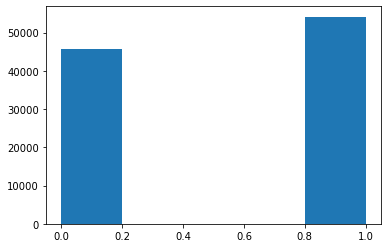

In [18]:
#Finding # Songwriter's Listed vs. Songwriter Not Listed; one of three required elements (Artist, Title and Songwriter); the others have no na values
plt.hist(napster_df['Songwriter_Y_N'], bins = 5)

In [19]:
#Finding actual number for Songwriter Not Listed
(napster_df['Songwriter_Y_N']==0).sum()

45839

In [20]:
#Finding actual number for Songwriter Listed
(napster_df['Songwriter_Y_N']==1).sum()

54161

In [21]:
#Max Song duration in napster_df
napster_df['Recording_Dur_s'].describe()

count    100000.000000
mean       1016.893690
std       15565.692133
min           0.000000
25%         149.000000
50%         190.000000
75%         236.000000
max      818738.000000
Name: Recording_Dur_s, dtype: float64

#Group into Songwriter_Y_N into Not Listed 0 and  Listed 1

In [22]:
sw_y_n_0 = napster_df[napster_df['Songwriter_Y_N']==0]
#sw_y_n_0.head(5)

In [23]:
sw_y_n_1 = napster_df[napster_df['Songwriter_Y_N']==1]
#sw_y_n_1.head(5)

In [24]:
#adding counts of 0 countries; i.e. countries that have the most Songwriters Not Listed
country_code_0_grp = sw_y_n_0.groupby(['Country_Code'])['Songwriter_Y_N'].count().reset_index(name='zero_writer_count').sort_values(by='zero_writer_count', ascending=False)
country_code_0_grp.head(10)

,Country_Code,zero_writer_count
64,US,18853
58,QZ,7869
57,QM,3901
61,TC,3841
29,GB,3083
60,SE,1127
21,DE,1087
12,CA,655
28,FR,598
42,JP,587


In [25]:
#adding counts of 1 countries, i.e. Most Countries for Songwriters Listed
country_code_1_grp = sw_y_n_1.groupby(['Country_Code'])['Songwriter_Y_N'].count().reset_index(name='one_writer_count').sort_values(by='one_writer_count', ascending=False)
country_code_1_grp.head(10)
#notice reset_index to create a dataframe rather than a series!!

,Country_Code,one_writer_count
65,US,22768
59,QZ,9320
58,QM,4508
62,TC,4454
29,GB,3528
61,SE,1434
21,DE,1192
13,CA,776
42,JP,701
27,FR,665


In [26]:
#extract column needed in order to add to the other
extracted_col = country_code_1_grp['one_writer_count']

In [27]:
country_code_0_grp.head()

,Country_Code,zero_writer_count
64,US,18853
58,QZ,7869
57,QM,3901
61,TC,3841
29,GB,3083


In [28]:
#Creating combined Country - Songwriter List and No list numbers
#add one_count column to zero_count column to form combined db
country_code_grp = country_code_0_grp
country_code_grp.insert(2,'one_writer_count',extracted_col)
country_code_grp.sort_values(by='zero_writer_count', ascending=False)
country_code_grp.head(10)

,Country_Code,zero_writer_count,one_writer_count
64,US,18853,459
58,QZ,7869,4508
57,QM,3901,1
61,TC,3841,1434
29,GB,3083,3528
60,SE,1127,24
21,DE,1087,1192
12,CA,655,11
28,FR,598,1
42,JP,587,701


### Starting DSP Analysis

In [29]:
napster_df.head(7)

,ISRC,Country_Code,Registrant_Code,Ref_Year,Usage_Period,Streaming_Plat_DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Dur_s,Songwriter_Y_N
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,8133,x0o0x_,x0o0x_,______,______,142,0
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,5839,Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1


In [30]:
#top_streaming_DSP
dsp_by_stream = napster_df.groupby(['Streaming_Plat_DSP'])['Streams'].sum().reset_index(name='num_streams').sort_values(by='num_streams', ascending=False)
dsp_by_stream.head(10)

,Streaming_Plat_DSP,num_streams
22,Spotify,2.552564e+09
2,Apple,1.606454e+09
15,Pandora,8.742366e+08
21,SoundCloud,1.668138e+08
27,YouTube,1.580311e+08
0,Amazon,1.511998e+08
23,Tidal,4.879313e+07
3,AudioMack,1.199156e+07
9,Melodyv,5.384657e+06
28,iHeart Radio,2.141959e+06


In [31]:
dsp_by_stream.iloc[[0]]

,Streaming_Plat_DSP,num_streams
22,Spotify,2.552564e+09


In [32]:
dsp_by_stream.reset_index(drop=True)

,Streaming_Plat_DSP,num_streams
0,Spotify,2.552564e+09
1,Apple,1.606454e+09
2,Pandora,8.742366e+08
3,SoundCloud,1.668138e+08
4,YouTube,1.580311e+08
5,Amazon,1.511998e+08
6,Tidal,4.879313e+07
7,AudioMack,1.199156e+07
8,Melodyv,5.384657e+06
9,iHeart Radio,2.141959e+06


In [33]:
isrc_by_dsp = napster_df.groupby(['Streaming_Plat_DSP'])['ISRC'].count().reset_index(name='isrc_count').sort_values(by='isrc_count', ascending=False)
isrc_by_dsp.head(10)

,Streaming_Plat_DSP,isrc_count
22,Spotify,31697
2,Apple,21820
0,Amazon,14173
15,Pandora,13540
23,Tidal,3468
27,YouTube,2696
21,SoundCloud,2086
7,GTL,1064
9,Melodyv,814
24,Trebel,798


In [38]:
dsp_by_title_dec = napster_df.groupby(['Streaming_Plat_DSP','Ref_Year'])['Recording_Title'].count().reset_index(name='num_titles').sort_values(by='num_titles', ascending=False)
dsp_by_title_dec.head(10)

,Streaming_Plat_DSP,Ref_Year,num_titles
601,Spotify,20.0,9993
112,Apple,20.0,6964
20,Amazon,20.0,4494
602,Spotify,21.0,4404
421,Pandora,20.0,4262
600,Spotify,19.0,3678
113,Apple,21.0,2944
599,Spotify,18.0,2818
111,Apple,19.0,2625
598,Spotify,17.0,1971


In [40]:
#change ref_year to four digit number
for index, row in napster_df.iterrows():
    
    print('working on row:', index)
    
    if row['Ref_Year'] > 21 and row['Ref_Year'] <= 99 :
        napster_df.loc[index, 'new_ref_year'] = row['Ref_Year'] + 1900
    elif row['Ref_Year'] <= 21 :
        napster_df.loc[index, 'new_ref_year'] = row['Ref_Year'] + 2000
    #elif row['Ref_Year'].isna == True :
        #napster_df.loc[index, 'new_ref_year'] = row['Ref_Year']
    else :
        napster_df.loc[index, 'new_ref_year'] = row['Ref_Year']
    
print('finished')

working on row: 0
working on row: 1
working on row: 2
working on row: 3
working on row: 4
working on row: 5
working on row: 6
working on row: 7
working on row: 8
working on row: 9
working on row: 10
working on row: 11
working on row: 12
working on row: 13
working on row: 14
working on row: 15
working on row: 16
working on row: 17
working on row: 18
working on row: 19
working on row: 20
working on row: 21
working on row: 22
working on row: 23
working on row: 24
working on row: 25
working on row: 26
working on row: 27
working on row: 28
working on row: 29
working on row: 30
working on row: 31
working on row: 32
working on row: 33
working on row: 34
working on row: 35
working on row: 36
working on row: 37
working on row: 38
working on row: 39
working on row: 40
working on row: 41
working on row: 42
working on row: 43
working on row: 44
working on row: 45
working on row: 46
working on row: 47
working on row: 48
working on row: 49
working on row: 50
working on row: 51
working on row: 52
wor

working on row: 439
working on row: 440
working on row: 441
working on row: 442
working on row: 443
working on row: 444
working on row: 445
working on row: 446
working on row: 447
working on row: 448
working on row: 449
working on row: 450
working on row: 451
working on row: 452
working on row: 453
working on row: 454
working on row: 455
working on row: 456
working on row: 457
working on row: 458
working on row: 459
working on row: 460
working on row: 461
working on row: 462
working on row: 463
working on row: 464
working on row: 465
working on row: 466
working on row: 467
working on row: 468
working on row: 469
working on row: 470
working on row: 471
working on row: 472
working on row: 473
working on row: 474
working on row: 475
working on row: 476
working on row: 477
working on row: 478
working on row: 479
working on row: 480
working on row: 481
working on row: 482
working on row: 483
working on row: 484
working on row: 485
working on row: 486
working on row: 487
working on row: 488


working on row: 1236
working on row: 1237
working on row: 1238
working on row: 1239
working on row: 1240
working on row: 1241
working on row: 1242
working on row: 1243
working on row: 1244
working on row: 1245
working on row: 1246
working on row: 1247
working on row: 1248
working on row: 1249
working on row: 1250
working on row: 1251
working on row: 1252
working on row: 1253
working on row: 1254
working on row: 1255
working on row: 1256
working on row: 1257
working on row: 1258
working on row: 1259
working on row: 1260
working on row: 1261
working on row: 1262
working on row: 1263
working on row: 1264
working on row: 1265
working on row: 1266
working on row: 1267
working on row: 1268
working on row: 1269
working on row: 1270
working on row: 1271
working on row: 1272
working on row: 1273
working on row: 1274
working on row: 1275
working on row: 1276
working on row: 1277
working on row: 1278
working on row: 1279
working on row: 1280
working on row: 1281
working on row: 1282
working on ro

working on row: 1653
working on row: 1654
working on row: 1655
working on row: 1656
working on row: 1657
working on row: 1658
working on row: 1659
working on row: 1660
working on row: 1661
working on row: 1662
working on row: 1663
working on row: 1664
working on row: 1665
working on row: 1666
working on row: 1667
working on row: 1668
working on row: 1669
working on row: 1670
working on row: 1671
working on row: 1672
working on row: 1673
working on row: 1674
working on row: 1675
working on row: 1676
working on row: 1677
working on row: 1678
working on row: 1679
working on row: 1680
working on row: 1681
working on row: 1682
working on row: 1683
working on row: 1684
working on row: 1685
working on row: 1686
working on row: 1687
working on row: 1688
working on row: 1689
working on row: 1690
working on row: 1691
working on row: 1692
working on row: 1693
working on row: 1694
working on row: 1695
working on row: 1696
working on row: 1697
working on row: 1698
working on row: 1699
working on ro

working on row: 2087
working on row: 2088
working on row: 2089
working on row: 2090
working on row: 2091
working on row: 2092
working on row: 2093
working on row: 2094
working on row: 2095
working on row: 2096
working on row: 2097
working on row: 2098
working on row: 2099
working on row: 2100
working on row: 2101
working on row: 2102
working on row: 2103
working on row: 2104
working on row: 2105
working on row: 2106
working on row: 2107
working on row: 2108
working on row: 2109
working on row: 2110
working on row: 2111
working on row: 2112
working on row: 2113
working on row: 2114
working on row: 2115
working on row: 2116
working on row: 2117
working on row: 2118
working on row: 2119
working on row: 2120
working on row: 2121
working on row: 2122
working on row: 2123
working on row: 2124
working on row: 2125
working on row: 2126
working on row: 2127
working on row: 2128
working on row: 2129
working on row: 2130
working on row: 2131
working on row: 2132
working on row: 2133
working on ro

working on row: 2503
working on row: 2504
working on row: 2505
working on row: 2506
working on row: 2507
working on row: 2508
working on row: 2509
working on row: 2510
working on row: 2511
working on row: 2512
working on row: 2513
working on row: 2514
working on row: 2515
working on row: 2516
working on row: 2517
working on row: 2518
working on row: 2519
working on row: 2520
working on row: 2521
working on row: 2522
working on row: 2523
working on row: 2524
working on row: 2525
working on row: 2526
working on row: 2527
working on row: 2528
working on row: 2529
working on row: 2530
working on row: 2531
working on row: 2532
working on row: 2533
working on row: 2534
working on row: 2535
working on row: 2536
working on row: 2537
working on row: 2538
working on row: 2539
working on row: 2540
working on row: 2541
working on row: 2542
working on row: 2543
working on row: 2544
working on row: 2545
working on row: 2546
working on row: 2547
working on row: 2548
working on row: 2549
working on ro

working on row: 2949
working on row: 2950
working on row: 2951
working on row: 2952
working on row: 2953
working on row: 2954
working on row: 2955
working on row: 2956
working on row: 2957
working on row: 2958
working on row: 2959
working on row: 2960
working on row: 2961
working on row: 2962
working on row: 2963
working on row: 2964
working on row: 2965
working on row: 2966
working on row: 2967
working on row: 2968
working on row: 2969
working on row: 2970
working on row: 2971
working on row: 2972
working on row: 2973
working on row: 2974
working on row: 2975
working on row: 2976
working on row: 2977
working on row: 2978
working on row: 2979
working on row: 2980
working on row: 2981
working on row: 2982
working on row: 2983
working on row: 2984
working on row: 2985
working on row: 2986
working on row: 2987
working on row: 2988
working on row: 2989
working on row: 2990
working on row: 2991
working on row: 2992
working on row: 2993
working on row: 2994
working on row: 2995
working on ro

working on row: 3355
working on row: 3356
working on row: 3357
working on row: 3358
working on row: 3359
working on row: 3360
working on row: 3361
working on row: 3362
working on row: 3363
working on row: 3364
working on row: 3365
working on row: 3366
working on row: 3367
working on row: 3368
working on row: 3369
working on row: 3370
working on row: 3371
working on row: 3372
working on row: 3373
working on row: 3374
working on row: 3375
working on row: 3376
working on row: 3377
working on row: 3378
working on row: 3379
working on row: 3380
working on row: 3381
working on row: 3382
working on row: 3383
working on row: 3384
working on row: 3385
working on row: 3386
working on row: 3387
working on row: 3388
working on row: 3389
working on row: 3390
working on row: 3391
working on row: 3392
working on row: 3393
working on row: 3394
working on row: 3395
working on row: 3396
working on row: 3397
working on row: 3398
working on row: 3399
working on row: 3400
working on row: 3401
working on ro

working on row: 4022
working on row: 4023
working on row: 4024
working on row: 4025
working on row: 4026
working on row: 4027
working on row: 4028
working on row: 4029
working on row: 4030
working on row: 4031
working on row: 4032
working on row: 4033
working on row: 4034
working on row: 4035
working on row: 4036
working on row: 4037
working on row: 4038
working on row: 4039
working on row: 4040
working on row: 4041
working on row: 4042
working on row: 4043
working on row: 4044
working on row: 4045
working on row: 4046
working on row: 4047
working on row: 4048
working on row: 4049
working on row: 4050
working on row: 4051
working on row: 4052
working on row: 4053
working on row: 4054
working on row: 4055
working on row: 4056
working on row: 4057
working on row: 4058
working on row: 4059
working on row: 4060
working on row: 4061
working on row: 4062
working on row: 4063
working on row: 4064
working on row: 4065
working on row: 4066
working on row: 4067
working on row: 4068
working on ro

working on row: 4807
working on row: 4808
working on row: 4809
working on row: 4810
working on row: 4811
working on row: 4812
working on row: 4813
working on row: 4814
working on row: 4815
working on row: 4816
working on row: 4817
working on row: 4818
working on row: 4819
working on row: 4820
working on row: 4821
working on row: 4822
working on row: 4823
working on row: 4824
working on row: 4825
working on row: 4826
working on row: 4827
working on row: 4828
working on row: 4829
working on row: 4830
working on row: 4831
working on row: 4832
working on row: 4833
working on row: 4834
working on row: 4835
working on row: 4836
working on row: 4837
working on row: 4838
working on row: 4839
working on row: 4840
working on row: 4841
working on row: 4842
working on row: 4843
working on row: 4844
working on row: 4845
working on row: 4846
working on row: 4847
working on row: 4848
working on row: 4849
working on row: 4850
working on row: 4851
working on row: 4852
working on row: 4853
working on ro

working on row: 5212
working on row: 5213
working on row: 5214
working on row: 5215
working on row: 5216
working on row: 5217
working on row: 5218
working on row: 5219
working on row: 5220
working on row: 5221
working on row: 5222
working on row: 5223
working on row: 5224
working on row: 5225
working on row: 5226
working on row: 5227
working on row: 5228
working on row: 5229
working on row: 5230
working on row: 5231
working on row: 5232
working on row: 5233
working on row: 5234
working on row: 5235
working on row: 5236
working on row: 5237
working on row: 5238
working on row: 5239
working on row: 5240
working on row: 5241
working on row: 5242
working on row: 5243
working on row: 5244
working on row: 5245
working on row: 5246
working on row: 5247
working on row: 5248
working on row: 5249
working on row: 5250
working on row: 5251
working on row: 5252
working on row: 5253
working on row: 5254
working on row: 5255
working on row: 5256
working on row: 5257
working on row: 5258
working on ro

working on row: 5634
working on row: 5635
working on row: 5636
working on row: 5637
working on row: 5638
working on row: 5639
working on row: 5640
working on row: 5641
working on row: 5642
working on row: 5643
working on row: 5644
working on row: 5645
working on row: 5646
working on row: 5647
working on row: 5648
working on row: 5649
working on row: 5650
working on row: 5651
working on row: 5652
working on row: 5653
working on row: 5654
working on row: 5655
working on row: 5656
working on row: 5657
working on row: 5658
working on row: 5659
working on row: 5660
working on row: 5661
working on row: 5662
working on row: 5663
working on row: 5664
working on row: 5665
working on row: 5666
working on row: 5667
working on row: 5668
working on row: 5669
working on row: 5670
working on row: 5671
working on row: 5672
working on row: 5673
working on row: 5674
working on row: 5675
working on row: 5676
working on row: 5677
working on row: 5678
working on row: 5679
working on row: 5680
working on ro

working on row: 6037
working on row: 6038
working on row: 6039
working on row: 6040
working on row: 6041
working on row: 6042
working on row: 6043
working on row: 6044
working on row: 6045
working on row: 6046
working on row: 6047
working on row: 6048
working on row: 6049
working on row: 6050
working on row: 6051
working on row: 6052
working on row: 6053
working on row: 6054
working on row: 6055
working on row: 6056
working on row: 6057
working on row: 6058
working on row: 6059
working on row: 6060
working on row: 6061
working on row: 6062
working on row: 6063
working on row: 6064
working on row: 6065
working on row: 6066
working on row: 6067
working on row: 6068
working on row: 6069
working on row: 6070
working on row: 6071
working on row: 6072
working on row: 6073
working on row: 6074
working on row: 6075
working on row: 6076
working on row: 6077
working on row: 6078
working on row: 6079
working on row: 6080
working on row: 6081
working on row: 6082
working on row: 6083
working on ro

working on row: 6840
working on row: 6841
working on row: 6842
working on row: 6843
working on row: 6844
working on row: 6845
working on row: 6846
working on row: 6847
working on row: 6848
working on row: 6849
working on row: 6850
working on row: 6851
working on row: 6852
working on row: 6853
working on row: 6854
working on row: 6855
working on row: 6856
working on row: 6857
working on row: 6858
working on row: 6859
working on row: 6860
working on row: 6861
working on row: 6862
working on row: 6863
working on row: 6864
working on row: 6865
working on row: 6866
working on row: 6867
working on row: 6868
working on row: 6869
working on row: 6870
working on row: 6871
working on row: 6872
working on row: 6873
working on row: 6874
working on row: 6875
working on row: 6876
working on row: 6877
working on row: 6878
working on row: 6879
working on row: 6880
working on row: 6881
working on row: 6882
working on row: 6883
working on row: 6884
working on row: 6885
working on row: 6886
working on ro

working on row: 7237
working on row: 7238
working on row: 7239
working on row: 7240
working on row: 7241
working on row: 7242
working on row: 7243
working on row: 7244
working on row: 7245
working on row: 7246
working on row: 7247
working on row: 7248
working on row: 7249
working on row: 7250
working on row: 7251
working on row: 7252
working on row: 7253
working on row: 7254
working on row: 7255
working on row: 7256
working on row: 7257
working on row: 7258
working on row: 7259
working on row: 7260
working on row: 7261
working on row: 7262
working on row: 7263
working on row: 7264
working on row: 7265
working on row: 7266
working on row: 7267
working on row: 7268
working on row: 7269
working on row: 7270
working on row: 7271
working on row: 7272
working on row: 7273
working on row: 7274
working on row: 7275
working on row: 7276
working on row: 7277
working on row: 7278
working on row: 7279
working on row: 7280
working on row: 7281
working on row: 7282
working on row: 7283
working on ro

working on row: 7663
working on row: 7664
working on row: 7665
working on row: 7666
working on row: 7667
working on row: 7668
working on row: 7669
working on row: 7670
working on row: 7671
working on row: 7672
working on row: 7673
working on row: 7674
working on row: 7675
working on row: 7676
working on row: 7677
working on row: 7678
working on row: 7679
working on row: 7680
working on row: 7681
working on row: 7682
working on row: 7683
working on row: 7684
working on row: 7685
working on row: 7686
working on row: 7687
working on row: 7688
working on row: 7689
working on row: 7690
working on row: 7691
working on row: 7692
working on row: 7693
working on row: 7694
working on row: 7695
working on row: 7696
working on row: 7697
working on row: 7698
working on row: 7699
working on row: 7700
working on row: 7701
working on row: 7702
working on row: 7703
working on row: 7704
working on row: 7705
working on row: 7706
working on row: 7707
working on row: 7708
working on row: 7709
working on ro

working on row: 8054
working on row: 8055
working on row: 8056
working on row: 8057
working on row: 8058
working on row: 8059
working on row: 8060
working on row: 8061
working on row: 8062
working on row: 8063
working on row: 8064
working on row: 8065
working on row: 8066
working on row: 8067
working on row: 8068
working on row: 8069
working on row: 8070
working on row: 8071
working on row: 8072
working on row: 8073
working on row: 8074
working on row: 8075
working on row: 8076
working on row: 8077
working on row: 8078
working on row: 8079
working on row: 8080
working on row: 8081
working on row: 8082
working on row: 8083
working on row: 8084
working on row: 8085
working on row: 8086
working on row: 8087
working on row: 8088
working on row: 8089
working on row: 8090
working on row: 8091
working on row: 8092
working on row: 8093
working on row: 8094
working on row: 8095
working on row: 8096
working on row: 8097
working on row: 8098
working on row: 8099
working on row: 8100
working on ro

working on row: 8459
working on row: 8460
working on row: 8461
working on row: 8462
working on row: 8463
working on row: 8464
working on row: 8465
working on row: 8466
working on row: 8467
working on row: 8468
working on row: 8469
working on row: 8470
working on row: 8471
working on row: 8472
working on row: 8473
working on row: 8474
working on row: 8475
working on row: 8476
working on row: 8477
working on row: 8478
working on row: 8479
working on row: 8480
working on row: 8481
working on row: 8482
working on row: 8483
working on row: 8484
working on row: 8485
working on row: 8486
working on row: 8487
working on row: 8488
working on row: 8489
working on row: 8490
working on row: 8491
working on row: 8492
working on row: 8493
working on row: 8494
working on row: 8495
working on row: 8496
working on row: 8497
working on row: 8498
working on row: 8499
working on row: 8500
working on row: 8501
working on row: 8502
working on row: 8503
working on row: 8504
working on row: 8505
working on ro

working on row: 8857
working on row: 8858
working on row: 8859
working on row: 8860
working on row: 8861
working on row: 8862
working on row: 8863
working on row: 8864
working on row: 8865
working on row: 8866
working on row: 8867
working on row: 8868
working on row: 8869
working on row: 8870
working on row: 8871
working on row: 8872
working on row: 8873
working on row: 8874
working on row: 8875
working on row: 8876
working on row: 8877
working on row: 8878
working on row: 8879
working on row: 8880
working on row: 8881
working on row: 8882
working on row: 8883
working on row: 8884
working on row: 8885
working on row: 8886
working on row: 8887
working on row: 8888
working on row: 8889
working on row: 8890
working on row: 8891
working on row: 8892
working on row: 8893
working on row: 8894
working on row: 8895
working on row: 8896
working on row: 8897
working on row: 8898
working on row: 8899
working on row: 8900
working on row: 8901
working on row: 8902
working on row: 8903
working on ro

working on row: 9283
working on row: 9284
working on row: 9285
working on row: 9286
working on row: 9287
working on row: 9288
working on row: 9289
working on row: 9290
working on row: 9291
working on row: 9292
working on row: 9293
working on row: 9294
working on row: 9295
working on row: 9296
working on row: 9297
working on row: 9298
working on row: 9299
working on row: 9300
working on row: 9301
working on row: 9302
working on row: 9303
working on row: 9304
working on row: 9305
working on row: 9306
working on row: 9307
working on row: 9308
working on row: 9309
working on row: 9310
working on row: 9311
working on row: 9312
working on row: 9313
working on row: 9314
working on row: 9315
working on row: 9316
working on row: 9317
working on row: 9318
working on row: 9319
working on row: 9320
working on row: 9321
working on row: 9322
working on row: 9323
working on row: 9324
working on row: 9325
working on row: 9326
working on row: 9327
working on row: 9328
working on row: 9329
working on ro

working on row: 9684
working on row: 9685
working on row: 9686
working on row: 9687
working on row: 9688
working on row: 9689
working on row: 9690
working on row: 9691
working on row: 9692
working on row: 9693
working on row: 9694
working on row: 9695
working on row: 9696
working on row: 9697
working on row: 9698
working on row: 9699
working on row: 9700
working on row: 9701
working on row: 9702
working on row: 9703
working on row: 9704
working on row: 9705
working on row: 9706
working on row: 9707
working on row: 9708
working on row: 9709
working on row: 9710
working on row: 9711
working on row: 9712
working on row: 9713
working on row: 9714
working on row: 9715
working on row: 9716
working on row: 9717
working on row: 9718
working on row: 9719
working on row: 9720
working on row: 9721
working on row: 9722
working on row: 9723
working on row: 9724
working on row: 9725
working on row: 9726
working on row: 9727
working on row: 9728
working on row: 9729
working on row: 9730
working on ro

working on row: 10075
working on row: 10076
working on row: 10077
working on row: 10078
working on row: 10079
working on row: 10080
working on row: 10081
working on row: 10082
working on row: 10083
working on row: 10084
working on row: 10085
working on row: 10086
working on row: 10087
working on row: 10088
working on row: 10089
working on row: 10090
working on row: 10091
working on row: 10092
working on row: 10093
working on row: 10094
working on row: 10095
working on row: 10096
working on row: 10097
working on row: 10098
working on row: 10099
working on row: 10100
working on row: 10101
working on row: 10102
working on row: 10103
working on row: 10104
working on row: 10105
working on row: 10106
working on row: 10107
working on row: 10108
working on row: 10109
working on row: 10110
working on row: 10111
working on row: 10112
working on row: 10113
working on row: 10114
working on row: 10115
working on row: 10116
working on row: 10117
working on row: 10118
working on row: 10119
working on

working on row: 10728
working on row: 10729
working on row: 10730
working on row: 10731
working on row: 10732
working on row: 10733
working on row: 10734
working on row: 10735
working on row: 10736
working on row: 10737
working on row: 10738
working on row: 10739
working on row: 10740
working on row: 10741
working on row: 10742
working on row: 10743
working on row: 10744
working on row: 10745
working on row: 10746
working on row: 10747
working on row: 10748
working on row: 10749
working on row: 10750
working on row: 10751
working on row: 10752
working on row: 10753
working on row: 10754
working on row: 10755
working on row: 10756
working on row: 10757
working on row: 10758
working on row: 10759
working on row: 10760
working on row: 10761
working on row: 10762
working on row: 10763
working on row: 10764
working on row: 10765
working on row: 10766
working on row: 10767
working on row: 10768
working on row: 10769
working on row: 10770
working on row: 10771
working on row: 10772
working on

working on row: 11138
working on row: 11139
working on row: 11140
working on row: 11141
working on row: 11142
working on row: 11143
working on row: 11144
working on row: 11145
working on row: 11146
working on row: 11147
working on row: 11148
working on row: 11149
working on row: 11150
working on row: 11151
working on row: 11152
working on row: 11153
working on row: 11154
working on row: 11155
working on row: 11156
working on row: 11157
working on row: 11158
working on row: 11159
working on row: 11160
working on row: 11161
working on row: 11162
working on row: 11163
working on row: 11164
working on row: 11165
working on row: 11166
working on row: 11167
working on row: 11168
working on row: 11169
working on row: 11170
working on row: 11171
working on row: 11172
working on row: 11173
working on row: 11174
working on row: 11175
working on row: 11176
working on row: 11177
working on row: 11178
working on row: 11179
working on row: 11180
working on row: 11181
working on row: 11182
working on

working on row: 11517
working on row: 11518
working on row: 11519
working on row: 11520
working on row: 11521
working on row: 11522
working on row: 11523
working on row: 11524
working on row: 11525
working on row: 11526
working on row: 11527
working on row: 11528
working on row: 11529
working on row: 11530
working on row: 11531
working on row: 11532
working on row: 11533
working on row: 11534
working on row: 11535
working on row: 11536
working on row: 11537
working on row: 11538
working on row: 11539
working on row: 11540
working on row: 11541
working on row: 11542
working on row: 11543
working on row: 11544
working on row: 11545
working on row: 11546
working on row: 11547
working on row: 11548
working on row: 11549
working on row: 11550
working on row: 11551
working on row: 11552
working on row: 11553
working on row: 11554
working on row: 11555
working on row: 11556
working on row: 11557
working on row: 11558
working on row: 11559
working on row: 11560
working on row: 11561
working on

working on row: 11899
working on row: 11900
working on row: 11901
working on row: 11902
working on row: 11903
working on row: 11904
working on row: 11905
working on row: 11906
working on row: 11907
working on row: 11908
working on row: 11909
working on row: 11910
working on row: 11911
working on row: 11912
working on row: 11913
working on row: 11914
working on row: 11915
working on row: 11916
working on row: 11917
working on row: 11918
working on row: 11919
working on row: 11920
working on row: 11921
working on row: 11922
working on row: 11923
working on row: 11924
working on row: 11925
working on row: 11926
working on row: 11927
working on row: 11928
working on row: 11929
working on row: 11930
working on row: 11931
working on row: 11932
working on row: 11933
working on row: 11934
working on row: 11935
working on row: 11936
working on row: 11937
working on row: 11938
working on row: 11939
working on row: 11940
working on row: 11941
working on row: 11942
working on row: 11943
working on

working on row: 12290
working on row: 12291
working on row: 12292
working on row: 12293
working on row: 12294
working on row: 12295
working on row: 12296
working on row: 12297
working on row: 12298
working on row: 12299
working on row: 12300
working on row: 12301
working on row: 12302
working on row: 12303
working on row: 12304
working on row: 12305
working on row: 12306
working on row: 12307
working on row: 12308
working on row: 12309
working on row: 12310
working on row: 12311
working on row: 12312
working on row: 12313
working on row: 12314
working on row: 12315
working on row: 12316
working on row: 12317
working on row: 12318
working on row: 12319
working on row: 12320
working on row: 12321
working on row: 12322
working on row: 12323
working on row: 12324
working on row: 12325
working on row: 12326
working on row: 12327
working on row: 12328
working on row: 12329
working on row: 12330
working on row: 12331
working on row: 12332
working on row: 12333
working on row: 12334
working on

working on row: 12991
working on row: 12992
working on row: 12993
working on row: 12994
working on row: 12995
working on row: 12996
working on row: 12997
working on row: 12998
working on row: 12999
working on row: 13000
working on row: 13001
working on row: 13002
working on row: 13003
working on row: 13004
working on row: 13005
working on row: 13006
working on row: 13007
working on row: 13008
working on row: 13009
working on row: 13010
working on row: 13011
working on row: 13012
working on row: 13013
working on row: 13014
working on row: 13015
working on row: 13016
working on row: 13017
working on row: 13018
working on row: 13019
working on row: 13020
working on row: 13021
working on row: 13022
working on row: 13023
working on row: 13024
working on row: 13025
working on row: 13026
working on row: 13027
working on row: 13028
working on row: 13029
working on row: 13030
working on row: 13031
working on row: 13032
working on row: 13033
working on row: 13034
working on row: 13035
working on

working on row: 13455
working on row: 13456
working on row: 13457
working on row: 13458
working on row: 13459
working on row: 13460
working on row: 13461
working on row: 13462
working on row: 13463
working on row: 13464
working on row: 13465
working on row: 13466
working on row: 13467
working on row: 13468
working on row: 13469
working on row: 13470
working on row: 13471
working on row: 13472
working on row: 13473
working on row: 13474
working on row: 13475
working on row: 13476
working on row: 13477
working on row: 13478
working on row: 13479
working on row: 13480
working on row: 13481
working on row: 13482
working on row: 13483
working on row: 13484
working on row: 13485
working on row: 13486
working on row: 13487
working on row: 13488
working on row: 13489
working on row: 13490
working on row: 13491
working on row: 13492
working on row: 13493
working on row: 13494
working on row: 13495
working on row: 13496
working on row: 13497
working on row: 13498
working on row: 13499
working on

working on row: 13872
working on row: 13873
working on row: 13874
working on row: 13875
working on row: 13876
working on row: 13877
working on row: 13878
working on row: 13879
working on row: 13880
working on row: 13881
working on row: 13882
working on row: 13883
working on row: 13884
working on row: 13885
working on row: 13886
working on row: 13887
working on row: 13888
working on row: 13889
working on row: 13890
working on row: 13891
working on row: 13892
working on row: 13893
working on row: 13894
working on row: 13895
working on row: 13896
working on row: 13897
working on row: 13898
working on row: 13899
working on row: 13900
working on row: 13901
working on row: 13902
working on row: 13903
working on row: 13904
working on row: 13905
working on row: 13906
working on row: 13907
working on row: 13908
working on row: 13909
working on row: 13910
working on row: 13911
working on row: 13912
working on row: 13913
working on row: 13914
working on row: 13915
working on row: 13916
working on

working on row: 14628
working on row: 14629
working on row: 14630
working on row: 14631
working on row: 14632
working on row: 14633
working on row: 14634
working on row: 14635
working on row: 14636
working on row: 14637
working on row: 14638
working on row: 14639
working on row: 14640
working on row: 14641
working on row: 14642
working on row: 14643
working on row: 14644
working on row: 14645
working on row: 14646
working on row: 14647
working on row: 14648
working on row: 14649
working on row: 14650
working on row: 14651
working on row: 14652
working on row: 14653
working on row: 14654
working on row: 14655
working on row: 14656
working on row: 14657
working on row: 14658
working on row: 14659
working on row: 14660
working on row: 14661
working on row: 14662
working on row: 14663
working on row: 14664
working on row: 14665
working on row: 14666
working on row: 14667
working on row: 14668
working on row: 14669
working on row: 14670
working on row: 14671
working on row: 14672
working on

working on row: 15067
working on row: 15068
working on row: 15069
working on row: 15070
working on row: 15071
working on row: 15072
working on row: 15073
working on row: 15074
working on row: 15075
working on row: 15076
working on row: 15077
working on row: 15078
working on row: 15079
working on row: 15080
working on row: 15081
working on row: 15082
working on row: 15083
working on row: 15084
working on row: 15085
working on row: 15086
working on row: 15087
working on row: 15088
working on row: 15089
working on row: 15090
working on row: 15091
working on row: 15092
working on row: 15093
working on row: 15094
working on row: 15095
working on row: 15096
working on row: 15097
working on row: 15098
working on row: 15099
working on row: 15100
working on row: 15101
working on row: 15102
working on row: 15103
working on row: 15104
working on row: 15105
working on row: 15106
working on row: 15107
working on row: 15108
working on row: 15109
working on row: 15110
working on row: 15111
working on

working on row: 15491
working on row: 15492
working on row: 15493
working on row: 15494
working on row: 15495
working on row: 15496
working on row: 15497
working on row: 15498
working on row: 15499
working on row: 15500
working on row: 15501
working on row: 15502
working on row: 15503
working on row: 15504
working on row: 15505
working on row: 15506
working on row: 15507
working on row: 15508
working on row: 15509
working on row: 15510
working on row: 15511
working on row: 15512
working on row: 15513
working on row: 15514
working on row: 15515
working on row: 15516
working on row: 15517
working on row: 15518
working on row: 15519
working on row: 15520
working on row: 15521
working on row: 15522
working on row: 15523
working on row: 15524
working on row: 15525
working on row: 15526
working on row: 15527
working on row: 15528
working on row: 15529
working on row: 15530
working on row: 15531
working on row: 15532
working on row: 15533
working on row: 15534
working on row: 15535
working on

working on row: 15919
working on row: 15920
working on row: 15921
working on row: 15922
working on row: 15923
working on row: 15924
working on row: 15925
working on row: 15926
working on row: 15927
working on row: 15928
working on row: 15929
working on row: 15930
working on row: 15931
working on row: 15932
working on row: 15933
working on row: 15934
working on row: 15935
working on row: 15936
working on row: 15937
working on row: 15938
working on row: 15939
working on row: 15940
working on row: 15941
working on row: 15942
working on row: 15943
working on row: 15944
working on row: 15945
working on row: 15946
working on row: 15947
working on row: 15948
working on row: 15949
working on row: 15950
working on row: 15951
working on row: 15952
working on row: 15953
working on row: 15954
working on row: 15955
working on row: 15956
working on row: 15957
working on row: 15958
working on row: 15959
working on row: 15960
working on row: 15961
working on row: 15962
working on row: 15963
working on

working on row: 16371
working on row: 16372
working on row: 16373
working on row: 16374
working on row: 16375
working on row: 16376
working on row: 16377
working on row: 16378
working on row: 16379
working on row: 16380
working on row: 16381
working on row: 16382
working on row: 16383
working on row: 16384
working on row: 16385
working on row: 16386
working on row: 16387
working on row: 16388
working on row: 16389
working on row: 16390
working on row: 16391
working on row: 16392
working on row: 16393
working on row: 16394
working on row: 16395
working on row: 16396
working on row: 16397
working on row: 16398
working on row: 16399
working on row: 16400
working on row: 16401
working on row: 16402
working on row: 16403
working on row: 16404
working on row: 16405
working on row: 16406
working on row: 16407
working on row: 16408
working on row: 16409
working on row: 16410
working on row: 16411
working on row: 16412
working on row: 16413
working on row: 16414
working on row: 16415
working on

working on row: 16798
working on row: 16799
working on row: 16800
working on row: 16801
working on row: 16802
working on row: 16803
working on row: 16804
working on row: 16805
working on row: 16806
working on row: 16807
working on row: 16808
working on row: 16809
working on row: 16810
working on row: 16811
working on row: 16812
working on row: 16813
working on row: 16814
working on row: 16815
working on row: 16816
working on row: 16817
working on row: 16818
working on row: 16819
working on row: 16820
working on row: 16821
working on row: 16822
working on row: 16823
working on row: 16824
working on row: 16825
working on row: 16826
working on row: 16827
working on row: 16828
working on row: 16829
working on row: 16830
working on row: 16831
working on row: 16832
working on row: 16833
working on row: 16834
working on row: 16835
working on row: 16836
working on row: 16837
working on row: 16838
working on row: 16839
working on row: 16840
working on row: 16841
working on row: 16842
working on

working on row: 17205
working on row: 17206
working on row: 17207
working on row: 17208
working on row: 17209
working on row: 17210
working on row: 17211
working on row: 17212
working on row: 17213
working on row: 17214
working on row: 17215
working on row: 17216
working on row: 17217
working on row: 17218
working on row: 17219
working on row: 17220
working on row: 17221
working on row: 17222
working on row: 17223
working on row: 17224
working on row: 17225
working on row: 17226
working on row: 17227
working on row: 17228
working on row: 17229
working on row: 17230
working on row: 17231
working on row: 17232
working on row: 17233
working on row: 17234
working on row: 17235
working on row: 17236
working on row: 17237
working on row: 17238
working on row: 17239
working on row: 17240
working on row: 17241
working on row: 17242
working on row: 17243
working on row: 17244
working on row: 17245
working on row: 17246
working on row: 17247
working on row: 17248
working on row: 17249
working on

working on row: 17624
working on row: 17625
working on row: 17626
working on row: 17627
working on row: 17628
working on row: 17629
working on row: 17630
working on row: 17631
working on row: 17632
working on row: 17633
working on row: 17634
working on row: 17635
working on row: 17636
working on row: 17637
working on row: 17638
working on row: 17639
working on row: 17640
working on row: 17641
working on row: 17642
working on row: 17643
working on row: 17644
working on row: 17645
working on row: 17646
working on row: 17647
working on row: 17648
working on row: 17649
working on row: 17650
working on row: 17651
working on row: 17652
working on row: 17653
working on row: 17654
working on row: 17655
working on row: 17656
working on row: 17657
working on row: 17658
working on row: 17659
working on row: 17660
working on row: 17661
working on row: 17662
working on row: 17663
working on row: 17664
working on row: 17665
working on row: 17666
working on row: 17667
working on row: 17668
working on

working on row: 18073
working on row: 18074
working on row: 18075
working on row: 18076
working on row: 18077
working on row: 18078
working on row: 18079
working on row: 18080
working on row: 18081
working on row: 18082
working on row: 18083
working on row: 18084
working on row: 18085
working on row: 18086
working on row: 18087
working on row: 18088
working on row: 18089
working on row: 18090
working on row: 18091
working on row: 18092
working on row: 18093
working on row: 18094
working on row: 18095
working on row: 18096
working on row: 18097
working on row: 18098
working on row: 18099
working on row: 18100
working on row: 18101
working on row: 18102
working on row: 18103
working on row: 18104
working on row: 18105
working on row: 18106
working on row: 18107
working on row: 18108
working on row: 18109
working on row: 18110
working on row: 18111
working on row: 18112
working on row: 18113
working on row: 18114
working on row: 18115
working on row: 18116
working on row: 18117
working on

working on row: 18495
working on row: 18496
working on row: 18497
working on row: 18498
working on row: 18499
working on row: 18500
working on row: 18501
working on row: 18502
working on row: 18503
working on row: 18504
working on row: 18505
working on row: 18506
working on row: 18507
working on row: 18508
working on row: 18509
working on row: 18510
working on row: 18511
working on row: 18512
working on row: 18513
working on row: 18514
working on row: 18515
working on row: 18516
working on row: 18517
working on row: 18518
working on row: 18519
working on row: 18520
working on row: 18521
working on row: 18522
working on row: 18523
working on row: 18524
working on row: 18525
working on row: 18526
working on row: 18527
working on row: 18528
working on row: 18529
working on row: 18530
working on row: 18531
working on row: 18532
working on row: 18533
working on row: 18534
working on row: 18535
working on row: 18536
working on row: 18537
working on row: 18538
working on row: 18539
working on

working on row: 18951
working on row: 18952
working on row: 18953
working on row: 18954
working on row: 18955
working on row: 18956
working on row: 18957
working on row: 18958
working on row: 18959
working on row: 18960
working on row: 18961
working on row: 18962
working on row: 18963
working on row: 18964
working on row: 18965
working on row: 18966
working on row: 18967
working on row: 18968
working on row: 18969
working on row: 18970
working on row: 18971
working on row: 18972
working on row: 18973
working on row: 18974
working on row: 18975
working on row: 18976
working on row: 18977
working on row: 18978
working on row: 18979
working on row: 18980
working on row: 18981
working on row: 18982
working on row: 18983
working on row: 18984
working on row: 18985
working on row: 18986
working on row: 18987
working on row: 18988
working on row: 18989
working on row: 18990
working on row: 18991
working on row: 18992
working on row: 18993
working on row: 18994
working on row: 18995
working on

working on row: 19328
working on row: 19329
working on row: 19330
working on row: 19331
working on row: 19332
working on row: 19333
working on row: 19334
working on row: 19335
working on row: 19336
working on row: 19337
working on row: 19338
working on row: 19339
working on row: 19340
working on row: 19341
working on row: 19342
working on row: 19343
working on row: 19344
working on row: 19345
working on row: 19346
working on row: 19347
working on row: 19348
working on row: 19349
working on row: 19350
working on row: 19351
working on row: 19352
working on row: 19353
working on row: 19354
working on row: 19355
working on row: 19356
working on row: 19357
working on row: 19358
working on row: 19359
working on row: 19360
working on row: 19361
working on row: 19362
working on row: 19363
working on row: 19364
working on row: 19365
working on row: 19366
working on row: 19367
working on row: 19368
working on row: 19369
working on row: 19370
working on row: 19371
working on row: 19372
working on

working on row: 19753
working on row: 19754
working on row: 19755
working on row: 19756
working on row: 19757
working on row: 19758
working on row: 19759
working on row: 19760
working on row: 19761
working on row: 19762
working on row: 19763
working on row: 19764
working on row: 19765
working on row: 19766
working on row: 19767
working on row: 19768
working on row: 19769
working on row: 19770
working on row: 19771
working on row: 19772
working on row: 19773
working on row: 19774
working on row: 19775
working on row: 19776
working on row: 19777
working on row: 19778
working on row: 19779
working on row: 19780
working on row: 19781
working on row: 19782
working on row: 19783
working on row: 19784
working on row: 19785
working on row: 19786
working on row: 19787
working on row: 19788
working on row: 19789
working on row: 19790
working on row: 19791
working on row: 19792
working on row: 19793
working on row: 19794
working on row: 19795
working on row: 19796
working on row: 19797
working on

working on row: 20181
working on row: 20182
working on row: 20183
working on row: 20184
working on row: 20185
working on row: 20186
working on row: 20187
working on row: 20188
working on row: 20189
working on row: 20190
working on row: 20191
working on row: 20192
working on row: 20193
working on row: 20194
working on row: 20195
working on row: 20196
working on row: 20197
working on row: 20198
working on row: 20199
working on row: 20200
working on row: 20201
working on row: 20202
working on row: 20203
working on row: 20204
working on row: 20205
working on row: 20206
working on row: 20207
working on row: 20208
working on row: 20209
working on row: 20210
working on row: 20211
working on row: 20212
working on row: 20213
working on row: 20214
working on row: 20215
working on row: 20216
working on row: 20217
working on row: 20218
working on row: 20219
working on row: 20220
working on row: 20221
working on row: 20222
working on row: 20223
working on row: 20224
working on row: 20225
working on

working on row: 20586
working on row: 20587
working on row: 20588
working on row: 20589
working on row: 20590
working on row: 20591
working on row: 20592
working on row: 20593
working on row: 20594
working on row: 20595
working on row: 20596
working on row: 20597
working on row: 20598
working on row: 20599
working on row: 20600
working on row: 20601
working on row: 20602
working on row: 20603
working on row: 20604
working on row: 20605
working on row: 20606
working on row: 20607
working on row: 20608
working on row: 20609
working on row: 20610
working on row: 20611
working on row: 20612
working on row: 20613
working on row: 20614
working on row: 20615
working on row: 20616
working on row: 20617
working on row: 20618
working on row: 20619
working on row: 20620
working on row: 20621
working on row: 20622
working on row: 20623
working on row: 20624
working on row: 20625
working on row: 20626
working on row: 20627
working on row: 20628
working on row: 20629
working on row: 20630
working on

working on row: 21012
working on row: 21013
working on row: 21014
working on row: 21015
working on row: 21016
working on row: 21017
working on row: 21018
working on row: 21019
working on row: 21020
working on row: 21021
working on row: 21022
working on row: 21023
working on row: 21024
working on row: 21025
working on row: 21026
working on row: 21027
working on row: 21028
working on row: 21029
working on row: 21030
working on row: 21031
working on row: 21032
working on row: 21033
working on row: 21034
working on row: 21035
working on row: 21036
working on row: 21037
working on row: 21038
working on row: 21039
working on row: 21040
working on row: 21041
working on row: 21042
working on row: 21043
working on row: 21044
working on row: 21045
working on row: 21046
working on row: 21047
working on row: 21048
working on row: 21049
working on row: 21050
working on row: 21051
working on row: 21052
working on row: 21053
working on row: 21054
working on row: 21055
working on row: 21056
working on

working on row: 21459
working on row: 21460
working on row: 21461
working on row: 21462
working on row: 21463
working on row: 21464
working on row: 21465
working on row: 21466
working on row: 21467
working on row: 21468
working on row: 21469
working on row: 21470
working on row: 21471
working on row: 21472
working on row: 21473
working on row: 21474
working on row: 21475
working on row: 21476
working on row: 21477
working on row: 21478
working on row: 21479
working on row: 21480
working on row: 21481
working on row: 21482
working on row: 21483
working on row: 21484
working on row: 21485
working on row: 21486
working on row: 21487
working on row: 21488
working on row: 21489
working on row: 21490
working on row: 21491
working on row: 21492
working on row: 21493
working on row: 21494
working on row: 21495
working on row: 21496
working on row: 21497
working on row: 21498
working on row: 21499
working on row: 21500
working on row: 21501
working on row: 21502
working on row: 21503
working on

working on row: 21862
working on row: 21863
working on row: 21864
working on row: 21865
working on row: 21866
working on row: 21867
working on row: 21868
working on row: 21869
working on row: 21870
working on row: 21871
working on row: 21872
working on row: 21873
working on row: 21874
working on row: 21875
working on row: 21876
working on row: 21877
working on row: 21878
working on row: 21879
working on row: 21880
working on row: 21881
working on row: 21882
working on row: 21883
working on row: 21884
working on row: 21885
working on row: 21886
working on row: 21887
working on row: 21888
working on row: 21889
working on row: 21890
working on row: 21891
working on row: 21892
working on row: 21893
working on row: 21894
working on row: 21895
working on row: 21896
working on row: 21897
working on row: 21898
working on row: 21899
working on row: 21900
working on row: 21901
working on row: 21902
working on row: 21903
working on row: 21904
working on row: 21905
working on row: 21906
working on

working on row: 22299
working on row: 22300
working on row: 22301
working on row: 22302
working on row: 22303
working on row: 22304
working on row: 22305
working on row: 22306
working on row: 22307
working on row: 22308
working on row: 22309
working on row: 22310
working on row: 22311
working on row: 22312
working on row: 22313
working on row: 22314
working on row: 22315
working on row: 22316
working on row: 22317
working on row: 22318
working on row: 22319
working on row: 22320
working on row: 22321
working on row: 22322
working on row: 22323
working on row: 22324
working on row: 22325
working on row: 22326
working on row: 22327
working on row: 22328
working on row: 22329
working on row: 22330
working on row: 22331
working on row: 22332
working on row: 22333
working on row: 22334
working on row: 22335
working on row: 22336
working on row: 22337
working on row: 22338
working on row: 22339
working on row: 22340
working on row: 22341
working on row: 22342
working on row: 22343
working on

working on row: 22728
working on row: 22729
working on row: 22730
working on row: 22731
working on row: 22732
working on row: 22733
working on row: 22734
working on row: 22735
working on row: 22736
working on row: 22737
working on row: 22738
working on row: 22739
working on row: 22740
working on row: 22741
working on row: 22742
working on row: 22743
working on row: 22744
working on row: 22745
working on row: 22746
working on row: 22747
working on row: 22748
working on row: 22749
working on row: 22750
working on row: 22751
working on row: 22752
working on row: 22753
working on row: 22754
working on row: 22755
working on row: 22756
working on row: 22757
working on row: 22758
working on row: 22759
working on row: 22760
working on row: 22761
working on row: 22762
working on row: 22763
working on row: 22764
working on row: 22765
working on row: 22766
working on row: 22767
working on row: 22768
working on row: 22769
working on row: 22770
working on row: 22771
working on row: 22772
working on

working on row: 23172
working on row: 23173
working on row: 23174
working on row: 23175
working on row: 23176
working on row: 23177
working on row: 23178
working on row: 23179
working on row: 23180
working on row: 23181
working on row: 23182
working on row: 23183
working on row: 23184
working on row: 23185
working on row: 23186
working on row: 23187
working on row: 23188
working on row: 23189
working on row: 23190
working on row: 23191
working on row: 23192
working on row: 23193
working on row: 23194
working on row: 23195
working on row: 23196
working on row: 23197
working on row: 23198
working on row: 23199
working on row: 23200
working on row: 23201
working on row: 23202
working on row: 23203
working on row: 23204
working on row: 23205
working on row: 23206
working on row: 23207
working on row: 23208
working on row: 23209
working on row: 23210
working on row: 23211
working on row: 23212
working on row: 23213
working on row: 23214
working on row: 23215
working on row: 23216
working on

working on row: 23557
working on row: 23558
working on row: 23559
working on row: 23560
working on row: 23561
working on row: 23562
working on row: 23563
working on row: 23564
working on row: 23565
working on row: 23566
working on row: 23567
working on row: 23568
working on row: 23569
working on row: 23570
working on row: 23571
working on row: 23572
working on row: 23573
working on row: 23574
working on row: 23575
working on row: 23576
working on row: 23577
working on row: 23578
working on row: 23579
working on row: 23580
working on row: 23581
working on row: 23582
working on row: 23583
working on row: 23584
working on row: 23585
working on row: 23586
working on row: 23587
working on row: 23588
working on row: 23589
working on row: 23590
working on row: 23591
working on row: 23592
working on row: 23593
working on row: 23594
working on row: 23595
working on row: 23596
working on row: 23597
working on row: 23598
working on row: 23599
working on row: 23600
working on row: 23601
working on

working on row: 23959
working on row: 23960
working on row: 23961
working on row: 23962
working on row: 23963
working on row: 23964
working on row: 23965
working on row: 23966
working on row: 23967
working on row: 23968
working on row: 23969
working on row: 23970
working on row: 23971
working on row: 23972
working on row: 23973
working on row: 23974
working on row: 23975
working on row: 23976
working on row: 23977
working on row: 23978
working on row: 23979
working on row: 23980
working on row: 23981
working on row: 23982
working on row: 23983
working on row: 23984
working on row: 23985
working on row: 23986
working on row: 23987
working on row: 23988
working on row: 23989
working on row: 23990
working on row: 23991
working on row: 23992
working on row: 23993
working on row: 23994
working on row: 23995
working on row: 23996
working on row: 23997
working on row: 23998
working on row: 23999
working on row: 24000
working on row: 24001
working on row: 24002
working on row: 24003
working on

working on row: 24352
working on row: 24353
working on row: 24354
working on row: 24355
working on row: 24356
working on row: 24357
working on row: 24358
working on row: 24359
working on row: 24360
working on row: 24361
working on row: 24362
working on row: 24363
working on row: 24364
working on row: 24365
working on row: 24366
working on row: 24367
working on row: 24368
working on row: 24369
working on row: 24370
working on row: 24371
working on row: 24372
working on row: 24373
working on row: 24374
working on row: 24375
working on row: 24376
working on row: 24377
working on row: 24378
working on row: 24379
working on row: 24380
working on row: 24381
working on row: 24382
working on row: 24383
working on row: 24384
working on row: 24385
working on row: 24386
working on row: 24387
working on row: 24388
working on row: 24389
working on row: 24390
working on row: 24391
working on row: 24392
working on row: 24393
working on row: 24394
working on row: 24395
working on row: 24396
working on

working on row: 24805
working on row: 24806
working on row: 24807
working on row: 24808
working on row: 24809
working on row: 24810
working on row: 24811
working on row: 24812
working on row: 24813
working on row: 24814
working on row: 24815
working on row: 24816
working on row: 24817
working on row: 24818
working on row: 24819
working on row: 24820
working on row: 24821
working on row: 24822
working on row: 24823
working on row: 24824
working on row: 24825
working on row: 24826
working on row: 24827
working on row: 24828
working on row: 24829
working on row: 24830
working on row: 24831
working on row: 24832
working on row: 24833
working on row: 24834
working on row: 24835
working on row: 24836
working on row: 24837
working on row: 24838
working on row: 24839
working on row: 24840
working on row: 24841
working on row: 24842
working on row: 24843
working on row: 24844
working on row: 24845
working on row: 24846
working on row: 24847
working on row: 24848
working on row: 24849
working on

working on row: 25222
working on row: 25223
working on row: 25224
working on row: 25225
working on row: 25226
working on row: 25227
working on row: 25228
working on row: 25229
working on row: 25230
working on row: 25231
working on row: 25232
working on row: 25233
working on row: 25234
working on row: 25235
working on row: 25236
working on row: 25237
working on row: 25238
working on row: 25239
working on row: 25240
working on row: 25241
working on row: 25242
working on row: 25243
working on row: 25244
working on row: 25245
working on row: 25246
working on row: 25247
working on row: 25248
working on row: 25249
working on row: 25250
working on row: 25251
working on row: 25252
working on row: 25253
working on row: 25254
working on row: 25255
working on row: 25256
working on row: 25257
working on row: 25258
working on row: 25259
working on row: 25260
working on row: 25261
working on row: 25262
working on row: 25263
working on row: 25264
working on row: 25265
working on row: 25266
working on

working on row: 25690
working on row: 25691
working on row: 25692
working on row: 25693
working on row: 25694
working on row: 25695
working on row: 25696
working on row: 25697
working on row: 25698
working on row: 25699
working on row: 25700
working on row: 25701
working on row: 25702
working on row: 25703
working on row: 25704
working on row: 25705
working on row: 25706
working on row: 25707
working on row: 25708
working on row: 25709
working on row: 25710
working on row: 25711
working on row: 25712
working on row: 25713
working on row: 25714
working on row: 25715
working on row: 25716
working on row: 25717
working on row: 25718
working on row: 25719
working on row: 25720
working on row: 25721
working on row: 25722
working on row: 25723
working on row: 25724
working on row: 25725
working on row: 25726
working on row: 25727
working on row: 25728
working on row: 25729
working on row: 25730
working on row: 25731
working on row: 25732
working on row: 25733
working on row: 25734
working on

working on row: 26125
working on row: 26126
working on row: 26127
working on row: 26128
working on row: 26129
working on row: 26130
working on row: 26131
working on row: 26132
working on row: 26133
working on row: 26134
working on row: 26135
working on row: 26136
working on row: 26137
working on row: 26138
working on row: 26139
working on row: 26140
working on row: 26141
working on row: 26142
working on row: 26143
working on row: 26144
working on row: 26145
working on row: 26146
working on row: 26147
working on row: 26148
working on row: 26149
working on row: 26150
working on row: 26151
working on row: 26152
working on row: 26153
working on row: 26154
working on row: 26155
working on row: 26156
working on row: 26157
working on row: 26158
working on row: 26159
working on row: 26160
working on row: 26161
working on row: 26162
working on row: 26163
working on row: 26164
working on row: 26165
working on row: 26166
working on row: 26167
working on row: 26168
working on row: 26169
working on

working on row: 26576
working on row: 26577
working on row: 26578
working on row: 26579
working on row: 26580
working on row: 26581
working on row: 26582
working on row: 26583
working on row: 26584
working on row: 26585
working on row: 26586
working on row: 26587
working on row: 26588
working on row: 26589
working on row: 26590
working on row: 26591
working on row: 26592
working on row: 26593
working on row: 26594
working on row: 26595
working on row: 26596
working on row: 26597
working on row: 26598
working on row: 26599
working on row: 26600
working on row: 26601
working on row: 26602
working on row: 26603
working on row: 26604
working on row: 26605
working on row: 26606
working on row: 26607
working on row: 26608
working on row: 26609
working on row: 26610
working on row: 26611
working on row: 26612
working on row: 26613
working on row: 26614
working on row: 26615
working on row: 26616
working on row: 26617
working on row: 26618
working on row: 26619
working on row: 26620
working on

working on row: 27016
working on row: 27017
working on row: 27018
working on row: 27019
working on row: 27020
working on row: 27021
working on row: 27022
working on row: 27023
working on row: 27024
working on row: 27025
working on row: 27026
working on row: 27027
working on row: 27028
working on row: 27029
working on row: 27030
working on row: 27031
working on row: 27032
working on row: 27033
working on row: 27034
working on row: 27035
working on row: 27036
working on row: 27037
working on row: 27038
working on row: 27039
working on row: 27040
working on row: 27041
working on row: 27042
working on row: 27043
working on row: 27044
working on row: 27045
working on row: 27046
working on row: 27047
working on row: 27048
working on row: 27049
working on row: 27050
working on row: 27051
working on row: 27052
working on row: 27053
working on row: 27054
working on row: 27055
working on row: 27056
working on row: 27057
working on row: 27058
working on row: 27059
working on row: 27060
working on

working on row: 27421
working on row: 27422
working on row: 27423
working on row: 27424
working on row: 27425
working on row: 27426
working on row: 27427
working on row: 27428
working on row: 27429
working on row: 27430
working on row: 27431
working on row: 27432
working on row: 27433
working on row: 27434
working on row: 27435
working on row: 27436
working on row: 27437
working on row: 27438
working on row: 27439
working on row: 27440
working on row: 27441
working on row: 27442
working on row: 27443
working on row: 27444
working on row: 27445
working on row: 27446
working on row: 27447
working on row: 27448
working on row: 27449
working on row: 27450
working on row: 27451
working on row: 27452
working on row: 27453
working on row: 27454
working on row: 27455
working on row: 27456
working on row: 27457
working on row: 27458
working on row: 27459
working on row: 27460
working on row: 27461
working on row: 27462
working on row: 27463
working on row: 27464
working on row: 27465
working on

working on row: 27816
working on row: 27817
working on row: 27818
working on row: 27819
working on row: 27820
working on row: 27821
working on row: 27822
working on row: 27823
working on row: 27824
working on row: 27825
working on row: 27826
working on row: 27827
working on row: 27828
working on row: 27829
working on row: 27830
working on row: 27831
working on row: 27832
working on row: 27833
working on row: 27834
working on row: 27835
working on row: 27836
working on row: 27837
working on row: 27838
working on row: 27839
working on row: 27840
working on row: 27841
working on row: 27842
working on row: 27843
working on row: 27844
working on row: 27845
working on row: 27846
working on row: 27847
working on row: 27848
working on row: 27849
working on row: 27850
working on row: 27851
working on row: 27852
working on row: 27853
working on row: 27854
working on row: 27855
working on row: 27856
working on row: 27857
working on row: 27858
working on row: 27859
working on row: 27860
working on

working on row: 28233
working on row: 28234
working on row: 28235
working on row: 28236
working on row: 28237
working on row: 28238
working on row: 28239
working on row: 28240
working on row: 28241
working on row: 28242
working on row: 28243
working on row: 28244
working on row: 28245
working on row: 28246
working on row: 28247
working on row: 28248
working on row: 28249
working on row: 28250
working on row: 28251
working on row: 28252
working on row: 28253
working on row: 28254
working on row: 28255
working on row: 28256
working on row: 28257
working on row: 28258
working on row: 28259
working on row: 28260
working on row: 28261
working on row: 28262
working on row: 28263
working on row: 28264
working on row: 28265
working on row: 28266
working on row: 28267
working on row: 28268
working on row: 28269
working on row: 28270
working on row: 28271
working on row: 28272
working on row: 28273
working on row: 28274
working on row: 28275
working on row: 28276
working on row: 28277
working on

working on row: 28657
working on row: 28658
working on row: 28659
working on row: 28660
working on row: 28661
working on row: 28662
working on row: 28663
working on row: 28664
working on row: 28665
working on row: 28666
working on row: 28667
working on row: 28668
working on row: 28669
working on row: 28670
working on row: 28671
working on row: 28672
working on row: 28673
working on row: 28674
working on row: 28675
working on row: 28676
working on row: 28677
working on row: 28678
working on row: 28679
working on row: 28680
working on row: 28681
working on row: 28682
working on row: 28683
working on row: 28684
working on row: 28685
working on row: 28686
working on row: 28687
working on row: 28688
working on row: 28689
working on row: 28690
working on row: 28691
working on row: 28692
working on row: 28693
working on row: 28694
working on row: 28695
working on row: 28696
working on row: 28697
working on row: 28698
working on row: 28699
working on row: 28700
working on row: 28701
working on

working on row: 29074
working on row: 29075
working on row: 29076
working on row: 29077
working on row: 29078
working on row: 29079
working on row: 29080
working on row: 29081
working on row: 29082
working on row: 29083
working on row: 29084
working on row: 29085
working on row: 29086
working on row: 29087
working on row: 29088
working on row: 29089
working on row: 29090
working on row: 29091
working on row: 29092
working on row: 29093
working on row: 29094
working on row: 29095
working on row: 29096
working on row: 29097
working on row: 29098
working on row: 29099
working on row: 29100
working on row: 29101
working on row: 29102
working on row: 29103
working on row: 29104
working on row: 29105
working on row: 29106
working on row: 29107
working on row: 29108
working on row: 29109
working on row: 29110
working on row: 29111
working on row: 29112
working on row: 29113
working on row: 29114
working on row: 29115
working on row: 29116
working on row: 29117
working on row: 29118
working on

working on row: 29484
working on row: 29485
working on row: 29486
working on row: 29487
working on row: 29488
working on row: 29489
working on row: 29490
working on row: 29491
working on row: 29492
working on row: 29493
working on row: 29494
working on row: 29495
working on row: 29496
working on row: 29497
working on row: 29498
working on row: 29499
working on row: 29500
working on row: 29501
working on row: 29502
working on row: 29503
working on row: 29504
working on row: 29505
working on row: 29506
working on row: 29507
working on row: 29508
working on row: 29509
working on row: 29510
working on row: 29511
working on row: 29512
working on row: 29513
working on row: 29514
working on row: 29515
working on row: 29516
working on row: 29517
working on row: 29518
working on row: 29519
working on row: 29520
working on row: 29521
working on row: 29522
working on row: 29523
working on row: 29524
working on row: 29525
working on row: 29526
working on row: 29527
working on row: 29528
working on

working on row: 29897
working on row: 29898
working on row: 29899
working on row: 29900
working on row: 29901
working on row: 29902
working on row: 29903
working on row: 29904
working on row: 29905
working on row: 29906
working on row: 29907
working on row: 29908
working on row: 29909
working on row: 29910
working on row: 29911
working on row: 29912
working on row: 29913
working on row: 29914
working on row: 29915
working on row: 29916
working on row: 29917
working on row: 29918
working on row: 29919
working on row: 29920
working on row: 29921
working on row: 29922
working on row: 29923
working on row: 29924
working on row: 29925
working on row: 29926
working on row: 29927
working on row: 29928
working on row: 29929
working on row: 29930
working on row: 29931
working on row: 29932
working on row: 29933
working on row: 29934
working on row: 29935
working on row: 29936
working on row: 29937
working on row: 29938
working on row: 29939
working on row: 29940
working on row: 29941
working on

working on row: 30317
working on row: 30318
working on row: 30319
working on row: 30320
working on row: 30321
working on row: 30322
working on row: 30323
working on row: 30324
working on row: 30325
working on row: 30326
working on row: 30327
working on row: 30328
working on row: 30329
working on row: 30330
working on row: 30331
working on row: 30332
working on row: 30333
working on row: 30334
working on row: 30335
working on row: 30336
working on row: 30337
working on row: 30338
working on row: 30339
working on row: 30340
working on row: 30341
working on row: 30342
working on row: 30343
working on row: 30344
working on row: 30345
working on row: 30346
working on row: 30347
working on row: 30348
working on row: 30349
working on row: 30350
working on row: 30351
working on row: 30352
working on row: 30353
working on row: 30354
working on row: 30355
working on row: 30356
working on row: 30357
working on row: 30358
working on row: 30359
working on row: 30360
working on row: 30361
working on

working on row: 30748
working on row: 30749
working on row: 30750
working on row: 30751
working on row: 30752
working on row: 30753
working on row: 30754
working on row: 30755
working on row: 30756
working on row: 30757
working on row: 30758
working on row: 30759
working on row: 30760
working on row: 30761
working on row: 30762
working on row: 30763
working on row: 30764
working on row: 30765
working on row: 30766
working on row: 30767
working on row: 30768
working on row: 30769
working on row: 30770
working on row: 30771
working on row: 30772
working on row: 30773
working on row: 30774
working on row: 30775
working on row: 30776
working on row: 30777
working on row: 30778
working on row: 30779
working on row: 30780
working on row: 30781
working on row: 30782
working on row: 30783
working on row: 30784
working on row: 30785
working on row: 30786
working on row: 30787
working on row: 30788
working on row: 30789
working on row: 30790
working on row: 30791
working on row: 30792
working on

working on row: 31159
working on row: 31160
working on row: 31161
working on row: 31162
working on row: 31163
working on row: 31164
working on row: 31165
working on row: 31166
working on row: 31167
working on row: 31168
working on row: 31169
working on row: 31170
working on row: 31171
working on row: 31172
working on row: 31173
working on row: 31174
working on row: 31175
working on row: 31176
working on row: 31177
working on row: 31178
working on row: 31179
working on row: 31180
working on row: 31181
working on row: 31182
working on row: 31183
working on row: 31184
working on row: 31185
working on row: 31186
working on row: 31187
working on row: 31188
working on row: 31189
working on row: 31190
working on row: 31191
working on row: 31192
working on row: 31193
working on row: 31194
working on row: 31195
working on row: 31196
working on row: 31197
working on row: 31198
working on row: 31199
working on row: 31200
working on row: 31201
working on row: 31202
working on row: 31203
working on

working on row: 31608
working on row: 31609
working on row: 31610
working on row: 31611
working on row: 31612
working on row: 31613
working on row: 31614
working on row: 31615
working on row: 31616
working on row: 31617
working on row: 31618
working on row: 31619
working on row: 31620
working on row: 31621
working on row: 31622
working on row: 31623
working on row: 31624
working on row: 31625
working on row: 31626
working on row: 31627
working on row: 31628
working on row: 31629
working on row: 31630
working on row: 31631
working on row: 31632
working on row: 31633
working on row: 31634
working on row: 31635
working on row: 31636
working on row: 31637
working on row: 31638
working on row: 31639
working on row: 31640
working on row: 31641
working on row: 31642
working on row: 31643
working on row: 31644
working on row: 31645
working on row: 31646
working on row: 31647
working on row: 31648
working on row: 31649
working on row: 31650
working on row: 31651
working on row: 31652
working on

working on row: 32046
working on row: 32047
working on row: 32048
working on row: 32049
working on row: 32050
working on row: 32051
working on row: 32052
working on row: 32053
working on row: 32054
working on row: 32055
working on row: 32056
working on row: 32057
working on row: 32058
working on row: 32059
working on row: 32060
working on row: 32061
working on row: 32062
working on row: 32063
working on row: 32064
working on row: 32065
working on row: 32066
working on row: 32067
working on row: 32068
working on row: 32069
working on row: 32070
working on row: 32071
working on row: 32072
working on row: 32073
working on row: 32074
working on row: 32075
working on row: 32076
working on row: 32077
working on row: 32078
working on row: 32079
working on row: 32080
working on row: 32081
working on row: 32082
working on row: 32083
working on row: 32084
working on row: 32085
working on row: 32086
working on row: 32087
working on row: 32088
working on row: 32089
working on row: 32090
working on

working on row: 32461
working on row: 32462
working on row: 32463
working on row: 32464
working on row: 32465
working on row: 32466
working on row: 32467
working on row: 32468
working on row: 32469
working on row: 32470
working on row: 32471
working on row: 32472
working on row: 32473
working on row: 32474
working on row: 32475
working on row: 32476
working on row: 32477
working on row: 32478
working on row: 32479
working on row: 32480
working on row: 32481
working on row: 32482
working on row: 32483
working on row: 32484
working on row: 32485
working on row: 32486
working on row: 32487
working on row: 32488
working on row: 32489
working on row: 32490
working on row: 32491
working on row: 32492
working on row: 32493
working on row: 32494
working on row: 32495
working on row: 32496
working on row: 32497
working on row: 32498
working on row: 32499
working on row: 32500
working on row: 32501
working on row: 32502
working on row: 32503
working on row: 32504
working on row: 32505
working on

working on row: 32871
working on row: 32872
working on row: 32873
working on row: 32874
working on row: 32875
working on row: 32876
working on row: 32877
working on row: 32878
working on row: 32879
working on row: 32880
working on row: 32881
working on row: 32882
working on row: 32883
working on row: 32884
working on row: 32885
working on row: 32886
working on row: 32887
working on row: 32888
working on row: 32889
working on row: 32890
working on row: 32891
working on row: 32892
working on row: 32893
working on row: 32894
working on row: 32895
working on row: 32896
working on row: 32897
working on row: 32898
working on row: 32899
working on row: 32900
working on row: 32901
working on row: 32902
working on row: 32903
working on row: 32904
working on row: 32905
working on row: 32906
working on row: 32907
working on row: 32908
working on row: 32909
working on row: 32910
working on row: 32911
working on row: 32912
working on row: 32913
working on row: 32914
working on row: 32915
working on

working on row: 33301
working on row: 33302
working on row: 33303
working on row: 33304
working on row: 33305
working on row: 33306
working on row: 33307
working on row: 33308
working on row: 33309
working on row: 33310
working on row: 33311
working on row: 33312
working on row: 33313
working on row: 33314
working on row: 33315
working on row: 33316
working on row: 33317
working on row: 33318
working on row: 33319
working on row: 33320
working on row: 33321
working on row: 33322
working on row: 33323
working on row: 33324
working on row: 33325
working on row: 33326
working on row: 33327
working on row: 33328
working on row: 33329
working on row: 33330
working on row: 33331
working on row: 33332
working on row: 33333
working on row: 33334
working on row: 33335
working on row: 33336
working on row: 33337
working on row: 33338
working on row: 33339
working on row: 33340
working on row: 33341
working on row: 33342
working on row: 33343
working on row: 33344
working on row: 33345
working on

working on row: 33779
working on row: 33780
working on row: 33781
working on row: 33782
working on row: 33783
working on row: 33784
working on row: 33785
working on row: 33786
working on row: 33787
working on row: 33788
working on row: 33789
working on row: 33790
working on row: 33791
working on row: 33792
working on row: 33793
working on row: 33794
working on row: 33795
working on row: 33796
working on row: 33797
working on row: 33798
working on row: 33799
working on row: 33800
working on row: 33801
working on row: 33802
working on row: 33803
working on row: 33804
working on row: 33805
working on row: 33806
working on row: 33807
working on row: 33808
working on row: 33809
working on row: 33810
working on row: 33811
working on row: 33812
working on row: 33813
working on row: 33814
working on row: 33815
working on row: 33816
working on row: 33817
working on row: 33818
working on row: 33819
working on row: 33820
working on row: 33821
working on row: 33822
working on row: 33823
working on

working on row: 34231
working on row: 34232
working on row: 34233
working on row: 34234
working on row: 34235
working on row: 34236
working on row: 34237
working on row: 34238
working on row: 34239
working on row: 34240
working on row: 34241
working on row: 34242
working on row: 34243
working on row: 34244
working on row: 34245
working on row: 34246
working on row: 34247
working on row: 34248
working on row: 34249
working on row: 34250
working on row: 34251
working on row: 34252
working on row: 34253
working on row: 34254
working on row: 34255
working on row: 34256
working on row: 34257
working on row: 34258
working on row: 34259
working on row: 34260
working on row: 34261
working on row: 34262
working on row: 34263
working on row: 34264
working on row: 34265
working on row: 34266
working on row: 34267
working on row: 34268
working on row: 34269
working on row: 34270
working on row: 34271
working on row: 34272
working on row: 34273
working on row: 34274
working on row: 34275
working on

working on row: 34668
working on row: 34669
working on row: 34670
working on row: 34671
working on row: 34672
working on row: 34673
working on row: 34674
working on row: 34675
working on row: 34676
working on row: 34677
working on row: 34678
working on row: 34679
working on row: 34680
working on row: 34681
working on row: 34682
working on row: 34683
working on row: 34684
working on row: 34685
working on row: 34686
working on row: 34687
working on row: 34688
working on row: 34689
working on row: 34690
working on row: 34691
working on row: 34692
working on row: 34693
working on row: 34694
working on row: 34695
working on row: 34696
working on row: 34697
working on row: 34698
working on row: 34699
working on row: 34700
working on row: 34701
working on row: 34702
working on row: 34703
working on row: 34704
working on row: 34705
working on row: 34706
working on row: 34707
working on row: 34708
working on row: 34709
working on row: 34710
working on row: 34711
working on row: 34712
working on

working on row: 35060
working on row: 35061
working on row: 35062
working on row: 35063
working on row: 35064
working on row: 35065
working on row: 35066
working on row: 35067
working on row: 35068
working on row: 35069
working on row: 35070
working on row: 35071
working on row: 35072
working on row: 35073
working on row: 35074
working on row: 35075
working on row: 35076
working on row: 35077
working on row: 35078
working on row: 35079
working on row: 35080
working on row: 35081
working on row: 35082
working on row: 35083
working on row: 35084
working on row: 35085
working on row: 35086
working on row: 35087
working on row: 35088
working on row: 35089
working on row: 35090
working on row: 35091
working on row: 35092
working on row: 35093
working on row: 35094
working on row: 35095
working on row: 35096
working on row: 35097
working on row: 35098
working on row: 35099
working on row: 35100
working on row: 35101
working on row: 35102
working on row: 35103
working on row: 35104
working on

working on row: 35503
working on row: 35504
working on row: 35505
working on row: 35506
working on row: 35507
working on row: 35508
working on row: 35509
working on row: 35510
working on row: 35511
working on row: 35512
working on row: 35513
working on row: 35514
working on row: 35515
working on row: 35516
working on row: 35517
working on row: 35518
working on row: 35519
working on row: 35520
working on row: 35521
working on row: 35522
working on row: 35523
working on row: 35524
working on row: 35525
working on row: 35526
working on row: 35527
working on row: 35528
working on row: 35529
working on row: 35530
working on row: 35531
working on row: 35532
working on row: 35533
working on row: 35534
working on row: 35535
working on row: 35536
working on row: 35537
working on row: 35538
working on row: 35539
working on row: 35540
working on row: 35541
working on row: 35542
working on row: 35543
working on row: 35544
working on row: 35545
working on row: 35546
working on row: 35547
working on

working on row: 35946
working on row: 35947
working on row: 35948
working on row: 35949
working on row: 35950
working on row: 35951
working on row: 35952
working on row: 35953
working on row: 35954
working on row: 35955
working on row: 35956
working on row: 35957
working on row: 35958
working on row: 35959
working on row: 35960
working on row: 35961
working on row: 35962
working on row: 35963
working on row: 35964
working on row: 35965
working on row: 35966
working on row: 35967
working on row: 35968
working on row: 35969
working on row: 35970
working on row: 35971
working on row: 35972
working on row: 35973
working on row: 35974
working on row: 35975
working on row: 35976
working on row: 35977
working on row: 35978
working on row: 35979
working on row: 35980
working on row: 35981
working on row: 35982
working on row: 35983
working on row: 35984
working on row: 35985
working on row: 35986
working on row: 35987
working on row: 35988
working on row: 35989
working on row: 35990
working on

working on row: 36410
working on row: 36411
working on row: 36412
working on row: 36413
working on row: 36414
working on row: 36415
working on row: 36416
working on row: 36417
working on row: 36418
working on row: 36419
working on row: 36420
working on row: 36421
working on row: 36422
working on row: 36423
working on row: 36424
working on row: 36425
working on row: 36426
working on row: 36427
working on row: 36428
working on row: 36429
working on row: 36430
working on row: 36431
working on row: 36432
working on row: 36433
working on row: 36434
working on row: 36435
working on row: 36436
working on row: 36437
working on row: 36438
working on row: 36439
working on row: 36440
working on row: 36441
working on row: 36442
working on row: 36443
working on row: 36444
working on row: 36445
working on row: 36446
working on row: 36447
working on row: 36448
working on row: 36449
working on row: 36450
working on row: 36451
working on row: 36452
working on row: 36453
working on row: 36454
working on

working on row: 36823
working on row: 36824
working on row: 36825
working on row: 36826
working on row: 36827
working on row: 36828
working on row: 36829
working on row: 36830
working on row: 36831
working on row: 36832
working on row: 36833
working on row: 36834
working on row: 36835
working on row: 36836
working on row: 36837
working on row: 36838
working on row: 36839
working on row: 36840
working on row: 36841
working on row: 36842
working on row: 36843
working on row: 36844
working on row: 36845
working on row: 36846
working on row: 36847
working on row: 36848
working on row: 36849
working on row: 36850
working on row: 36851
working on row: 36852
working on row: 36853
working on row: 36854
working on row: 36855
working on row: 36856
working on row: 36857
working on row: 36858
working on row: 36859
working on row: 36860
working on row: 36861
working on row: 36862
working on row: 36863
working on row: 36864
working on row: 36865
working on row: 36866
working on row: 36867
working on

working on row: 37306
working on row: 37307
working on row: 37308
working on row: 37309
working on row: 37310
working on row: 37311
working on row: 37312
working on row: 37313
working on row: 37314
working on row: 37315
working on row: 37316
working on row: 37317
working on row: 37318
working on row: 37319
working on row: 37320
working on row: 37321
working on row: 37322
working on row: 37323
working on row: 37324
working on row: 37325
working on row: 37326
working on row: 37327
working on row: 37328
working on row: 37329
working on row: 37330
working on row: 37331
working on row: 37332
working on row: 37333
working on row: 37334
working on row: 37335
working on row: 37336
working on row: 37337
working on row: 37338
working on row: 37339
working on row: 37340
working on row: 37341
working on row: 37342
working on row: 37343
working on row: 37344
working on row: 37345
working on row: 37346
working on row: 37347
working on row: 37348
working on row: 37349
working on row: 37350
working on

working on row: 38015
working on row: 38016
working on row: 38017
working on row: 38018
working on row: 38019
working on row: 38020
working on row: 38021
working on row: 38022
working on row: 38023
working on row: 38024
working on row: 38025
working on row: 38026
working on row: 38027
working on row: 38028
working on row: 38029
working on row: 38030
working on row: 38031
working on row: 38032
working on row: 38033
working on row: 38034
working on row: 38035
working on row: 38036
working on row: 38037
working on row: 38038
working on row: 38039
working on row: 38040
working on row: 38041
working on row: 38042
working on row: 38043
working on row: 38044
working on row: 38045
working on row: 38046
working on row: 38047
working on row: 38048
working on row: 38049
working on row: 38050
working on row: 38051
working on row: 38052
working on row: 38053
working on row: 38054
working on row: 38055
working on row: 38056
working on row: 38057
working on row: 38058
working on row: 38059
working on

working on row: 38685
working on row: 38686
working on row: 38687
working on row: 38688
working on row: 38689
working on row: 38690
working on row: 38691
working on row: 38692
working on row: 38693
working on row: 38694
working on row: 38695
working on row: 38696
working on row: 38697
working on row: 38698
working on row: 38699
working on row: 38700
working on row: 38701
working on row: 38702
working on row: 38703
working on row: 38704
working on row: 38705
working on row: 38706
working on row: 38707
working on row: 38708
working on row: 38709
working on row: 38710
working on row: 38711
working on row: 38712
working on row: 38713
working on row: 38714
working on row: 38715
working on row: 38716
working on row: 38717
working on row: 38718
working on row: 38719
working on row: 38720
working on row: 38721
working on row: 38722
working on row: 38723
working on row: 38724
working on row: 38725
working on row: 38726
working on row: 38727
working on row: 38728
working on row: 38729
working on

working on row: 39451
working on row: 39452
working on row: 39453
working on row: 39454
working on row: 39455
working on row: 39456
working on row: 39457
working on row: 39458
working on row: 39459
working on row: 39460
working on row: 39461
working on row: 39462
working on row: 39463
working on row: 39464
working on row: 39465
working on row: 39466
working on row: 39467
working on row: 39468
working on row: 39469
working on row: 39470
working on row: 39471
working on row: 39472
working on row: 39473
working on row: 39474
working on row: 39475
working on row: 39476
working on row: 39477
working on row: 39478
working on row: 39479
working on row: 39480
working on row: 39481
working on row: 39482
working on row: 39483
working on row: 39484
working on row: 39485
working on row: 39486
working on row: 39487
working on row: 39488
working on row: 39489
working on row: 39490
working on row: 39491
working on row: 39492
working on row: 39493
working on row: 39494
working on row: 39495
working on

working on row: 39925
working on row: 39926
working on row: 39927
working on row: 39928
working on row: 39929
working on row: 39930
working on row: 39931
working on row: 39932
working on row: 39933
working on row: 39934
working on row: 39935
working on row: 39936
working on row: 39937
working on row: 39938
working on row: 39939
working on row: 39940
working on row: 39941
working on row: 39942
working on row: 39943
working on row: 39944
working on row: 39945
working on row: 39946
working on row: 39947
working on row: 39948
working on row: 39949
working on row: 39950
working on row: 39951
working on row: 39952
working on row: 39953
working on row: 39954
working on row: 39955
working on row: 39956
working on row: 39957
working on row: 39958
working on row: 39959
working on row: 39960
working on row: 39961
working on row: 39962
working on row: 39963
working on row: 39964
working on row: 39965
working on row: 39966
working on row: 39967
working on row: 39968
working on row: 39969
working on

working on row: 40741
working on row: 40742
working on row: 40743
working on row: 40744
working on row: 40745
working on row: 40746
working on row: 40747
working on row: 40748
working on row: 40749
working on row: 40750
working on row: 40751
working on row: 40752
working on row: 40753
working on row: 40754
working on row: 40755
working on row: 40756
working on row: 40757
working on row: 40758
working on row: 40759
working on row: 40760
working on row: 40761
working on row: 40762
working on row: 40763
working on row: 40764
working on row: 40765
working on row: 40766
working on row: 40767
working on row: 40768
working on row: 40769
working on row: 40770
working on row: 40771
working on row: 40772
working on row: 40773
working on row: 40774
working on row: 40775
working on row: 40776
working on row: 40777
working on row: 40778
working on row: 40779
working on row: 40780
working on row: 40781
working on row: 40782
working on row: 40783
working on row: 40784
working on row: 40785
working on

working on row: 41523
working on row: 41524
working on row: 41525
working on row: 41526
working on row: 41527
working on row: 41528
working on row: 41529
working on row: 41530
working on row: 41531
working on row: 41532
working on row: 41533
working on row: 41534
working on row: 41535
working on row: 41536
working on row: 41537
working on row: 41538
working on row: 41539
working on row: 41540
working on row: 41541
working on row: 41542
working on row: 41543
working on row: 41544
working on row: 41545
working on row: 41546
working on row: 41547
working on row: 41548
working on row: 41549
working on row: 41550
working on row: 41551
working on row: 41552
working on row: 41553
working on row: 41554
working on row: 41555
working on row: 41556
working on row: 41557
working on row: 41558
working on row: 41559
working on row: 41560
working on row: 41561
working on row: 41562
working on row: 41563
working on row: 41564
working on row: 41565
working on row: 41566
working on row: 41567
working on

working on row: 41929
working on row: 41930
working on row: 41931
working on row: 41932
working on row: 41933
working on row: 41934
working on row: 41935
working on row: 41936
working on row: 41937
working on row: 41938
working on row: 41939
working on row: 41940
working on row: 41941
working on row: 41942
working on row: 41943
working on row: 41944
working on row: 41945
working on row: 41946
working on row: 41947
working on row: 41948
working on row: 41949
working on row: 41950
working on row: 41951
working on row: 41952
working on row: 41953
working on row: 41954
working on row: 41955
working on row: 41956
working on row: 41957
working on row: 41958
working on row: 41959
working on row: 41960
working on row: 41961
working on row: 41962
working on row: 41963
working on row: 41964
working on row: 41965
working on row: 41966
working on row: 41967
working on row: 41968
working on row: 41969
working on row: 41970
working on row: 41971
working on row: 41972
working on row: 41973
working on

working on row: 42679
working on row: 42680
working on row: 42681
working on row: 42682
working on row: 42683
working on row: 42684
working on row: 42685
working on row: 42686
working on row: 42687
working on row: 42688
working on row: 42689
working on row: 42690
working on row: 42691
working on row: 42692
working on row: 42693
working on row: 42694
working on row: 42695
working on row: 42696
working on row: 42697
working on row: 42698
working on row: 42699
working on row: 42700
working on row: 42701
working on row: 42702
working on row: 42703
working on row: 42704
working on row: 42705
working on row: 42706
working on row: 42707
working on row: 42708
working on row: 42709
working on row: 42710
working on row: 42711
working on row: 42712
working on row: 42713
working on row: 42714
working on row: 42715
working on row: 42716
working on row: 42717
working on row: 42718
working on row: 42719
working on row: 42720
working on row: 42721
working on row: 42722
working on row: 42723
working on

working on row: 43108
working on row: 43109
working on row: 43110
working on row: 43111
working on row: 43112
working on row: 43113
working on row: 43114
working on row: 43115
working on row: 43116
working on row: 43117
working on row: 43118
working on row: 43119
working on row: 43120
working on row: 43121
working on row: 43122
working on row: 43123
working on row: 43124
working on row: 43125
working on row: 43126
working on row: 43127
working on row: 43128
working on row: 43129
working on row: 43130
working on row: 43131
working on row: 43132
working on row: 43133
working on row: 43134
working on row: 43135
working on row: 43136
working on row: 43137
working on row: 43138
working on row: 43139
working on row: 43140
working on row: 43141
working on row: 43142
working on row: 43143
working on row: 43144
working on row: 43145
working on row: 43146
working on row: 43147
working on row: 43148
working on row: 43149
working on row: 43150
working on row: 43151
working on row: 43152
working on

working on row: 43519
working on row: 43520
working on row: 43521
working on row: 43522
working on row: 43523
working on row: 43524
working on row: 43525
working on row: 43526
working on row: 43527
working on row: 43528
working on row: 43529
working on row: 43530
working on row: 43531
working on row: 43532
working on row: 43533
working on row: 43534
working on row: 43535
working on row: 43536
working on row: 43537
working on row: 43538
working on row: 43539
working on row: 43540
working on row: 43541
working on row: 43542
working on row: 43543
working on row: 43544
working on row: 43545
working on row: 43546
working on row: 43547
working on row: 43548
working on row: 43549
working on row: 43550
working on row: 43551
working on row: 43552
working on row: 43553
working on row: 43554
working on row: 43555
working on row: 43556
working on row: 43557
working on row: 43558
working on row: 43559
working on row: 43560
working on row: 43561
working on row: 43562
working on row: 43563
working on

working on row: 43916
working on row: 43917
working on row: 43918
working on row: 43919
working on row: 43920
working on row: 43921
working on row: 43922
working on row: 43923
working on row: 43924
working on row: 43925
working on row: 43926
working on row: 43927
working on row: 43928
working on row: 43929
working on row: 43930
working on row: 43931
working on row: 43932
working on row: 43933
working on row: 43934
working on row: 43935
working on row: 43936
working on row: 43937
working on row: 43938
working on row: 43939
working on row: 43940
working on row: 43941
working on row: 43942
working on row: 43943
working on row: 43944
working on row: 43945
working on row: 43946
working on row: 43947
working on row: 43948
working on row: 43949
working on row: 43950
working on row: 43951
working on row: 43952
working on row: 43953
working on row: 43954
working on row: 43955
working on row: 43956
working on row: 43957
working on row: 43958
working on row: 43959
working on row: 43960
working on

working on row: 44314
working on row: 44315
working on row: 44316
working on row: 44317
working on row: 44318
working on row: 44319
working on row: 44320
working on row: 44321
working on row: 44322
working on row: 44323
working on row: 44324
working on row: 44325
working on row: 44326
working on row: 44327
working on row: 44328
working on row: 44329
working on row: 44330
working on row: 44331
working on row: 44332
working on row: 44333
working on row: 44334
working on row: 44335
working on row: 44336
working on row: 44337
working on row: 44338
working on row: 44339
working on row: 44340
working on row: 44341
working on row: 44342
working on row: 44343
working on row: 44344
working on row: 44345
working on row: 44346
working on row: 44347
working on row: 44348
working on row: 44349
working on row: 44350
working on row: 44351
working on row: 44352
working on row: 44353
working on row: 44354
working on row: 44355
working on row: 44356
working on row: 44357
working on row: 44358
working on

working on row: 44735
working on row: 44736
working on row: 44737
working on row: 44738
working on row: 44739
working on row: 44740
working on row: 44741
working on row: 44742
working on row: 44743
working on row: 44744
working on row: 44745
working on row: 44746
working on row: 44747
working on row: 44748
working on row: 44749
working on row: 44750
working on row: 44751
working on row: 44752
working on row: 44753
working on row: 44754
working on row: 44755
working on row: 44756
working on row: 44757
working on row: 44758
working on row: 44759
working on row: 44760
working on row: 44761
working on row: 44762
working on row: 44763
working on row: 44764
working on row: 44765
working on row: 44766
working on row: 44767
working on row: 44768
working on row: 44769
working on row: 44770
working on row: 44771
working on row: 44772
working on row: 44773
working on row: 44774
working on row: 44775
working on row: 44776
working on row: 44777
working on row: 44778
working on row: 44779
working on

working on row: 45147
working on row: 45148
working on row: 45149
working on row: 45150
working on row: 45151
working on row: 45152
working on row: 45153
working on row: 45154
working on row: 45155
working on row: 45156
working on row: 45157
working on row: 45158
working on row: 45159
working on row: 45160
working on row: 45161
working on row: 45162
working on row: 45163
working on row: 45164
working on row: 45165
working on row: 45166
working on row: 45167
working on row: 45168
working on row: 45169
working on row: 45170
working on row: 45171
working on row: 45172
working on row: 45173
working on row: 45174
working on row: 45175
working on row: 45176
working on row: 45177
working on row: 45178
working on row: 45179
working on row: 45180
working on row: 45181
working on row: 45182
working on row: 45183
working on row: 45184
working on row: 45185
working on row: 45186
working on row: 45187
working on row: 45188
working on row: 45189
working on row: 45190
working on row: 45191
working on

working on row: 45587
working on row: 45588
working on row: 45589
working on row: 45590
working on row: 45591
working on row: 45592
working on row: 45593
working on row: 45594
working on row: 45595
working on row: 45596
working on row: 45597
working on row: 45598
working on row: 45599
working on row: 45600
working on row: 45601
working on row: 45602
working on row: 45603
working on row: 45604
working on row: 45605
working on row: 45606
working on row: 45607
working on row: 45608
working on row: 45609
working on row: 45610
working on row: 45611
working on row: 45612
working on row: 45613
working on row: 45614
working on row: 45615
working on row: 45616
working on row: 45617
working on row: 45618
working on row: 45619
working on row: 45620
working on row: 45621
working on row: 45622
working on row: 45623
working on row: 45624
working on row: 45625
working on row: 45626
working on row: 45627
working on row: 45628
working on row: 45629
working on row: 45630
working on row: 45631
working on

working on row: 45987
working on row: 45988
working on row: 45989
working on row: 45990
working on row: 45991
working on row: 45992
working on row: 45993
working on row: 45994
working on row: 45995
working on row: 45996
working on row: 45997
working on row: 45998
working on row: 45999
working on row: 46000
working on row: 46001
working on row: 46002
working on row: 46003
working on row: 46004
working on row: 46005
working on row: 46006
working on row: 46007
working on row: 46008
working on row: 46009
working on row: 46010
working on row: 46011
working on row: 46012
working on row: 46013
working on row: 46014
working on row: 46015
working on row: 46016
working on row: 46017
working on row: 46018
working on row: 46019
working on row: 46020
working on row: 46021
working on row: 46022
working on row: 46023
working on row: 46024
working on row: 46025
working on row: 46026
working on row: 46027
working on row: 46028
working on row: 46029
working on row: 46030
working on row: 46031
working on

working on row: 46422
working on row: 46423
working on row: 46424
working on row: 46425
working on row: 46426
working on row: 46427
working on row: 46428
working on row: 46429
working on row: 46430
working on row: 46431
working on row: 46432
working on row: 46433
working on row: 46434
working on row: 46435
working on row: 46436
working on row: 46437
working on row: 46438
working on row: 46439
working on row: 46440
working on row: 46441
working on row: 46442
working on row: 46443
working on row: 46444
working on row: 46445
working on row: 46446
working on row: 46447
working on row: 46448
working on row: 46449
working on row: 46450
working on row: 46451
working on row: 46452
working on row: 46453
working on row: 46454
working on row: 46455
working on row: 46456
working on row: 46457
working on row: 46458
working on row: 46459
working on row: 46460
working on row: 46461
working on row: 46462
working on row: 46463
working on row: 46464
working on row: 46465
working on row: 46466
working on

working on row: 46876
working on row: 46877
working on row: 46878
working on row: 46879
working on row: 46880
working on row: 46881
working on row: 46882
working on row: 46883
working on row: 46884
working on row: 46885
working on row: 46886
working on row: 46887
working on row: 46888
working on row: 46889
working on row: 46890
working on row: 46891
working on row: 46892
working on row: 46893
working on row: 46894
working on row: 46895
working on row: 46896
working on row: 46897
working on row: 46898
working on row: 46899
working on row: 46900
working on row: 46901
working on row: 46902
working on row: 46903
working on row: 46904
working on row: 46905
working on row: 46906
working on row: 46907
working on row: 46908
working on row: 46909
working on row: 46910
working on row: 46911
working on row: 46912
working on row: 46913
working on row: 46914
working on row: 46915
working on row: 46916
working on row: 46917
working on row: 46918
working on row: 46919
working on row: 46920
working on

working on row: 47287
working on row: 47288
working on row: 47289
working on row: 47290
working on row: 47291
working on row: 47292
working on row: 47293
working on row: 47294
working on row: 47295
working on row: 47296
working on row: 47297
working on row: 47298
working on row: 47299
working on row: 47300
working on row: 47301
working on row: 47302
working on row: 47303
working on row: 47304
working on row: 47305
working on row: 47306
working on row: 47307
working on row: 47308
working on row: 47309
working on row: 47310
working on row: 47311
working on row: 47312
working on row: 47313
working on row: 47314
working on row: 47315
working on row: 47316
working on row: 47317
working on row: 47318
working on row: 47319
working on row: 47320
working on row: 47321
working on row: 47322
working on row: 47323
working on row: 47324
working on row: 47325
working on row: 47326
working on row: 47327
working on row: 47328
working on row: 47329
working on row: 47330
working on row: 47331
working on

working on row: 47716
working on row: 47717
working on row: 47718
working on row: 47719
working on row: 47720
working on row: 47721
working on row: 47722
working on row: 47723
working on row: 47724
working on row: 47725
working on row: 47726
working on row: 47727
working on row: 47728
working on row: 47729
working on row: 47730
working on row: 47731
working on row: 47732
working on row: 47733
working on row: 47734
working on row: 47735
working on row: 47736
working on row: 47737
working on row: 47738
working on row: 47739
working on row: 47740
working on row: 47741
working on row: 47742
working on row: 47743
working on row: 47744
working on row: 47745
working on row: 47746
working on row: 47747
working on row: 47748
working on row: 47749
working on row: 47750
working on row: 47751
working on row: 47752
working on row: 47753
working on row: 47754
working on row: 47755
working on row: 47756
working on row: 47757
working on row: 47758
working on row: 47759
working on row: 47760
working on

working on row: 48167
working on row: 48168
working on row: 48169
working on row: 48170
working on row: 48171
working on row: 48172
working on row: 48173
working on row: 48174
working on row: 48175
working on row: 48176
working on row: 48177
working on row: 48178
working on row: 48179
working on row: 48180
working on row: 48181
working on row: 48182
working on row: 48183
working on row: 48184
working on row: 48185
working on row: 48186
working on row: 48187
working on row: 48188
working on row: 48189
working on row: 48190
working on row: 48191
working on row: 48192
working on row: 48193
working on row: 48194
working on row: 48195
working on row: 48196
working on row: 48197
working on row: 48198
working on row: 48199
working on row: 48200
working on row: 48201
working on row: 48202
working on row: 48203
working on row: 48204
working on row: 48205
working on row: 48206
working on row: 48207
working on row: 48208
working on row: 48209
working on row: 48210
working on row: 48211
working on

working on row: 48623
working on row: 48624
working on row: 48625
working on row: 48626
working on row: 48627
working on row: 48628
working on row: 48629
working on row: 48630
working on row: 48631
working on row: 48632
working on row: 48633
working on row: 48634
working on row: 48635
working on row: 48636
working on row: 48637
working on row: 48638
working on row: 48639
working on row: 48640
working on row: 48641
working on row: 48642
working on row: 48643
working on row: 48644
working on row: 48645
working on row: 48646
working on row: 48647
working on row: 48648
working on row: 48649
working on row: 48650
working on row: 48651
working on row: 48652
working on row: 48653
working on row: 48654
working on row: 48655
working on row: 48656
working on row: 48657
working on row: 48658
working on row: 48659
working on row: 48660
working on row: 48661
working on row: 48662
working on row: 48663
working on row: 48664
working on row: 48665
working on row: 48666
working on row: 48667
working on

working on row: 49024
working on row: 49025
working on row: 49026
working on row: 49027
working on row: 49028
working on row: 49029
working on row: 49030
working on row: 49031
working on row: 49032
working on row: 49033
working on row: 49034
working on row: 49035
working on row: 49036
working on row: 49037
working on row: 49038
working on row: 49039
working on row: 49040
working on row: 49041
working on row: 49042
working on row: 49043
working on row: 49044
working on row: 49045
working on row: 49046
working on row: 49047
working on row: 49048
working on row: 49049
working on row: 49050
working on row: 49051
working on row: 49052
working on row: 49053
working on row: 49054
working on row: 49055
working on row: 49056
working on row: 49057
working on row: 49058
working on row: 49059
working on row: 49060
working on row: 49061
working on row: 49062
working on row: 49063
working on row: 49064
working on row: 49065
working on row: 49066
working on row: 49067
working on row: 49068
working on

working on row: 49416
working on row: 49417
working on row: 49418
working on row: 49419
working on row: 49420
working on row: 49421
working on row: 49422
working on row: 49423
working on row: 49424
working on row: 49425
working on row: 49426
working on row: 49427
working on row: 49428
working on row: 49429
working on row: 49430
working on row: 49431
working on row: 49432
working on row: 49433
working on row: 49434
working on row: 49435
working on row: 49436
working on row: 49437
working on row: 49438
working on row: 49439
working on row: 49440
working on row: 49441
working on row: 49442
working on row: 49443
working on row: 49444
working on row: 49445
working on row: 49446
working on row: 49447
working on row: 49448
working on row: 49449
working on row: 49450
working on row: 49451
working on row: 49452
working on row: 49453
working on row: 49454
working on row: 49455
working on row: 49456
working on row: 49457
working on row: 49458
working on row: 49459
working on row: 49460
working on

working on row: 49871
working on row: 49872
working on row: 49873
working on row: 49874
working on row: 49875
working on row: 49876
working on row: 49877
working on row: 49878
working on row: 49879
working on row: 49880
working on row: 49881
working on row: 49882
working on row: 49883
working on row: 49884
working on row: 49885
working on row: 49886
working on row: 49887
working on row: 49888
working on row: 49889
working on row: 49890
working on row: 49891
working on row: 49892
working on row: 49893
working on row: 49894
working on row: 49895
working on row: 49896
working on row: 49897
working on row: 49898
working on row: 49899
working on row: 49900
working on row: 49901
working on row: 49902
working on row: 49903
working on row: 49904
working on row: 49905
working on row: 49906
working on row: 49907
working on row: 49908
working on row: 49909
working on row: 49910
working on row: 49911
working on row: 49912
working on row: 49913
working on row: 49914
working on row: 49915
working on

working on row: 50305
working on row: 50306
working on row: 50307
working on row: 50308
working on row: 50309
working on row: 50310
working on row: 50311
working on row: 50312
working on row: 50313
working on row: 50314
working on row: 50315
working on row: 50316
working on row: 50317
working on row: 50318
working on row: 50319
working on row: 50320
working on row: 50321
working on row: 50322
working on row: 50323
working on row: 50324
working on row: 50325
working on row: 50326
working on row: 50327
working on row: 50328
working on row: 50329
working on row: 50330
working on row: 50331
working on row: 50332
working on row: 50333
working on row: 50334
working on row: 50335
working on row: 50336
working on row: 50337
working on row: 50338
working on row: 50339
working on row: 50340
working on row: 50341
working on row: 50342
working on row: 50343
working on row: 50344
working on row: 50345
working on row: 50346
working on row: 50347
working on row: 50348
working on row: 50349
working on

working on row: 50706
working on row: 50707
working on row: 50708
working on row: 50709
working on row: 50710
working on row: 50711
working on row: 50712
working on row: 50713
working on row: 50714
working on row: 50715
working on row: 50716
working on row: 50717
working on row: 50718
working on row: 50719
working on row: 50720
working on row: 50721
working on row: 50722
working on row: 50723
working on row: 50724
working on row: 50725
working on row: 50726
working on row: 50727
working on row: 50728
working on row: 50729
working on row: 50730
working on row: 50731
working on row: 50732
working on row: 50733
working on row: 50734
working on row: 50735
working on row: 50736
working on row: 50737
working on row: 50738
working on row: 50739
working on row: 50740
working on row: 50741
working on row: 50742
working on row: 50743
working on row: 50744
working on row: 50745
working on row: 50746
working on row: 50747
working on row: 50748
working on row: 50749
working on row: 50750
working on

working on row: 51102
working on row: 51103
working on row: 51104
working on row: 51105
working on row: 51106
working on row: 51107
working on row: 51108
working on row: 51109
working on row: 51110
working on row: 51111
working on row: 51112
working on row: 51113
working on row: 51114
working on row: 51115
working on row: 51116
working on row: 51117
working on row: 51118
working on row: 51119
working on row: 51120
working on row: 51121
working on row: 51122
working on row: 51123
working on row: 51124
working on row: 51125
working on row: 51126
working on row: 51127
working on row: 51128
working on row: 51129
working on row: 51130
working on row: 51131
working on row: 51132
working on row: 51133
working on row: 51134
working on row: 51135
working on row: 51136
working on row: 51137
working on row: 51138
working on row: 51139
working on row: 51140
working on row: 51141
working on row: 51142
working on row: 51143
working on row: 51144
working on row: 51145
working on row: 51146
working on

working on row: 51545
working on row: 51546
working on row: 51547
working on row: 51548
working on row: 51549
working on row: 51550
working on row: 51551
working on row: 51552
working on row: 51553
working on row: 51554
working on row: 51555
working on row: 51556
working on row: 51557
working on row: 51558
working on row: 51559
working on row: 51560
working on row: 51561
working on row: 51562
working on row: 51563
working on row: 51564
working on row: 51565
working on row: 51566
working on row: 51567
working on row: 51568
working on row: 51569
working on row: 51570
working on row: 51571
working on row: 51572
working on row: 51573
working on row: 51574
working on row: 51575
working on row: 51576
working on row: 51577
working on row: 51578
working on row: 51579
working on row: 51580
working on row: 51581
working on row: 51582
working on row: 51583
working on row: 51584
working on row: 51585
working on row: 51586
working on row: 51587
working on row: 51588
working on row: 51589
working on

working on row: 51998
working on row: 51999
working on row: 52000
working on row: 52001
working on row: 52002
working on row: 52003
working on row: 52004
working on row: 52005
working on row: 52006
working on row: 52007
working on row: 52008
working on row: 52009
working on row: 52010
working on row: 52011
working on row: 52012
working on row: 52013
working on row: 52014
working on row: 52015
working on row: 52016
working on row: 52017
working on row: 52018
working on row: 52019
working on row: 52020
working on row: 52021
working on row: 52022
working on row: 52023
working on row: 52024
working on row: 52025
working on row: 52026
working on row: 52027
working on row: 52028
working on row: 52029
working on row: 52030
working on row: 52031
working on row: 52032
working on row: 52033
working on row: 52034
working on row: 52035
working on row: 52036
working on row: 52037
working on row: 52038
working on row: 52039
working on row: 52040
working on row: 52041
working on row: 52042
working on

working on row: 52426
working on row: 52427
working on row: 52428
working on row: 52429
working on row: 52430
working on row: 52431
working on row: 52432
working on row: 52433
working on row: 52434
working on row: 52435
working on row: 52436
working on row: 52437
working on row: 52438
working on row: 52439
working on row: 52440
working on row: 52441
working on row: 52442
working on row: 52443
working on row: 52444
working on row: 52445
working on row: 52446
working on row: 52447
working on row: 52448
working on row: 52449
working on row: 52450
working on row: 52451
working on row: 52452
working on row: 52453
working on row: 52454
working on row: 52455
working on row: 52456
working on row: 52457
working on row: 52458
working on row: 52459
working on row: 52460
working on row: 52461
working on row: 52462
working on row: 52463
working on row: 52464
working on row: 52465
working on row: 52466
working on row: 52467
working on row: 52468
working on row: 52469
working on row: 52470
working on

working on row: 52855
working on row: 52856
working on row: 52857
working on row: 52858
working on row: 52859
working on row: 52860
working on row: 52861
working on row: 52862
working on row: 52863
working on row: 52864
working on row: 52865
working on row: 52866
working on row: 52867
working on row: 52868
working on row: 52869
working on row: 52870
working on row: 52871
working on row: 52872
working on row: 52873
working on row: 52874
working on row: 52875
working on row: 52876
working on row: 52877
working on row: 52878
working on row: 52879
working on row: 52880
working on row: 52881
working on row: 52882
working on row: 52883
working on row: 52884
working on row: 52885
working on row: 52886
working on row: 52887
working on row: 52888
working on row: 52889
working on row: 52890
working on row: 52891
working on row: 52892
working on row: 52893
working on row: 52894
working on row: 52895
working on row: 52896
working on row: 52897
working on row: 52898
working on row: 52899
working on

working on row: 53265
working on row: 53266
working on row: 53267
working on row: 53268
working on row: 53269
working on row: 53270
working on row: 53271
working on row: 53272
working on row: 53273
working on row: 53274
working on row: 53275
working on row: 53276
working on row: 53277
working on row: 53278
working on row: 53279
working on row: 53280
working on row: 53281
working on row: 53282
working on row: 53283
working on row: 53284
working on row: 53285
working on row: 53286
working on row: 53287
working on row: 53288
working on row: 53289
working on row: 53290
working on row: 53291
working on row: 53292
working on row: 53293
working on row: 53294
working on row: 53295
working on row: 53296
working on row: 53297
working on row: 53298
working on row: 53299
working on row: 53300
working on row: 53301
working on row: 53302
working on row: 53303
working on row: 53304
working on row: 53305
working on row: 53306
working on row: 53307
working on row: 53308
working on row: 53309
working on

working on row: 53710
working on row: 53711
working on row: 53712
working on row: 53713
working on row: 53714
working on row: 53715
working on row: 53716
working on row: 53717
working on row: 53718
working on row: 53719
working on row: 53720
working on row: 53721
working on row: 53722
working on row: 53723
working on row: 53724
working on row: 53725
working on row: 53726
working on row: 53727
working on row: 53728
working on row: 53729
working on row: 53730
working on row: 53731
working on row: 53732
working on row: 53733
working on row: 53734
working on row: 53735
working on row: 53736
working on row: 53737
working on row: 53738
working on row: 53739
working on row: 53740
working on row: 53741
working on row: 53742
working on row: 53743
working on row: 53744
working on row: 53745
working on row: 53746
working on row: 53747
working on row: 53748
working on row: 53749
working on row: 53750
working on row: 53751
working on row: 53752
working on row: 53753
working on row: 53754
working on

working on row: 54136
working on row: 54137
working on row: 54138
working on row: 54139
working on row: 54140
working on row: 54141
working on row: 54142
working on row: 54143
working on row: 54144
working on row: 54145
working on row: 54146
working on row: 54147
working on row: 54148
working on row: 54149
working on row: 54150
working on row: 54151
working on row: 54152
working on row: 54153
working on row: 54154
working on row: 54155
working on row: 54156
working on row: 54157
working on row: 54158
working on row: 54159
working on row: 54160
working on row: 54161
working on row: 54162
working on row: 54163
working on row: 54164
working on row: 54165
working on row: 54166
working on row: 54167
working on row: 54168
working on row: 54169
working on row: 54170
working on row: 54171
working on row: 54172
working on row: 54173
working on row: 54174
working on row: 54175
working on row: 54176
working on row: 54177
working on row: 54178
working on row: 54179
working on row: 54180
working on

working on row: 54554
working on row: 54555
working on row: 54556
working on row: 54557
working on row: 54558
working on row: 54559
working on row: 54560
working on row: 54561
working on row: 54562
working on row: 54563
working on row: 54564
working on row: 54565
working on row: 54566
working on row: 54567
working on row: 54568
working on row: 54569
working on row: 54570
working on row: 54571
working on row: 54572
working on row: 54573
working on row: 54574
working on row: 54575
working on row: 54576
working on row: 54577
working on row: 54578
working on row: 54579
working on row: 54580
working on row: 54581
working on row: 54582
working on row: 54583
working on row: 54584
working on row: 54585
working on row: 54586
working on row: 54587
working on row: 54588
working on row: 54589
working on row: 54590
working on row: 54591
working on row: 54592
working on row: 54593
working on row: 54594
working on row: 54595
working on row: 54596
working on row: 54597
working on row: 54598
working on

working on row: 55001
working on row: 55002
working on row: 55003
working on row: 55004
working on row: 55005
working on row: 55006
working on row: 55007
working on row: 55008
working on row: 55009
working on row: 55010
working on row: 55011
working on row: 55012
working on row: 55013
working on row: 55014
working on row: 55015
working on row: 55016
working on row: 55017
working on row: 55018
working on row: 55019
working on row: 55020
working on row: 55021
working on row: 55022
working on row: 55023
working on row: 55024
working on row: 55025
working on row: 55026
working on row: 55027
working on row: 55028
working on row: 55029
working on row: 55030
working on row: 55031
working on row: 55032
working on row: 55033
working on row: 55034
working on row: 55035
working on row: 55036
working on row: 55037
working on row: 55038
working on row: 55039
working on row: 55040
working on row: 55041
working on row: 55042
working on row: 55043
working on row: 55044
working on row: 55045
working on

working on row: 55433
working on row: 55434
working on row: 55435
working on row: 55436
working on row: 55437
working on row: 55438
working on row: 55439
working on row: 55440
working on row: 55441
working on row: 55442
working on row: 55443
working on row: 55444
working on row: 55445
working on row: 55446
working on row: 55447
working on row: 55448
working on row: 55449
working on row: 55450
working on row: 55451
working on row: 55452
working on row: 55453
working on row: 55454
working on row: 55455
working on row: 55456
working on row: 55457
working on row: 55458
working on row: 55459
working on row: 55460
working on row: 55461
working on row: 55462
working on row: 55463
working on row: 55464
working on row: 55465
working on row: 55466
working on row: 55467
working on row: 55468
working on row: 55469
working on row: 55470
working on row: 55471
working on row: 55472
working on row: 55473
working on row: 55474
working on row: 55475
working on row: 55476
working on row: 55477
working on

working on row: 55878
working on row: 55879
working on row: 55880
working on row: 55881
working on row: 55882
working on row: 55883
working on row: 55884
working on row: 55885
working on row: 55886
working on row: 55887
working on row: 55888
working on row: 55889
working on row: 55890
working on row: 55891
working on row: 55892
working on row: 55893
working on row: 55894
working on row: 55895
working on row: 55896
working on row: 55897
working on row: 55898
working on row: 55899
working on row: 55900
working on row: 55901
working on row: 55902
working on row: 55903
working on row: 55904
working on row: 55905
working on row: 55906
working on row: 55907
working on row: 55908
working on row: 55909
working on row: 55910
working on row: 55911
working on row: 55912
working on row: 55913
working on row: 55914
working on row: 55915
working on row: 55916
working on row: 55917
working on row: 55918
working on row: 55919
working on row: 55920
working on row: 55921
working on row: 55922
working on

working on row: 56272
working on row: 56273
working on row: 56274
working on row: 56275
working on row: 56276
working on row: 56277
working on row: 56278
working on row: 56279
working on row: 56280
working on row: 56281
working on row: 56282
working on row: 56283
working on row: 56284
working on row: 56285
working on row: 56286
working on row: 56287
working on row: 56288
working on row: 56289
working on row: 56290
working on row: 56291
working on row: 56292
working on row: 56293
working on row: 56294
working on row: 56295
working on row: 56296
working on row: 56297
working on row: 56298
working on row: 56299
working on row: 56300
working on row: 56301
working on row: 56302
working on row: 56303
working on row: 56304
working on row: 56305
working on row: 56306
working on row: 56307
working on row: 56308
working on row: 56309
working on row: 56310
working on row: 56311
working on row: 56312
working on row: 56313
working on row: 56314
working on row: 56315
working on row: 56316
working on

working on row: 56702
working on row: 56703
working on row: 56704
working on row: 56705
working on row: 56706
working on row: 56707
working on row: 56708
working on row: 56709
working on row: 56710
working on row: 56711
working on row: 56712
working on row: 56713
working on row: 56714
working on row: 56715
working on row: 56716
working on row: 56717
working on row: 56718
working on row: 56719
working on row: 56720
working on row: 56721
working on row: 56722
working on row: 56723
working on row: 56724
working on row: 56725
working on row: 56726
working on row: 56727
working on row: 56728
working on row: 56729
working on row: 56730
working on row: 56731
working on row: 56732
working on row: 56733
working on row: 56734
working on row: 56735
working on row: 56736
working on row: 56737
working on row: 56738
working on row: 56739
working on row: 56740
working on row: 56741
working on row: 56742
working on row: 56743
working on row: 56744
working on row: 56745
working on row: 56746
working on

working on row: 57155
working on row: 57156
working on row: 57157
working on row: 57158
working on row: 57159
working on row: 57160
working on row: 57161
working on row: 57162
working on row: 57163
working on row: 57164
working on row: 57165
working on row: 57166
working on row: 57167
working on row: 57168
working on row: 57169
working on row: 57170
working on row: 57171
working on row: 57172
working on row: 57173
working on row: 57174
working on row: 57175
working on row: 57176
working on row: 57177
working on row: 57178
working on row: 57179
working on row: 57180
working on row: 57181
working on row: 57182
working on row: 57183
working on row: 57184
working on row: 57185
working on row: 57186
working on row: 57187
working on row: 57188
working on row: 57189
working on row: 57190
working on row: 57191
working on row: 57192
working on row: 57193
working on row: 57194
working on row: 57195
working on row: 57196
working on row: 57197
working on row: 57198
working on row: 57199
working on

working on row: 57615
working on row: 57616
working on row: 57617
working on row: 57618
working on row: 57619
working on row: 57620
working on row: 57621
working on row: 57622
working on row: 57623
working on row: 57624
working on row: 57625
working on row: 57626
working on row: 57627
working on row: 57628
working on row: 57629
working on row: 57630
working on row: 57631
working on row: 57632
working on row: 57633
working on row: 57634
working on row: 57635
working on row: 57636
working on row: 57637
working on row: 57638
working on row: 57639
working on row: 57640
working on row: 57641
working on row: 57642
working on row: 57643
working on row: 57644
working on row: 57645
working on row: 57646
working on row: 57647
working on row: 57648
working on row: 57649
working on row: 57650
working on row: 57651
working on row: 57652
working on row: 57653
working on row: 57654
working on row: 57655
working on row: 57656
working on row: 57657
working on row: 57658
working on row: 57659
working on

working on row: 58024
working on row: 58025
working on row: 58026
working on row: 58027
working on row: 58028
working on row: 58029
working on row: 58030
working on row: 58031
working on row: 58032
working on row: 58033
working on row: 58034
working on row: 58035
working on row: 58036
working on row: 58037
working on row: 58038
working on row: 58039
working on row: 58040
working on row: 58041
working on row: 58042
working on row: 58043
working on row: 58044
working on row: 58045
working on row: 58046
working on row: 58047
working on row: 58048
working on row: 58049
working on row: 58050
working on row: 58051
working on row: 58052
working on row: 58053
working on row: 58054
working on row: 58055
working on row: 58056
working on row: 58057
working on row: 58058
working on row: 58059
working on row: 58060
working on row: 58061
working on row: 58062
working on row: 58063
working on row: 58064
working on row: 58065
working on row: 58066
working on row: 58067
working on row: 58068
working on

working on row: 58502
working on row: 58503
working on row: 58504
working on row: 58505
working on row: 58506
working on row: 58507
working on row: 58508
working on row: 58509
working on row: 58510
working on row: 58511
working on row: 58512
working on row: 58513
working on row: 58514
working on row: 58515
working on row: 58516
working on row: 58517
working on row: 58518
working on row: 58519
working on row: 58520
working on row: 58521
working on row: 58522
working on row: 58523
working on row: 58524
working on row: 58525
working on row: 58526
working on row: 58527
working on row: 58528
working on row: 58529
working on row: 58530
working on row: 58531
working on row: 58532
working on row: 58533
working on row: 58534
working on row: 58535
working on row: 58536
working on row: 58537
working on row: 58538
working on row: 58539
working on row: 58540
working on row: 58541
working on row: 58542
working on row: 58543
working on row: 58544
working on row: 58545
working on row: 58546
working on

working on row: 59011
working on row: 59012
working on row: 59013
working on row: 59014
working on row: 59015
working on row: 59016
working on row: 59017
working on row: 59018
working on row: 59019
working on row: 59020
working on row: 59021
working on row: 59022
working on row: 59023
working on row: 59024
working on row: 59025
working on row: 59026
working on row: 59027
working on row: 59028
working on row: 59029
working on row: 59030
working on row: 59031
working on row: 59032
working on row: 59033
working on row: 59034
working on row: 59035
working on row: 59036
working on row: 59037
working on row: 59038
working on row: 59039
working on row: 59040
working on row: 59041
working on row: 59042
working on row: 59043
working on row: 59044
working on row: 59045
working on row: 59046
working on row: 59047
working on row: 59048
working on row: 59049
working on row: 59050
working on row: 59051
working on row: 59052
working on row: 59053
working on row: 59054
working on row: 59055
working on

working on row: 59501
working on row: 59502
working on row: 59503
working on row: 59504
working on row: 59505
working on row: 59506
working on row: 59507
working on row: 59508
working on row: 59509
working on row: 59510
working on row: 59511
working on row: 59512
working on row: 59513
working on row: 59514
working on row: 59515
working on row: 59516
working on row: 59517
working on row: 59518
working on row: 59519
working on row: 59520
working on row: 59521
working on row: 59522
working on row: 59523
working on row: 59524
working on row: 59525
working on row: 59526
working on row: 59527
working on row: 59528
working on row: 59529
working on row: 59530
working on row: 59531
working on row: 59532
working on row: 59533
working on row: 59534
working on row: 59535
working on row: 59536
working on row: 59537
working on row: 59538
working on row: 59539
working on row: 59540
working on row: 59541
working on row: 59542
working on row: 59543
working on row: 59544
working on row: 59545
working on

working on row: 59966
working on row: 59967
working on row: 59968
working on row: 59969
working on row: 59970
working on row: 59971
working on row: 59972
working on row: 59973
working on row: 59974
working on row: 59975
working on row: 59976
working on row: 59977
working on row: 59978
working on row: 59979
working on row: 59980
working on row: 59981
working on row: 59982
working on row: 59983
working on row: 59984
working on row: 59985
working on row: 59986
working on row: 59987
working on row: 59988
working on row: 59989
working on row: 59990
working on row: 59991
working on row: 59992
working on row: 59993
working on row: 59994
working on row: 59995
working on row: 59996
working on row: 59997
working on row: 59998
working on row: 59999
working on row: 60000
working on row: 60001
working on row: 60002
working on row: 60003
working on row: 60004
working on row: 60005
working on row: 60006
working on row: 60007
working on row: 60008
working on row: 60009
working on row: 60010
working on

working on row: 60431
working on row: 60432
working on row: 60433
working on row: 60434
working on row: 60435
working on row: 60436
working on row: 60437
working on row: 60438
working on row: 60439
working on row: 60440
working on row: 60441
working on row: 60442
working on row: 60443
working on row: 60444
working on row: 60445
working on row: 60446
working on row: 60447
working on row: 60448
working on row: 60449
working on row: 60450
working on row: 60451
working on row: 60452
working on row: 60453
working on row: 60454
working on row: 60455
working on row: 60456
working on row: 60457
working on row: 60458
working on row: 60459
working on row: 60460
working on row: 60461
working on row: 60462
working on row: 60463
working on row: 60464
working on row: 60465
working on row: 60466
working on row: 60467
working on row: 60468
working on row: 60469
working on row: 60470
working on row: 60471
working on row: 60472
working on row: 60473
working on row: 60474
working on row: 60475
working on

working on row: 60920
working on row: 60921
working on row: 60922
working on row: 60923
working on row: 60924
working on row: 60925
working on row: 60926
working on row: 60927
working on row: 60928
working on row: 60929
working on row: 60930
working on row: 60931
working on row: 60932
working on row: 60933
working on row: 60934
working on row: 60935
working on row: 60936
working on row: 60937
working on row: 60938
working on row: 60939
working on row: 60940
working on row: 60941
working on row: 60942
working on row: 60943
working on row: 60944
working on row: 60945
working on row: 60946
working on row: 60947
working on row: 60948
working on row: 60949
working on row: 60950
working on row: 60951
working on row: 60952
working on row: 60953
working on row: 60954
working on row: 60955
working on row: 60956
working on row: 60957
working on row: 60958
working on row: 60959
working on row: 60960
working on row: 60961
working on row: 60962
working on row: 60963
working on row: 60964
working on

working on row: 61403
working on row: 61404
working on row: 61405
working on row: 61406
working on row: 61407
working on row: 61408
working on row: 61409
working on row: 61410
working on row: 61411
working on row: 61412
working on row: 61413
working on row: 61414
working on row: 61415
working on row: 61416
working on row: 61417
working on row: 61418
working on row: 61419
working on row: 61420
working on row: 61421
working on row: 61422
working on row: 61423
working on row: 61424
working on row: 61425
working on row: 61426
working on row: 61427
working on row: 61428
working on row: 61429
working on row: 61430
working on row: 61431
working on row: 61432
working on row: 61433
working on row: 61434
working on row: 61435
working on row: 61436
working on row: 61437
working on row: 61438
working on row: 61439
working on row: 61440
working on row: 61441
working on row: 61442
working on row: 61443
working on row: 61444
working on row: 61445
working on row: 61446
working on row: 61447
working on

working on row: 61846
working on row: 61847
working on row: 61848
working on row: 61849
working on row: 61850
working on row: 61851
working on row: 61852
working on row: 61853
working on row: 61854
working on row: 61855
working on row: 61856
working on row: 61857
working on row: 61858
working on row: 61859
working on row: 61860
working on row: 61861
working on row: 61862
working on row: 61863
working on row: 61864
working on row: 61865
working on row: 61866
working on row: 61867
working on row: 61868
working on row: 61869
working on row: 61870
working on row: 61871
working on row: 61872
working on row: 61873
working on row: 61874
working on row: 61875
working on row: 61876
working on row: 61877
working on row: 61878
working on row: 61879
working on row: 61880
working on row: 61881
working on row: 61882
working on row: 61883
working on row: 61884
working on row: 61885
working on row: 61886
working on row: 61887
working on row: 61888
working on row: 61889
working on row: 61890
working on

working on row: 62284
working on row: 62285
working on row: 62286
working on row: 62287
working on row: 62288
working on row: 62289
working on row: 62290
working on row: 62291
working on row: 62292
working on row: 62293
working on row: 62294
working on row: 62295
working on row: 62296
working on row: 62297
working on row: 62298
working on row: 62299
working on row: 62300
working on row: 62301
working on row: 62302
working on row: 62303
working on row: 62304
working on row: 62305
working on row: 62306
working on row: 62307
working on row: 62308
working on row: 62309
working on row: 62310
working on row: 62311
working on row: 62312
working on row: 62313
working on row: 62314
working on row: 62315
working on row: 62316
working on row: 62317
working on row: 62318
working on row: 62319
working on row: 62320
working on row: 62321
working on row: 62322
working on row: 62323
working on row: 62324
working on row: 62325
working on row: 62326
working on row: 62327
working on row: 62328
working on

working on row: 62758
working on row: 62759
working on row: 62760
working on row: 62761
working on row: 62762
working on row: 62763
working on row: 62764
working on row: 62765
working on row: 62766
working on row: 62767
working on row: 62768
working on row: 62769
working on row: 62770
working on row: 62771
working on row: 62772
working on row: 62773
working on row: 62774
working on row: 62775
working on row: 62776
working on row: 62777
working on row: 62778
working on row: 62779
working on row: 62780
working on row: 62781
working on row: 62782
working on row: 62783
working on row: 62784
working on row: 62785
working on row: 62786
working on row: 62787
working on row: 62788
working on row: 62789
working on row: 62790
working on row: 62791
working on row: 62792
working on row: 62793
working on row: 62794
working on row: 62795
working on row: 62796
working on row: 62797
working on row: 62798
working on row: 62799
working on row: 62800
working on row: 62801
working on row: 62802
working on

working on row: 63521
working on row: 63522
working on row: 63523
working on row: 63524
working on row: 63525
working on row: 63526
working on row: 63527
working on row: 63528
working on row: 63529
working on row: 63530
working on row: 63531
working on row: 63532
working on row: 63533
working on row: 63534
working on row: 63535
working on row: 63536
working on row: 63537
working on row: 63538
working on row: 63539
working on row: 63540
working on row: 63541
working on row: 63542
working on row: 63543
working on row: 63544
working on row: 63545
working on row: 63546
working on row: 63547
working on row: 63548
working on row: 63549
working on row: 63550
working on row: 63551
working on row: 63552
working on row: 63553
working on row: 63554
working on row: 63555
working on row: 63556
working on row: 63557
working on row: 63558
working on row: 63559
working on row: 63560
working on row: 63561
working on row: 63562
working on row: 63563
working on row: 63564
working on row: 63565
working on

working on row: 63942
working on row: 63943
working on row: 63944
working on row: 63945
working on row: 63946
working on row: 63947
working on row: 63948
working on row: 63949
working on row: 63950
working on row: 63951
working on row: 63952
working on row: 63953
working on row: 63954
working on row: 63955
working on row: 63956
working on row: 63957
working on row: 63958
working on row: 63959
working on row: 63960
working on row: 63961
working on row: 63962
working on row: 63963
working on row: 63964
working on row: 63965
working on row: 63966
working on row: 63967
working on row: 63968
working on row: 63969
working on row: 63970
working on row: 63971
working on row: 63972
working on row: 63973
working on row: 63974
working on row: 63975
working on row: 63976
working on row: 63977
working on row: 63978
working on row: 63979
working on row: 63980
working on row: 63981
working on row: 63982
working on row: 63983
working on row: 63984
working on row: 63985
working on row: 63986
working on

working on row: 64341
working on row: 64342
working on row: 64343
working on row: 64344
working on row: 64345
working on row: 64346
working on row: 64347
working on row: 64348
working on row: 64349
working on row: 64350
working on row: 64351
working on row: 64352
working on row: 64353
working on row: 64354
working on row: 64355
working on row: 64356
working on row: 64357
working on row: 64358
working on row: 64359
working on row: 64360
working on row: 64361
working on row: 64362
working on row: 64363
working on row: 64364
working on row: 64365
working on row: 64366
working on row: 64367
working on row: 64368
working on row: 64369
working on row: 64370
working on row: 64371
working on row: 64372
working on row: 64373
working on row: 64374
working on row: 64375
working on row: 64376
working on row: 64377
working on row: 64378
working on row: 64379
working on row: 64380
working on row: 64381
working on row: 64382
working on row: 64383
working on row: 64384
working on row: 64385
working on

working on row: 64811
working on row: 64812
working on row: 64813
working on row: 64814
working on row: 64815
working on row: 64816
working on row: 64817
working on row: 64818
working on row: 64819
working on row: 64820
working on row: 64821
working on row: 64822
working on row: 64823
working on row: 64824
working on row: 64825
working on row: 64826
working on row: 64827
working on row: 64828
working on row: 64829
working on row: 64830
working on row: 64831
working on row: 64832
working on row: 64833
working on row: 64834
working on row: 64835
working on row: 64836
working on row: 64837
working on row: 64838
working on row: 64839
working on row: 64840
working on row: 64841
working on row: 64842
working on row: 64843
working on row: 64844
working on row: 64845
working on row: 64846
working on row: 64847
working on row: 64848
working on row: 64849
working on row: 64850
working on row: 64851
working on row: 64852
working on row: 64853
working on row: 64854
working on row: 64855
working on

working on row: 65216
working on row: 65217
working on row: 65218
working on row: 65219
working on row: 65220
working on row: 65221
working on row: 65222
working on row: 65223
working on row: 65224
working on row: 65225
working on row: 65226
working on row: 65227
working on row: 65228
working on row: 65229
working on row: 65230
working on row: 65231
working on row: 65232
working on row: 65233
working on row: 65234
working on row: 65235
working on row: 65236
working on row: 65237
working on row: 65238
working on row: 65239
working on row: 65240
working on row: 65241
working on row: 65242
working on row: 65243
working on row: 65244
working on row: 65245
working on row: 65246
working on row: 65247
working on row: 65248
working on row: 65249
working on row: 65250
working on row: 65251
working on row: 65252
working on row: 65253
working on row: 65254
working on row: 65255
working on row: 65256
working on row: 65257
working on row: 65258
working on row: 65259
working on row: 65260
working on

working on row: 65648
working on row: 65649
working on row: 65650
working on row: 65651
working on row: 65652
working on row: 65653
working on row: 65654
working on row: 65655
working on row: 65656
working on row: 65657
working on row: 65658
working on row: 65659
working on row: 65660
working on row: 65661
working on row: 65662
working on row: 65663
working on row: 65664
working on row: 65665
working on row: 65666
working on row: 65667
working on row: 65668
working on row: 65669
working on row: 65670
working on row: 65671
working on row: 65672
working on row: 65673
working on row: 65674
working on row: 65675
working on row: 65676
working on row: 65677
working on row: 65678
working on row: 65679
working on row: 65680
working on row: 65681
working on row: 65682
working on row: 65683
working on row: 65684
working on row: 65685
working on row: 65686
working on row: 65687
working on row: 65688
working on row: 65689
working on row: 65690
working on row: 65691
working on row: 65692
working on

working on row: 66087
working on row: 66088
working on row: 66089
working on row: 66090
working on row: 66091
working on row: 66092
working on row: 66093
working on row: 66094
working on row: 66095
working on row: 66096
working on row: 66097
working on row: 66098
working on row: 66099
working on row: 66100
working on row: 66101
working on row: 66102
working on row: 66103
working on row: 66104
working on row: 66105
working on row: 66106
working on row: 66107
working on row: 66108
working on row: 66109
working on row: 66110
working on row: 66111
working on row: 66112
working on row: 66113
working on row: 66114
working on row: 66115
working on row: 66116
working on row: 66117
working on row: 66118
working on row: 66119
working on row: 66120
working on row: 66121
working on row: 66122
working on row: 66123
working on row: 66124
working on row: 66125
working on row: 66126
working on row: 66127
working on row: 66128
working on row: 66129
working on row: 66130
working on row: 66131
working on

working on row: 66515
working on row: 66516
working on row: 66517
working on row: 66518
working on row: 66519
working on row: 66520
working on row: 66521
working on row: 66522
working on row: 66523
working on row: 66524
working on row: 66525
working on row: 66526
working on row: 66527
working on row: 66528
working on row: 66529
working on row: 66530
working on row: 66531
working on row: 66532
working on row: 66533
working on row: 66534
working on row: 66535
working on row: 66536
working on row: 66537
working on row: 66538
working on row: 66539
working on row: 66540
working on row: 66541
working on row: 66542
working on row: 66543
working on row: 66544
working on row: 66545
working on row: 66546
working on row: 66547
working on row: 66548
working on row: 66549
working on row: 66550
working on row: 66551
working on row: 66552
working on row: 66553
working on row: 66554
working on row: 66555
working on row: 66556
working on row: 66557
working on row: 66558
working on row: 66559
working on

working on row: 66959
working on row: 66960
working on row: 66961
working on row: 66962
working on row: 66963
working on row: 66964
working on row: 66965
working on row: 66966
working on row: 66967
working on row: 66968
working on row: 66969
working on row: 66970
working on row: 66971
working on row: 66972
working on row: 66973
working on row: 66974
working on row: 66975
working on row: 66976
working on row: 66977
working on row: 66978
working on row: 66979
working on row: 66980
working on row: 66981
working on row: 66982
working on row: 66983
working on row: 66984
working on row: 66985
working on row: 66986
working on row: 66987
working on row: 66988
working on row: 66989
working on row: 66990
working on row: 66991
working on row: 66992
working on row: 66993
working on row: 66994
working on row: 66995
working on row: 66996
working on row: 66997
working on row: 66998
working on row: 66999
working on row: 67000
working on row: 67001
working on row: 67002
working on row: 67003
working on

working on row: 67377
working on row: 67378
working on row: 67379
working on row: 67380
working on row: 67381
working on row: 67382
working on row: 67383
working on row: 67384
working on row: 67385
working on row: 67386
working on row: 67387
working on row: 67388
working on row: 67389
working on row: 67390
working on row: 67391
working on row: 67392
working on row: 67393
working on row: 67394
working on row: 67395
working on row: 67396
working on row: 67397
working on row: 67398
working on row: 67399
working on row: 67400
working on row: 67401
working on row: 67402
working on row: 67403
working on row: 67404
working on row: 67405
working on row: 67406
working on row: 67407
working on row: 67408
working on row: 67409
working on row: 67410
working on row: 67411
working on row: 67412
working on row: 67413
working on row: 67414
working on row: 67415
working on row: 67416
working on row: 67417
working on row: 67418
working on row: 67419
working on row: 67420
working on row: 67421
working on

working on row: 67798
working on row: 67799
working on row: 67800
working on row: 67801
working on row: 67802
working on row: 67803
working on row: 67804
working on row: 67805
working on row: 67806
working on row: 67807
working on row: 67808
working on row: 67809
working on row: 67810
working on row: 67811
working on row: 67812
working on row: 67813
working on row: 67814
working on row: 67815
working on row: 67816
working on row: 67817
working on row: 67818
working on row: 67819
working on row: 67820
working on row: 67821
working on row: 67822
working on row: 67823
working on row: 67824
working on row: 67825
working on row: 67826
working on row: 67827
working on row: 67828
working on row: 67829
working on row: 67830
working on row: 67831
working on row: 67832
working on row: 67833
working on row: 67834
working on row: 67835
working on row: 67836
working on row: 67837
working on row: 67838
working on row: 67839
working on row: 67840
working on row: 67841
working on row: 67842
working on

working on row: 68259
working on row: 68260
working on row: 68261
working on row: 68262
working on row: 68263
working on row: 68264
working on row: 68265
working on row: 68266
working on row: 68267
working on row: 68268
working on row: 68269
working on row: 68270
working on row: 68271
working on row: 68272
working on row: 68273
working on row: 68274
working on row: 68275
working on row: 68276
working on row: 68277
working on row: 68278
working on row: 68279
working on row: 68280
working on row: 68281
working on row: 68282
working on row: 68283
working on row: 68284
working on row: 68285
working on row: 68286
working on row: 68287
working on row: 68288
working on row: 68289
working on row: 68290
working on row: 68291
working on row: 68292
working on row: 68293
working on row: 68294
working on row: 68295
working on row: 68296
working on row: 68297
working on row: 68298
working on row: 68299
working on row: 68300
working on row: 68301
working on row: 68302
working on row: 68303
working on

working on row: 68653
working on row: 68654
working on row: 68655
working on row: 68656
working on row: 68657
working on row: 68658
working on row: 68659
working on row: 68660
working on row: 68661
working on row: 68662
working on row: 68663
working on row: 68664
working on row: 68665
working on row: 68666
working on row: 68667
working on row: 68668
working on row: 68669
working on row: 68670
working on row: 68671
working on row: 68672
working on row: 68673
working on row: 68674
working on row: 68675
working on row: 68676
working on row: 68677
working on row: 68678
working on row: 68679
working on row: 68680
working on row: 68681
working on row: 68682
working on row: 68683
working on row: 68684
working on row: 68685
working on row: 68686
working on row: 68687
working on row: 68688
working on row: 68689
working on row: 68690
working on row: 68691
working on row: 68692
working on row: 68693
working on row: 68694
working on row: 68695
working on row: 68696
working on row: 68697
working on

working on row: 69067
working on row: 69068
working on row: 69069
working on row: 69070
working on row: 69071
working on row: 69072
working on row: 69073
working on row: 69074
working on row: 69075
working on row: 69076
working on row: 69077
working on row: 69078
working on row: 69079
working on row: 69080
working on row: 69081
working on row: 69082
working on row: 69083
working on row: 69084
working on row: 69085
working on row: 69086
working on row: 69087
working on row: 69088
working on row: 69089
working on row: 69090
working on row: 69091
working on row: 69092
working on row: 69093
working on row: 69094
working on row: 69095
working on row: 69096
working on row: 69097
working on row: 69098
working on row: 69099
working on row: 69100
working on row: 69101
working on row: 69102
working on row: 69103
working on row: 69104
working on row: 69105
working on row: 69106
working on row: 69107
working on row: 69108
working on row: 69109
working on row: 69110
working on row: 69111
working on

working on row: 69479
working on row: 69480
working on row: 69481
working on row: 69482
working on row: 69483
working on row: 69484
working on row: 69485
working on row: 69486
working on row: 69487
working on row: 69488
working on row: 69489
working on row: 69490
working on row: 69491
working on row: 69492
working on row: 69493
working on row: 69494
working on row: 69495
working on row: 69496
working on row: 69497
working on row: 69498
working on row: 69499
working on row: 69500
working on row: 69501
working on row: 69502
working on row: 69503
working on row: 69504
working on row: 69505
working on row: 69506
working on row: 69507
working on row: 69508
working on row: 69509
working on row: 69510
working on row: 69511
working on row: 69512
working on row: 69513
working on row: 69514
working on row: 69515
working on row: 69516
working on row: 69517
working on row: 69518
working on row: 69519
working on row: 69520
working on row: 69521
working on row: 69522
working on row: 69523
working on

working on row: 69892
working on row: 69893
working on row: 69894
working on row: 69895
working on row: 69896
working on row: 69897
working on row: 69898
working on row: 69899
working on row: 69900
working on row: 69901
working on row: 69902
working on row: 69903
working on row: 69904
working on row: 69905
working on row: 69906
working on row: 69907
working on row: 69908
working on row: 69909
working on row: 69910
working on row: 69911
working on row: 69912
working on row: 69913
working on row: 69914
working on row: 69915
working on row: 69916
working on row: 69917
working on row: 69918
working on row: 69919
working on row: 69920
working on row: 69921
working on row: 69922
working on row: 69923
working on row: 69924
working on row: 69925
working on row: 69926
working on row: 69927
working on row: 69928
working on row: 69929
working on row: 69930
working on row: 69931
working on row: 69932
working on row: 69933
working on row: 69934
working on row: 69935
working on row: 69936
working on

working on row: 70331
working on row: 70332
working on row: 70333
working on row: 70334
working on row: 70335
working on row: 70336
working on row: 70337
working on row: 70338
working on row: 70339
working on row: 70340
working on row: 70341
working on row: 70342
working on row: 70343
working on row: 70344
working on row: 70345
working on row: 70346
working on row: 70347
working on row: 70348
working on row: 70349
working on row: 70350
working on row: 70351
working on row: 70352
working on row: 70353
working on row: 70354
working on row: 70355
working on row: 70356
working on row: 70357
working on row: 70358
working on row: 70359
working on row: 70360
working on row: 70361
working on row: 70362
working on row: 70363
working on row: 70364
working on row: 70365
working on row: 70366
working on row: 70367
working on row: 70368
working on row: 70369
working on row: 70370
working on row: 70371
working on row: 70372
working on row: 70373
working on row: 70374
working on row: 70375
working on

working on row: 70783
working on row: 70784
working on row: 70785
working on row: 70786
working on row: 70787
working on row: 70788
working on row: 70789
working on row: 70790
working on row: 70791
working on row: 70792
working on row: 70793
working on row: 70794
working on row: 70795
working on row: 70796
working on row: 70797
working on row: 70798
working on row: 70799
working on row: 70800
working on row: 70801
working on row: 70802
working on row: 70803
working on row: 70804
working on row: 70805
working on row: 70806
working on row: 70807
working on row: 70808
working on row: 70809
working on row: 70810
working on row: 70811
working on row: 70812
working on row: 70813
working on row: 70814
working on row: 70815
working on row: 70816
working on row: 70817
working on row: 70818
working on row: 70819
working on row: 70820
working on row: 70821
working on row: 70822
working on row: 70823
working on row: 70824
working on row: 70825
working on row: 70826
working on row: 70827
working on

working on row: 71173
working on row: 71174
working on row: 71175
working on row: 71176
working on row: 71177
working on row: 71178
working on row: 71179
working on row: 71180
working on row: 71181
working on row: 71182
working on row: 71183
working on row: 71184
working on row: 71185
working on row: 71186
working on row: 71187
working on row: 71188
working on row: 71189
working on row: 71190
working on row: 71191
working on row: 71192
working on row: 71193
working on row: 71194
working on row: 71195
working on row: 71196
working on row: 71197
working on row: 71198
working on row: 71199
working on row: 71200
working on row: 71201
working on row: 71202
working on row: 71203
working on row: 71204
working on row: 71205
working on row: 71206
working on row: 71207
working on row: 71208
working on row: 71209
working on row: 71210
working on row: 71211
working on row: 71212
working on row: 71213
working on row: 71214
working on row: 71215
working on row: 71216
working on row: 71217
working on

working on row: 71571
working on row: 71572
working on row: 71573
working on row: 71574
working on row: 71575
working on row: 71576
working on row: 71577
working on row: 71578
working on row: 71579
working on row: 71580
working on row: 71581
working on row: 71582
working on row: 71583
working on row: 71584
working on row: 71585
working on row: 71586
working on row: 71587
working on row: 71588
working on row: 71589
working on row: 71590
working on row: 71591
working on row: 71592
working on row: 71593
working on row: 71594
working on row: 71595
working on row: 71596
working on row: 71597
working on row: 71598
working on row: 71599
working on row: 71600
working on row: 71601
working on row: 71602
working on row: 71603
working on row: 71604
working on row: 71605
working on row: 71606
working on row: 71607
working on row: 71608
working on row: 71609
working on row: 71610
working on row: 71611
working on row: 71612
working on row: 71613
working on row: 71614
working on row: 71615
working on

working on row: 72012
working on row: 72013
working on row: 72014
working on row: 72015
working on row: 72016
working on row: 72017
working on row: 72018
working on row: 72019
working on row: 72020
working on row: 72021
working on row: 72022
working on row: 72023
working on row: 72024
working on row: 72025
working on row: 72026
working on row: 72027
working on row: 72028
working on row: 72029
working on row: 72030
working on row: 72031
working on row: 72032
working on row: 72033
working on row: 72034
working on row: 72035
working on row: 72036
working on row: 72037
working on row: 72038
working on row: 72039
working on row: 72040
working on row: 72041
working on row: 72042
working on row: 72043
working on row: 72044
working on row: 72045
working on row: 72046
working on row: 72047
working on row: 72048
working on row: 72049
working on row: 72050
working on row: 72051
working on row: 72052
working on row: 72053
working on row: 72054
working on row: 72055
working on row: 72056
working on

working on row: 72465
working on row: 72466
working on row: 72467
working on row: 72468
working on row: 72469
working on row: 72470
working on row: 72471
working on row: 72472
working on row: 72473
working on row: 72474
working on row: 72475
working on row: 72476
working on row: 72477
working on row: 72478
working on row: 72479
working on row: 72480
working on row: 72481
working on row: 72482
working on row: 72483
working on row: 72484
working on row: 72485
working on row: 72486
working on row: 72487
working on row: 72488
working on row: 72489
working on row: 72490
working on row: 72491
working on row: 72492
working on row: 72493
working on row: 72494
working on row: 72495
working on row: 72496
working on row: 72497
working on row: 72498
working on row: 72499
working on row: 72500
working on row: 72501
working on row: 72502
working on row: 72503
working on row: 72504
working on row: 72505
working on row: 72506
working on row: 72507
working on row: 72508
working on row: 72509
working on

working on row: 72913
working on row: 72914
working on row: 72915
working on row: 72916
working on row: 72917
working on row: 72918
working on row: 72919
working on row: 72920
working on row: 72921
working on row: 72922
working on row: 72923
working on row: 72924
working on row: 72925
working on row: 72926
working on row: 72927
working on row: 72928
working on row: 72929
working on row: 72930
working on row: 72931
working on row: 72932
working on row: 72933
working on row: 72934
working on row: 72935
working on row: 72936
working on row: 72937
working on row: 72938
working on row: 72939
working on row: 72940
working on row: 72941
working on row: 72942
working on row: 72943
working on row: 72944
working on row: 72945
working on row: 72946
working on row: 72947
working on row: 72948
working on row: 72949
working on row: 72950
working on row: 72951
working on row: 72952
working on row: 72953
working on row: 72954
working on row: 72955
working on row: 72956
working on row: 72957
working on

working on row: 73330
working on row: 73331
working on row: 73332
working on row: 73333
working on row: 73334
working on row: 73335
working on row: 73336
working on row: 73337
working on row: 73338
working on row: 73339
working on row: 73340
working on row: 73341
working on row: 73342
working on row: 73343
working on row: 73344
working on row: 73345
working on row: 73346
working on row: 73347
working on row: 73348
working on row: 73349
working on row: 73350
working on row: 73351
working on row: 73352
working on row: 73353
working on row: 73354
working on row: 73355
working on row: 73356
working on row: 73357
working on row: 73358
working on row: 73359
working on row: 73360
working on row: 73361
working on row: 73362
working on row: 73363
working on row: 73364
working on row: 73365
working on row: 73366
working on row: 73367
working on row: 73368
working on row: 73369
working on row: 73370
working on row: 73371
working on row: 73372
working on row: 73373
working on row: 73374
working on

working on row: 73760
working on row: 73761
working on row: 73762
working on row: 73763
working on row: 73764
working on row: 73765
working on row: 73766
working on row: 73767
working on row: 73768
working on row: 73769
working on row: 73770
working on row: 73771
working on row: 73772
working on row: 73773
working on row: 73774
working on row: 73775
working on row: 73776
working on row: 73777
working on row: 73778
working on row: 73779
working on row: 73780
working on row: 73781
working on row: 73782
working on row: 73783
working on row: 73784
working on row: 73785
working on row: 73786
working on row: 73787
working on row: 73788
working on row: 73789
working on row: 73790
working on row: 73791
working on row: 73792
working on row: 73793
working on row: 73794
working on row: 73795
working on row: 73796
working on row: 73797
working on row: 73798
working on row: 73799
working on row: 73800
working on row: 73801
working on row: 73802
working on row: 73803
working on row: 73804
working on

working on row: 74232
working on row: 74233
working on row: 74234
working on row: 74235
working on row: 74236
working on row: 74237
working on row: 74238
working on row: 74239
working on row: 74240
working on row: 74241
working on row: 74242
working on row: 74243
working on row: 74244
working on row: 74245
working on row: 74246
working on row: 74247
working on row: 74248
working on row: 74249
working on row: 74250
working on row: 74251
working on row: 74252
working on row: 74253
working on row: 74254
working on row: 74255
working on row: 74256
working on row: 74257
working on row: 74258
working on row: 74259
working on row: 74260
working on row: 74261
working on row: 74262
working on row: 74263
working on row: 74264
working on row: 74265
working on row: 74266
working on row: 74267
working on row: 74268
working on row: 74269
working on row: 74270
working on row: 74271
working on row: 74272
working on row: 74273
working on row: 74274
working on row: 74275
working on row: 74276
working on

working on row: 74629
working on row: 74630
working on row: 74631
working on row: 74632
working on row: 74633
working on row: 74634
working on row: 74635
working on row: 74636
working on row: 74637
working on row: 74638
working on row: 74639
working on row: 74640
working on row: 74641
working on row: 74642
working on row: 74643
working on row: 74644
working on row: 74645
working on row: 74646
working on row: 74647
working on row: 74648
working on row: 74649
working on row: 74650
working on row: 74651
working on row: 74652
working on row: 74653
working on row: 74654
working on row: 74655
working on row: 74656
working on row: 74657
working on row: 74658
working on row: 74659
working on row: 74660
working on row: 74661
working on row: 74662
working on row: 74663
working on row: 74664
working on row: 74665
working on row: 74666
working on row: 74667
working on row: 74668
working on row: 74669
working on row: 74670
working on row: 74671
working on row: 74672
working on row: 74673
working on

working on row: 75082
working on row: 75083
working on row: 75084
working on row: 75085
working on row: 75086
working on row: 75087
working on row: 75088
working on row: 75089
working on row: 75090
working on row: 75091
working on row: 75092
working on row: 75093
working on row: 75094
working on row: 75095
working on row: 75096
working on row: 75097
working on row: 75098
working on row: 75099
working on row: 75100
working on row: 75101
working on row: 75102
working on row: 75103
working on row: 75104
working on row: 75105
working on row: 75106
working on row: 75107
working on row: 75108
working on row: 75109
working on row: 75110
working on row: 75111
working on row: 75112
working on row: 75113
working on row: 75114
working on row: 75115
working on row: 75116
working on row: 75117
working on row: 75118
working on row: 75119
working on row: 75120
working on row: 75121
working on row: 75122
working on row: 75123
working on row: 75124
working on row: 75125
working on row: 75126
working on

working on row: 75524
working on row: 75525
working on row: 75526
working on row: 75527
working on row: 75528
working on row: 75529
working on row: 75530
working on row: 75531
working on row: 75532
working on row: 75533
working on row: 75534
working on row: 75535
working on row: 75536
working on row: 75537
working on row: 75538
working on row: 75539
working on row: 75540
working on row: 75541
working on row: 75542
working on row: 75543
working on row: 75544
working on row: 75545
working on row: 75546
working on row: 75547
working on row: 75548
working on row: 75549
working on row: 75550
working on row: 75551
working on row: 75552
working on row: 75553
working on row: 75554
working on row: 75555
working on row: 75556
working on row: 75557
working on row: 75558
working on row: 75559
working on row: 75560
working on row: 75561
working on row: 75562
working on row: 75563
working on row: 75564
working on row: 75565
working on row: 75566
working on row: 75567
working on row: 75568
working on

working on row: 75960
working on row: 75961
working on row: 75962
working on row: 75963
working on row: 75964
working on row: 75965
working on row: 75966
working on row: 75967
working on row: 75968
working on row: 75969
working on row: 75970
working on row: 75971
working on row: 75972
working on row: 75973
working on row: 75974
working on row: 75975
working on row: 75976
working on row: 75977
working on row: 75978
working on row: 75979
working on row: 75980
working on row: 75981
working on row: 75982
working on row: 75983
working on row: 75984
working on row: 75985
working on row: 75986
working on row: 75987
working on row: 75988
working on row: 75989
working on row: 75990
working on row: 75991
working on row: 75992
working on row: 75993
working on row: 75994
working on row: 75995
working on row: 75996
working on row: 75997
working on row: 75998
working on row: 75999
working on row: 76000
working on row: 76001
working on row: 76002
working on row: 76003
working on row: 76004
working on

working on row: 76382
working on row: 76383
working on row: 76384
working on row: 76385
working on row: 76386
working on row: 76387
working on row: 76388
working on row: 76389
working on row: 76390
working on row: 76391
working on row: 76392
working on row: 76393
working on row: 76394
working on row: 76395
working on row: 76396
working on row: 76397
working on row: 76398
working on row: 76399
working on row: 76400
working on row: 76401
working on row: 76402
working on row: 76403
working on row: 76404
working on row: 76405
working on row: 76406
working on row: 76407
working on row: 76408
working on row: 76409
working on row: 76410
working on row: 76411
working on row: 76412
working on row: 76413
working on row: 76414
working on row: 76415
working on row: 76416
working on row: 76417
working on row: 76418
working on row: 76419
working on row: 76420
working on row: 76421
working on row: 76422
working on row: 76423
working on row: 76424
working on row: 76425
working on row: 76426
working on

working on row: 76826
working on row: 76827
working on row: 76828
working on row: 76829
working on row: 76830
working on row: 76831
working on row: 76832
working on row: 76833
working on row: 76834
working on row: 76835
working on row: 76836
working on row: 76837
working on row: 76838
working on row: 76839
working on row: 76840
working on row: 76841
working on row: 76842
working on row: 76843
working on row: 76844
working on row: 76845
working on row: 76846
working on row: 76847
working on row: 76848
working on row: 76849
working on row: 76850
working on row: 76851
working on row: 76852
working on row: 76853
working on row: 76854
working on row: 76855
working on row: 76856
working on row: 76857
working on row: 76858
working on row: 76859
working on row: 76860
working on row: 76861
working on row: 76862
working on row: 76863
working on row: 76864
working on row: 76865
working on row: 76866
working on row: 76867
working on row: 76868
working on row: 76869
working on row: 76870
working on

working on row: 77260
working on row: 77261
working on row: 77262
working on row: 77263
working on row: 77264
working on row: 77265
working on row: 77266
working on row: 77267
working on row: 77268
working on row: 77269
working on row: 77270
working on row: 77271
working on row: 77272
working on row: 77273
working on row: 77274
working on row: 77275
working on row: 77276
working on row: 77277
working on row: 77278
working on row: 77279
working on row: 77280
working on row: 77281
working on row: 77282
working on row: 77283
working on row: 77284
working on row: 77285
working on row: 77286
working on row: 77287
working on row: 77288
working on row: 77289
working on row: 77290
working on row: 77291
working on row: 77292
working on row: 77293
working on row: 77294
working on row: 77295
working on row: 77296
working on row: 77297
working on row: 77298
working on row: 77299
working on row: 77300
working on row: 77301
working on row: 77302
working on row: 77303
working on row: 77304
working on

working on row: 77707
working on row: 77708
working on row: 77709
working on row: 77710
working on row: 77711
working on row: 77712
working on row: 77713
working on row: 77714
working on row: 77715
working on row: 77716
working on row: 77717
working on row: 77718
working on row: 77719
working on row: 77720
working on row: 77721
working on row: 77722
working on row: 77723
working on row: 77724
working on row: 77725
working on row: 77726
working on row: 77727
working on row: 77728
working on row: 77729
working on row: 77730
working on row: 77731
working on row: 77732
working on row: 77733
working on row: 77734
working on row: 77735
working on row: 77736
working on row: 77737
working on row: 77738
working on row: 77739
working on row: 77740
working on row: 77741
working on row: 77742
working on row: 77743
working on row: 77744
working on row: 77745
working on row: 77746
working on row: 77747
working on row: 77748
working on row: 77749
working on row: 77750
working on row: 77751
working on

working on row: 78097
working on row: 78098
working on row: 78099
working on row: 78100
working on row: 78101
working on row: 78102
working on row: 78103
working on row: 78104
working on row: 78105
working on row: 78106
working on row: 78107
working on row: 78108
working on row: 78109
working on row: 78110
working on row: 78111
working on row: 78112
working on row: 78113
working on row: 78114
working on row: 78115
working on row: 78116
working on row: 78117
working on row: 78118
working on row: 78119
working on row: 78120
working on row: 78121
working on row: 78122
working on row: 78123
working on row: 78124
working on row: 78125
working on row: 78126
working on row: 78127
working on row: 78128
working on row: 78129
working on row: 78130
working on row: 78131
working on row: 78132
working on row: 78133
working on row: 78134
working on row: 78135
working on row: 78136
working on row: 78137
working on row: 78138
working on row: 78139
working on row: 78140
working on row: 78141
working on

working on row: 78536
working on row: 78537
working on row: 78538
working on row: 78539
working on row: 78540
working on row: 78541
working on row: 78542
working on row: 78543
working on row: 78544
working on row: 78545
working on row: 78546
working on row: 78547
working on row: 78548
working on row: 78549
working on row: 78550
working on row: 78551
working on row: 78552
working on row: 78553
working on row: 78554
working on row: 78555
working on row: 78556
working on row: 78557
working on row: 78558
working on row: 78559
working on row: 78560
working on row: 78561
working on row: 78562
working on row: 78563
working on row: 78564
working on row: 78565
working on row: 78566
working on row: 78567
working on row: 78568
working on row: 78569
working on row: 78570
working on row: 78571
working on row: 78572
working on row: 78573
working on row: 78574
working on row: 78575
working on row: 78576
working on row: 78577
working on row: 78578
working on row: 78579
working on row: 78580
working on

working on row: 79294
working on row: 79295
working on row: 79296
working on row: 79297
working on row: 79298
working on row: 79299
working on row: 79300
working on row: 79301
working on row: 79302
working on row: 79303
working on row: 79304
working on row: 79305
working on row: 79306
working on row: 79307
working on row: 79308
working on row: 79309
working on row: 79310
working on row: 79311
working on row: 79312
working on row: 79313
working on row: 79314
working on row: 79315
working on row: 79316
working on row: 79317
working on row: 79318
working on row: 79319
working on row: 79320
working on row: 79321
working on row: 79322
working on row: 79323
working on row: 79324
working on row: 79325
working on row: 79326
working on row: 79327
working on row: 79328
working on row: 79329
working on row: 79330
working on row: 79331
working on row: 79332
working on row: 79333
working on row: 79334
working on row: 79335
working on row: 79336
working on row: 79337
working on row: 79338
working on

working on row: 79694
working on row: 79695
working on row: 79696
working on row: 79697
working on row: 79698
working on row: 79699
working on row: 79700
working on row: 79701
working on row: 79702
working on row: 79703
working on row: 79704
working on row: 79705
working on row: 79706
working on row: 79707
working on row: 79708
working on row: 79709
working on row: 79710
working on row: 79711
working on row: 79712
working on row: 79713
working on row: 79714
working on row: 79715
working on row: 79716
working on row: 79717
working on row: 79718
working on row: 79719
working on row: 79720
working on row: 79721
working on row: 79722
working on row: 79723
working on row: 79724
working on row: 79725
working on row: 79726
working on row: 79727
working on row: 79728
working on row: 79729
working on row: 79730
working on row: 79731
working on row: 79732
working on row: 79733
working on row: 79734
working on row: 79735
working on row: 79736
working on row: 79737
working on row: 79738
working on

working on row: 80130
working on row: 80131
working on row: 80132
working on row: 80133
working on row: 80134
working on row: 80135
working on row: 80136
working on row: 80137
working on row: 80138
working on row: 80139
working on row: 80140
working on row: 80141
working on row: 80142
working on row: 80143
working on row: 80144
working on row: 80145
working on row: 80146
working on row: 80147
working on row: 80148
working on row: 80149
working on row: 80150
working on row: 80151
working on row: 80152
working on row: 80153
working on row: 80154
working on row: 80155
working on row: 80156
working on row: 80157
working on row: 80158
working on row: 80159
working on row: 80160
working on row: 80161
working on row: 80162
working on row: 80163
working on row: 80164
working on row: 80165
working on row: 80166
working on row: 80167
working on row: 80168
working on row: 80169
working on row: 80170
working on row: 80171
working on row: 80172
working on row: 80173
working on row: 80174
working on

working on row: 80848
working on row: 80849
working on row: 80850
working on row: 80851
working on row: 80852
working on row: 80853
working on row: 80854
working on row: 80855
working on row: 80856
working on row: 80857
working on row: 80858
working on row: 80859
working on row: 80860
working on row: 80861
working on row: 80862
working on row: 80863
working on row: 80864
working on row: 80865
working on row: 80866
working on row: 80867
working on row: 80868
working on row: 80869
working on row: 80870
working on row: 80871
working on row: 80872
working on row: 80873
working on row: 80874
working on row: 80875
working on row: 80876
working on row: 80877
working on row: 80878
working on row: 80879
working on row: 80880
working on row: 80881
working on row: 80882
working on row: 80883
working on row: 80884
working on row: 80885
working on row: 80886
working on row: 80887
working on row: 80888
working on row: 80889
working on row: 80890
working on row: 80891
working on row: 80892
working on

working on row: 81583
working on row: 81584
working on row: 81585
working on row: 81586
working on row: 81587
working on row: 81588
working on row: 81589
working on row: 81590
working on row: 81591
working on row: 81592
working on row: 81593
working on row: 81594
working on row: 81595
working on row: 81596
working on row: 81597
working on row: 81598
working on row: 81599
working on row: 81600
working on row: 81601
working on row: 81602
working on row: 81603
working on row: 81604
working on row: 81605
working on row: 81606
working on row: 81607
working on row: 81608
working on row: 81609
working on row: 81610
working on row: 81611
working on row: 81612
working on row: 81613
working on row: 81614
working on row: 81615
working on row: 81616
working on row: 81617
working on row: 81618
working on row: 81619
working on row: 81620
working on row: 81621
working on row: 81622
working on row: 81623
working on row: 81624
working on row: 81625
working on row: 81626
working on row: 81627
working on

working on row: 81985
working on row: 81986
working on row: 81987
working on row: 81988
working on row: 81989
working on row: 81990
working on row: 81991
working on row: 81992
working on row: 81993
working on row: 81994
working on row: 81995
working on row: 81996
working on row: 81997
working on row: 81998
working on row: 81999
working on row: 82000
working on row: 82001
working on row: 82002
working on row: 82003
working on row: 82004
working on row: 82005
working on row: 82006
working on row: 82007
working on row: 82008
working on row: 82009
working on row: 82010
working on row: 82011
working on row: 82012
working on row: 82013
working on row: 82014
working on row: 82015
working on row: 82016
working on row: 82017
working on row: 82018
working on row: 82019
working on row: 82020
working on row: 82021
working on row: 82022
working on row: 82023
working on row: 82024
working on row: 82025
working on row: 82026
working on row: 82027
working on row: 82028
working on row: 82029
working on

working on row: 82423
working on row: 82424
working on row: 82425
working on row: 82426
working on row: 82427
working on row: 82428
working on row: 82429
working on row: 82430
working on row: 82431
working on row: 82432
working on row: 82433
working on row: 82434
working on row: 82435
working on row: 82436
working on row: 82437
working on row: 82438
working on row: 82439
working on row: 82440
working on row: 82441
working on row: 82442
working on row: 82443
working on row: 82444
working on row: 82445
working on row: 82446
working on row: 82447
working on row: 82448
working on row: 82449
working on row: 82450
working on row: 82451
working on row: 82452
working on row: 82453
working on row: 82454
working on row: 82455
working on row: 82456
working on row: 82457
working on row: 82458
working on row: 82459
working on row: 82460
working on row: 82461
working on row: 82462
working on row: 82463
working on row: 82464
working on row: 82465
working on row: 82466
working on row: 82467
working on

working on row: 82843
working on row: 82844
working on row: 82845
working on row: 82846
working on row: 82847
working on row: 82848
working on row: 82849
working on row: 82850
working on row: 82851
working on row: 82852
working on row: 82853
working on row: 82854
working on row: 82855
working on row: 82856
working on row: 82857
working on row: 82858
working on row: 82859
working on row: 82860
working on row: 82861
working on row: 82862
working on row: 82863
working on row: 82864
working on row: 82865
working on row: 82866
working on row: 82867
working on row: 82868
working on row: 82869
working on row: 82870
working on row: 82871
working on row: 82872
working on row: 82873
working on row: 82874
working on row: 82875
working on row: 82876
working on row: 82877
working on row: 82878
working on row: 82879
working on row: 82880
working on row: 82881
working on row: 82882
working on row: 82883
working on row: 82884
working on row: 82885
working on row: 82886
working on row: 82887
working on

working on row: 83230
working on row: 83231
working on row: 83232
working on row: 83233
working on row: 83234
working on row: 83235
working on row: 83236
working on row: 83237
working on row: 83238
working on row: 83239
working on row: 83240
working on row: 83241
working on row: 83242
working on row: 83243
working on row: 83244
working on row: 83245
working on row: 83246
working on row: 83247
working on row: 83248
working on row: 83249
working on row: 83250
working on row: 83251
working on row: 83252
working on row: 83253
working on row: 83254
working on row: 83255
working on row: 83256
working on row: 83257
working on row: 83258
working on row: 83259
working on row: 83260
working on row: 83261
working on row: 83262
working on row: 83263
working on row: 83264
working on row: 83265
working on row: 83266
working on row: 83267
working on row: 83268
working on row: 83269
working on row: 83270
working on row: 83271
working on row: 83272
working on row: 83273
working on row: 83274
working on

working on row: 83642
working on row: 83643
working on row: 83644
working on row: 83645
working on row: 83646
working on row: 83647
working on row: 83648
working on row: 83649
working on row: 83650
working on row: 83651
working on row: 83652
working on row: 83653
working on row: 83654
working on row: 83655
working on row: 83656
working on row: 83657
working on row: 83658
working on row: 83659
working on row: 83660
working on row: 83661
working on row: 83662
working on row: 83663
working on row: 83664
working on row: 83665
working on row: 83666
working on row: 83667
working on row: 83668
working on row: 83669
working on row: 83670
working on row: 83671
working on row: 83672
working on row: 83673
working on row: 83674
working on row: 83675
working on row: 83676
working on row: 83677
working on row: 83678
working on row: 83679
working on row: 83680
working on row: 83681
working on row: 83682
working on row: 83683
working on row: 83684
working on row: 83685
working on row: 83686
working on

working on row: 84066
working on row: 84067
working on row: 84068
working on row: 84069
working on row: 84070
working on row: 84071
working on row: 84072
working on row: 84073
working on row: 84074
working on row: 84075
working on row: 84076
working on row: 84077
working on row: 84078
working on row: 84079
working on row: 84080
working on row: 84081
working on row: 84082
working on row: 84083
working on row: 84084
working on row: 84085
working on row: 84086
working on row: 84087
working on row: 84088
working on row: 84089
working on row: 84090
working on row: 84091
working on row: 84092
working on row: 84093
working on row: 84094
working on row: 84095
working on row: 84096
working on row: 84097
working on row: 84098
working on row: 84099
working on row: 84100
working on row: 84101
working on row: 84102
working on row: 84103
working on row: 84104
working on row: 84105
working on row: 84106
working on row: 84107
working on row: 84108
working on row: 84109
working on row: 84110
working on

working on row: 84488
working on row: 84489
working on row: 84490
working on row: 84491
working on row: 84492
working on row: 84493
working on row: 84494
working on row: 84495
working on row: 84496
working on row: 84497
working on row: 84498
working on row: 84499
working on row: 84500
working on row: 84501
working on row: 84502
working on row: 84503
working on row: 84504
working on row: 84505
working on row: 84506
working on row: 84507
working on row: 84508
working on row: 84509
working on row: 84510
working on row: 84511
working on row: 84512
working on row: 84513
working on row: 84514
working on row: 84515
working on row: 84516
working on row: 84517
working on row: 84518
working on row: 84519
working on row: 84520
working on row: 84521
working on row: 84522
working on row: 84523
working on row: 84524
working on row: 84525
working on row: 84526
working on row: 84527
working on row: 84528
working on row: 84529
working on row: 84530
working on row: 84531
working on row: 84532
working on

working on row: 84882
working on row: 84883
working on row: 84884
working on row: 84885
working on row: 84886
working on row: 84887
working on row: 84888
working on row: 84889
working on row: 84890
working on row: 84891
working on row: 84892
working on row: 84893
working on row: 84894
working on row: 84895
working on row: 84896
working on row: 84897
working on row: 84898
working on row: 84899
working on row: 84900
working on row: 84901
working on row: 84902
working on row: 84903
working on row: 84904
working on row: 84905
working on row: 84906
working on row: 84907
working on row: 84908
working on row: 84909
working on row: 84910
working on row: 84911
working on row: 84912
working on row: 84913
working on row: 84914
working on row: 84915
working on row: 84916
working on row: 84917
working on row: 84918
working on row: 84919
working on row: 84920
working on row: 84921
working on row: 84922
working on row: 84923
working on row: 84924
working on row: 84925
working on row: 84926
working on

working on row: 85282
working on row: 85283
working on row: 85284
working on row: 85285
working on row: 85286
working on row: 85287
working on row: 85288
working on row: 85289
working on row: 85290
working on row: 85291
working on row: 85292
working on row: 85293
working on row: 85294
working on row: 85295
working on row: 85296
working on row: 85297
working on row: 85298
working on row: 85299
working on row: 85300
working on row: 85301
working on row: 85302
working on row: 85303
working on row: 85304
working on row: 85305
working on row: 85306
working on row: 85307
working on row: 85308
working on row: 85309
working on row: 85310
working on row: 85311
working on row: 85312
working on row: 85313
working on row: 85314
working on row: 85315
working on row: 85316
working on row: 85317
working on row: 85318
working on row: 85319
working on row: 85320
working on row: 85321
working on row: 85322
working on row: 85323
working on row: 85324
working on row: 85325
working on row: 85326
working on

working on row: 85688
working on row: 85689
working on row: 85690
working on row: 85691
working on row: 85692
working on row: 85693
working on row: 85694
working on row: 85695
working on row: 85696
working on row: 85697
working on row: 85698
working on row: 85699
working on row: 85700
working on row: 85701
working on row: 85702
working on row: 85703
working on row: 85704
working on row: 85705
working on row: 85706
working on row: 85707
working on row: 85708
working on row: 85709
working on row: 85710
working on row: 85711
working on row: 85712
working on row: 85713
working on row: 85714
working on row: 85715
working on row: 85716
working on row: 85717
working on row: 85718
working on row: 85719
working on row: 85720
working on row: 85721
working on row: 85722
working on row: 85723
working on row: 85724
working on row: 85725
working on row: 85726
working on row: 85727
working on row: 85728
working on row: 85729
working on row: 85730
working on row: 85731
working on row: 85732
working on

working on row: 86137
working on row: 86138
working on row: 86139
working on row: 86140
working on row: 86141
working on row: 86142
working on row: 86143
working on row: 86144
working on row: 86145
working on row: 86146
working on row: 86147
working on row: 86148
working on row: 86149
working on row: 86150
working on row: 86151
working on row: 86152
working on row: 86153
working on row: 86154
working on row: 86155
working on row: 86156
working on row: 86157
working on row: 86158
working on row: 86159
working on row: 86160
working on row: 86161
working on row: 86162
working on row: 86163
working on row: 86164
working on row: 86165
working on row: 86166
working on row: 86167
working on row: 86168
working on row: 86169
working on row: 86170
working on row: 86171
working on row: 86172
working on row: 86173
working on row: 86174
working on row: 86175
working on row: 86176
working on row: 86177
working on row: 86178
working on row: 86179
working on row: 86180
working on row: 86181
working on

working on row: 86594
working on row: 86595
working on row: 86596
working on row: 86597
working on row: 86598
working on row: 86599
working on row: 86600
working on row: 86601
working on row: 86602
working on row: 86603
working on row: 86604
working on row: 86605
working on row: 86606
working on row: 86607
working on row: 86608
working on row: 86609
working on row: 86610
working on row: 86611
working on row: 86612
working on row: 86613
working on row: 86614
working on row: 86615
working on row: 86616
working on row: 86617
working on row: 86618
working on row: 86619
working on row: 86620
working on row: 86621
working on row: 86622
working on row: 86623
working on row: 86624
working on row: 86625
working on row: 86626
working on row: 86627
working on row: 86628
working on row: 86629
working on row: 86630
working on row: 86631
working on row: 86632
working on row: 86633
working on row: 86634
working on row: 86635
working on row: 86636
working on row: 86637
working on row: 86638
working on

working on row: 86988
working on row: 86989
working on row: 86990
working on row: 86991
working on row: 86992
working on row: 86993
working on row: 86994
working on row: 86995
working on row: 86996
working on row: 86997
working on row: 86998
working on row: 86999
working on row: 87000
working on row: 87001
working on row: 87002
working on row: 87003
working on row: 87004
working on row: 87005
working on row: 87006
working on row: 87007
working on row: 87008
working on row: 87009
working on row: 87010
working on row: 87011
working on row: 87012
working on row: 87013
working on row: 87014
working on row: 87015
working on row: 87016
working on row: 87017
working on row: 87018
working on row: 87019
working on row: 87020
working on row: 87021
working on row: 87022
working on row: 87023
working on row: 87024
working on row: 87025
working on row: 87026
working on row: 87027
working on row: 87028
working on row: 87029
working on row: 87030
working on row: 87031
working on row: 87032
working on

working on row: 87405
working on row: 87406
working on row: 87407
working on row: 87408
working on row: 87409
working on row: 87410
working on row: 87411
working on row: 87412
working on row: 87413
working on row: 87414
working on row: 87415
working on row: 87416
working on row: 87417
working on row: 87418
working on row: 87419
working on row: 87420
working on row: 87421
working on row: 87422
working on row: 87423
working on row: 87424
working on row: 87425
working on row: 87426
working on row: 87427
working on row: 87428
working on row: 87429
working on row: 87430
working on row: 87431
working on row: 87432
working on row: 87433
working on row: 87434
working on row: 87435
working on row: 87436
working on row: 87437
working on row: 87438
working on row: 87439
working on row: 87440
working on row: 87441
working on row: 87442
working on row: 87443
working on row: 87444
working on row: 87445
working on row: 87446
working on row: 87447
working on row: 87448
working on row: 87449
working on

working on row: 87834
working on row: 87835
working on row: 87836
working on row: 87837
working on row: 87838
working on row: 87839
working on row: 87840
working on row: 87841
working on row: 87842
working on row: 87843
working on row: 87844
working on row: 87845
working on row: 87846
working on row: 87847
working on row: 87848
working on row: 87849
working on row: 87850
working on row: 87851
working on row: 87852
working on row: 87853
working on row: 87854
working on row: 87855
working on row: 87856
working on row: 87857
working on row: 87858
working on row: 87859
working on row: 87860
working on row: 87861
working on row: 87862
working on row: 87863
working on row: 87864
working on row: 87865
working on row: 87866
working on row: 87867
working on row: 87868
working on row: 87869
working on row: 87870
working on row: 87871
working on row: 87872
working on row: 87873
working on row: 87874
working on row: 87875
working on row: 87876
working on row: 87877
working on row: 87878
working on

working on row: 88275
working on row: 88276
working on row: 88277
working on row: 88278
working on row: 88279
working on row: 88280
working on row: 88281
working on row: 88282
working on row: 88283
working on row: 88284
working on row: 88285
working on row: 88286
working on row: 88287
working on row: 88288
working on row: 88289
working on row: 88290
working on row: 88291
working on row: 88292
working on row: 88293
working on row: 88294
working on row: 88295
working on row: 88296
working on row: 88297
working on row: 88298
working on row: 88299
working on row: 88300
working on row: 88301
working on row: 88302
working on row: 88303
working on row: 88304
working on row: 88305
working on row: 88306
working on row: 88307
working on row: 88308
working on row: 88309
working on row: 88310
working on row: 88311
working on row: 88312
working on row: 88313
working on row: 88314
working on row: 88315
working on row: 88316
working on row: 88317
working on row: 88318
working on row: 88319
working on

working on row: 88712
working on row: 88713
working on row: 88714
working on row: 88715
working on row: 88716
working on row: 88717
working on row: 88718
working on row: 88719
working on row: 88720
working on row: 88721
working on row: 88722
working on row: 88723
working on row: 88724
working on row: 88725
working on row: 88726
working on row: 88727
working on row: 88728
working on row: 88729
working on row: 88730
working on row: 88731
working on row: 88732
working on row: 88733
working on row: 88734
working on row: 88735
working on row: 88736
working on row: 88737
working on row: 88738
working on row: 88739
working on row: 88740
working on row: 88741
working on row: 88742
working on row: 88743
working on row: 88744
working on row: 88745
working on row: 88746
working on row: 88747
working on row: 88748
working on row: 88749
working on row: 88750
working on row: 88751
working on row: 88752
working on row: 88753
working on row: 88754
working on row: 88755
working on row: 88756
working on

working on row: 89144
working on row: 89145
working on row: 89146
working on row: 89147
working on row: 89148
working on row: 89149
working on row: 89150
working on row: 89151
working on row: 89152
working on row: 89153
working on row: 89154
working on row: 89155
working on row: 89156
working on row: 89157
working on row: 89158
working on row: 89159
working on row: 89160
working on row: 89161
working on row: 89162
working on row: 89163
working on row: 89164
working on row: 89165
working on row: 89166
working on row: 89167
working on row: 89168
working on row: 89169
working on row: 89170
working on row: 89171
working on row: 89172
working on row: 89173
working on row: 89174
working on row: 89175
working on row: 89176
working on row: 89177
working on row: 89178
working on row: 89179
working on row: 89180
working on row: 89181
working on row: 89182
working on row: 89183
working on row: 89184
working on row: 89185
working on row: 89186
working on row: 89187
working on row: 89188
working on

working on row: 89550
working on row: 89551
working on row: 89552
working on row: 89553
working on row: 89554
working on row: 89555
working on row: 89556
working on row: 89557
working on row: 89558
working on row: 89559
working on row: 89560
working on row: 89561
working on row: 89562
working on row: 89563
working on row: 89564
working on row: 89565
working on row: 89566
working on row: 89567
working on row: 89568
working on row: 89569
working on row: 89570
working on row: 89571
working on row: 89572
working on row: 89573
working on row: 89574
working on row: 89575
working on row: 89576
working on row: 89577
working on row: 89578
working on row: 89579
working on row: 89580
working on row: 89581
working on row: 89582
working on row: 89583
working on row: 89584
working on row: 89585
working on row: 89586
working on row: 89587
working on row: 89588
working on row: 89589
working on row: 89590
working on row: 89591
working on row: 89592
working on row: 89593
working on row: 89594
working on

working on row: 89964
working on row: 89965
working on row: 89966
working on row: 89967
working on row: 89968
working on row: 89969
working on row: 89970
working on row: 89971
working on row: 89972
working on row: 89973
working on row: 89974
working on row: 89975
working on row: 89976
working on row: 89977
working on row: 89978
working on row: 89979
working on row: 89980
working on row: 89981
working on row: 89982
working on row: 89983
working on row: 89984
working on row: 89985
working on row: 89986
working on row: 89987
working on row: 89988
working on row: 89989
working on row: 89990
working on row: 89991
working on row: 89992
working on row: 89993
working on row: 89994
working on row: 89995
working on row: 89996
working on row: 89997
working on row: 89998
working on row: 89999
working on row: 90000
working on row: 90001
working on row: 90002
working on row: 90003
working on row: 90004
working on row: 90005
working on row: 90006
working on row: 90007
working on row: 90008
working on

working on row: 90381
working on row: 90382
working on row: 90383
working on row: 90384
working on row: 90385
working on row: 90386
working on row: 90387
working on row: 90388
working on row: 90389
working on row: 90390
working on row: 90391
working on row: 90392
working on row: 90393
working on row: 90394
working on row: 90395
working on row: 90396
working on row: 90397
working on row: 90398
working on row: 90399
working on row: 90400
working on row: 90401
working on row: 90402
working on row: 90403
working on row: 90404
working on row: 90405
working on row: 90406
working on row: 90407
working on row: 90408
working on row: 90409
working on row: 90410
working on row: 90411
working on row: 90412
working on row: 90413
working on row: 90414
working on row: 90415
working on row: 90416
working on row: 90417
working on row: 90418
working on row: 90419
working on row: 90420
working on row: 90421
working on row: 90422
working on row: 90423
working on row: 90424
working on row: 90425
working on

working on row: 90817
working on row: 90818
working on row: 90819
working on row: 90820
working on row: 90821
working on row: 90822
working on row: 90823
working on row: 90824
working on row: 90825
working on row: 90826
working on row: 90827
working on row: 90828
working on row: 90829
working on row: 90830
working on row: 90831
working on row: 90832
working on row: 90833
working on row: 90834
working on row: 90835
working on row: 90836
working on row: 90837
working on row: 90838
working on row: 90839
working on row: 90840
working on row: 90841
working on row: 90842
working on row: 90843
working on row: 90844
working on row: 90845
working on row: 90846
working on row: 90847
working on row: 90848
working on row: 90849
working on row: 90850
working on row: 90851
working on row: 90852
working on row: 90853
working on row: 90854
working on row: 90855
working on row: 90856
working on row: 90857
working on row: 90858
working on row: 90859
working on row: 90860
working on row: 90861
working on

working on row: 91229
working on row: 91230
working on row: 91231
working on row: 91232
working on row: 91233
working on row: 91234
working on row: 91235
working on row: 91236
working on row: 91237
working on row: 91238
working on row: 91239
working on row: 91240
working on row: 91241
working on row: 91242
working on row: 91243
working on row: 91244
working on row: 91245
working on row: 91246
working on row: 91247
working on row: 91248
working on row: 91249
working on row: 91250
working on row: 91251
working on row: 91252
working on row: 91253
working on row: 91254
working on row: 91255
working on row: 91256
working on row: 91257
working on row: 91258
working on row: 91259
working on row: 91260
working on row: 91261
working on row: 91262
working on row: 91263
working on row: 91264
working on row: 91265
working on row: 91266
working on row: 91267
working on row: 91268
working on row: 91269
working on row: 91270
working on row: 91271
working on row: 91272
working on row: 91273
working on

working on row: 91695
working on row: 91696
working on row: 91697
working on row: 91698
working on row: 91699
working on row: 91700
working on row: 91701
working on row: 91702
working on row: 91703
working on row: 91704
working on row: 91705
working on row: 91706
working on row: 91707
working on row: 91708
working on row: 91709
working on row: 91710
working on row: 91711
working on row: 91712
working on row: 91713
working on row: 91714
working on row: 91715
working on row: 91716
working on row: 91717
working on row: 91718
working on row: 91719
working on row: 91720
working on row: 91721
working on row: 91722
working on row: 91723
working on row: 91724
working on row: 91725
working on row: 91726
working on row: 91727
working on row: 91728
working on row: 91729
working on row: 91730
working on row: 91731
working on row: 91732
working on row: 91733
working on row: 91734
working on row: 91735
working on row: 91736
working on row: 91737
working on row: 91738
working on row: 91739
working on

working on row: 92144
working on row: 92145
working on row: 92146
working on row: 92147
working on row: 92148
working on row: 92149
working on row: 92150
working on row: 92151
working on row: 92152
working on row: 92153
working on row: 92154
working on row: 92155
working on row: 92156
working on row: 92157
working on row: 92158
working on row: 92159
working on row: 92160
working on row: 92161
working on row: 92162
working on row: 92163
working on row: 92164
working on row: 92165
working on row: 92166
working on row: 92167
working on row: 92168
working on row: 92169
working on row: 92170
working on row: 92171
working on row: 92172
working on row: 92173
working on row: 92174
working on row: 92175
working on row: 92176
working on row: 92177
working on row: 92178
working on row: 92179
working on row: 92180
working on row: 92181
working on row: 92182
working on row: 92183
working on row: 92184
working on row: 92185
working on row: 92186
working on row: 92187
working on row: 92188
working on

working on row: 92579
working on row: 92580
working on row: 92581
working on row: 92582
working on row: 92583
working on row: 92584
working on row: 92585
working on row: 92586
working on row: 92587
working on row: 92588
working on row: 92589
working on row: 92590
working on row: 92591
working on row: 92592
working on row: 92593
working on row: 92594
working on row: 92595
working on row: 92596
working on row: 92597
working on row: 92598
working on row: 92599
working on row: 92600
working on row: 92601
working on row: 92602
working on row: 92603
working on row: 92604
working on row: 92605
working on row: 92606
working on row: 92607
working on row: 92608
working on row: 92609
working on row: 92610
working on row: 92611
working on row: 92612
working on row: 92613
working on row: 92614
working on row: 92615
working on row: 92616
working on row: 92617
working on row: 92618
working on row: 92619
working on row: 92620
working on row: 92621
working on row: 92622
working on row: 92623
working on

working on row: 93024
working on row: 93025
working on row: 93026
working on row: 93027
working on row: 93028
working on row: 93029
working on row: 93030
working on row: 93031
working on row: 93032
working on row: 93033
working on row: 93034
working on row: 93035
working on row: 93036
working on row: 93037
working on row: 93038
working on row: 93039
working on row: 93040
working on row: 93041
working on row: 93042
working on row: 93043
working on row: 93044
working on row: 93045
working on row: 93046
working on row: 93047
working on row: 93048
working on row: 93049
working on row: 93050
working on row: 93051
working on row: 93052
working on row: 93053
working on row: 93054
working on row: 93055
working on row: 93056
working on row: 93057
working on row: 93058
working on row: 93059
working on row: 93060
working on row: 93061
working on row: 93062
working on row: 93063
working on row: 93064
working on row: 93065
working on row: 93066
working on row: 93067
working on row: 93068
working on

working on row: 93490
working on row: 93491
working on row: 93492
working on row: 93493
working on row: 93494
working on row: 93495
working on row: 93496
working on row: 93497
working on row: 93498
working on row: 93499
working on row: 93500
working on row: 93501
working on row: 93502
working on row: 93503
working on row: 93504
working on row: 93505
working on row: 93506
working on row: 93507
working on row: 93508
working on row: 93509
working on row: 93510
working on row: 93511
working on row: 93512
working on row: 93513
working on row: 93514
working on row: 93515
working on row: 93516
working on row: 93517
working on row: 93518
working on row: 93519
working on row: 93520
working on row: 93521
working on row: 93522
working on row: 93523
working on row: 93524
working on row: 93525
working on row: 93526
working on row: 93527
working on row: 93528
working on row: 93529
working on row: 93530
working on row: 93531
working on row: 93532
working on row: 93533
working on row: 93534
working on

working on row: 93918
working on row: 93919
working on row: 93920
working on row: 93921
working on row: 93922
working on row: 93923
working on row: 93924
working on row: 93925
working on row: 93926
working on row: 93927
working on row: 93928
working on row: 93929
working on row: 93930
working on row: 93931
working on row: 93932
working on row: 93933
working on row: 93934
working on row: 93935
working on row: 93936
working on row: 93937
working on row: 93938
working on row: 93939
working on row: 93940
working on row: 93941
working on row: 93942
working on row: 93943
working on row: 93944
working on row: 93945
working on row: 93946
working on row: 93947
working on row: 93948
working on row: 93949
working on row: 93950
working on row: 93951
working on row: 93952
working on row: 93953
working on row: 93954
working on row: 93955
working on row: 93956
working on row: 93957
working on row: 93958
working on row: 93959
working on row: 93960
working on row: 93961
working on row: 93962
working on

working on row: 94364
working on row: 94365
working on row: 94366
working on row: 94367
working on row: 94368
working on row: 94369
working on row: 94370
working on row: 94371
working on row: 94372
working on row: 94373
working on row: 94374
working on row: 94375
working on row: 94376
working on row: 94377
working on row: 94378
working on row: 94379
working on row: 94380
working on row: 94381
working on row: 94382
working on row: 94383
working on row: 94384
working on row: 94385
working on row: 94386
working on row: 94387
working on row: 94388
working on row: 94389
working on row: 94390
working on row: 94391
working on row: 94392
working on row: 94393
working on row: 94394
working on row: 94395
working on row: 94396
working on row: 94397
working on row: 94398
working on row: 94399
working on row: 94400
working on row: 94401
working on row: 94402
working on row: 94403
working on row: 94404
working on row: 94405
working on row: 94406
working on row: 94407
working on row: 94408
working on

working on row: 94777
working on row: 94778
working on row: 94779
working on row: 94780
working on row: 94781
working on row: 94782
working on row: 94783
working on row: 94784
working on row: 94785
working on row: 94786
working on row: 94787
working on row: 94788
working on row: 94789
working on row: 94790
working on row: 94791
working on row: 94792
working on row: 94793
working on row: 94794
working on row: 94795
working on row: 94796
working on row: 94797
working on row: 94798
working on row: 94799
working on row: 94800
working on row: 94801
working on row: 94802
working on row: 94803
working on row: 94804
working on row: 94805
working on row: 94806
working on row: 94807
working on row: 94808
working on row: 94809
working on row: 94810
working on row: 94811
working on row: 94812
working on row: 94813
working on row: 94814
working on row: 94815
working on row: 94816
working on row: 94817
working on row: 94818
working on row: 94819
working on row: 94820
working on row: 94821
working on

working on row: 95194
working on row: 95195
working on row: 95196
working on row: 95197
working on row: 95198
working on row: 95199
working on row: 95200
working on row: 95201
working on row: 95202
working on row: 95203
working on row: 95204
working on row: 95205
working on row: 95206
working on row: 95207
working on row: 95208
working on row: 95209
working on row: 95210
working on row: 95211
working on row: 95212
working on row: 95213
working on row: 95214
working on row: 95215
working on row: 95216
working on row: 95217
working on row: 95218
working on row: 95219
working on row: 95220
working on row: 95221
working on row: 95222
working on row: 95223
working on row: 95224
working on row: 95225
working on row: 95226
working on row: 95227
working on row: 95228
working on row: 95229
working on row: 95230
working on row: 95231
working on row: 95232
working on row: 95233
working on row: 95234
working on row: 95235
working on row: 95236
working on row: 95237
working on row: 95238
working on

working on row: 95630
working on row: 95631
working on row: 95632
working on row: 95633
working on row: 95634
working on row: 95635
working on row: 95636
working on row: 95637
working on row: 95638
working on row: 95639
working on row: 95640
working on row: 95641
working on row: 95642
working on row: 95643
working on row: 95644
working on row: 95645
working on row: 95646
working on row: 95647
working on row: 95648
working on row: 95649
working on row: 95650
working on row: 95651
working on row: 95652
working on row: 95653
working on row: 95654
working on row: 95655
working on row: 95656
working on row: 95657
working on row: 95658
working on row: 95659
working on row: 95660
working on row: 95661
working on row: 95662
working on row: 95663
working on row: 95664
working on row: 95665
working on row: 95666
working on row: 95667
working on row: 95668
working on row: 95669
working on row: 95670
working on row: 95671
working on row: 95672
working on row: 95673
working on row: 95674
working on

working on row: 96057
working on row: 96058
working on row: 96059
working on row: 96060
working on row: 96061
working on row: 96062
working on row: 96063
working on row: 96064
working on row: 96065
working on row: 96066
working on row: 96067
working on row: 96068
working on row: 96069
working on row: 96070
working on row: 96071
working on row: 96072
working on row: 96073
working on row: 96074
working on row: 96075
working on row: 96076
working on row: 96077
working on row: 96078
working on row: 96079
working on row: 96080
working on row: 96081
working on row: 96082
working on row: 96083
working on row: 96084
working on row: 96085
working on row: 96086
working on row: 96087
working on row: 96088
working on row: 96089
working on row: 96090
working on row: 96091
working on row: 96092
working on row: 96093
working on row: 96094
working on row: 96095
working on row: 96096
working on row: 96097
working on row: 96098
working on row: 96099
working on row: 96100
working on row: 96101
working on

working on row: 96489
working on row: 96490
working on row: 96491
working on row: 96492
working on row: 96493
working on row: 96494
working on row: 96495
working on row: 96496
working on row: 96497
working on row: 96498
working on row: 96499
working on row: 96500
working on row: 96501
working on row: 96502
working on row: 96503
working on row: 96504
working on row: 96505
working on row: 96506
working on row: 96507
working on row: 96508
working on row: 96509
working on row: 96510
working on row: 96511
working on row: 96512
working on row: 96513
working on row: 96514
working on row: 96515
working on row: 96516
working on row: 96517
working on row: 96518
working on row: 96519
working on row: 96520
working on row: 96521
working on row: 96522
working on row: 96523
working on row: 96524
working on row: 96525
working on row: 96526
working on row: 96527
working on row: 96528
working on row: 96529
working on row: 96530
working on row: 96531
working on row: 96532
working on row: 96533
working on

working on row: 96895
working on row: 96896
working on row: 96897
working on row: 96898
working on row: 96899
working on row: 96900
working on row: 96901
working on row: 96902
working on row: 96903
working on row: 96904
working on row: 96905
working on row: 96906
working on row: 96907
working on row: 96908
working on row: 96909
working on row: 96910
working on row: 96911
working on row: 96912
working on row: 96913
working on row: 96914
working on row: 96915
working on row: 96916
working on row: 96917
working on row: 96918
working on row: 96919
working on row: 96920
working on row: 96921
working on row: 96922
working on row: 96923
working on row: 96924
working on row: 96925
working on row: 96926
working on row: 96927
working on row: 96928
working on row: 96929
working on row: 96930
working on row: 96931
working on row: 96932
working on row: 96933
working on row: 96934
working on row: 96935
working on row: 96936
working on row: 96937
working on row: 96938
working on row: 96939
working on

working on row: 97271
working on row: 97272
working on row: 97273
working on row: 97274
working on row: 97275
working on row: 97276
working on row: 97277
working on row: 97278
working on row: 97279
working on row: 97280
working on row: 97281
working on row: 97282
working on row: 97283
working on row: 97284
working on row: 97285
working on row: 97286
working on row: 97287
working on row: 97288
working on row: 97289
working on row: 97290
working on row: 97291
working on row: 97292
working on row: 97293
working on row: 97294
working on row: 97295
working on row: 97296
working on row: 97297
working on row: 97298
working on row: 97299
working on row: 97300
working on row: 97301
working on row: 97302
working on row: 97303
working on row: 97304
working on row: 97305
working on row: 97306
working on row: 97307
working on row: 97308
working on row: 97309
working on row: 97310
working on row: 97311
working on row: 97312
working on row: 97313
working on row: 97314
working on row: 97315
working on

working on row: 97934
working on row: 97935
working on row: 97936
working on row: 97937
working on row: 97938
working on row: 97939
working on row: 97940
working on row: 97941
working on row: 97942
working on row: 97943
working on row: 97944
working on row: 97945
working on row: 97946
working on row: 97947
working on row: 97948
working on row: 97949
working on row: 97950
working on row: 97951
working on row: 97952
working on row: 97953
working on row: 97954
working on row: 97955
working on row: 97956
working on row: 97957
working on row: 97958
working on row: 97959
working on row: 97960
working on row: 97961
working on row: 97962
working on row: 97963
working on row: 97964
working on row: 97965
working on row: 97966
working on row: 97967
working on row: 97968
working on row: 97969
working on row: 97970
working on row: 97971
working on row: 97972
working on row: 97973
working on row: 97974
working on row: 97975
working on row: 97976
working on row: 97977
working on row: 97978
working on

working on row: 98571
working on row: 98572
working on row: 98573
working on row: 98574
working on row: 98575
working on row: 98576
working on row: 98577
working on row: 98578
working on row: 98579
working on row: 98580
working on row: 98581
working on row: 98582
working on row: 98583
working on row: 98584
working on row: 98585
working on row: 98586
working on row: 98587
working on row: 98588
working on row: 98589
working on row: 98590
working on row: 98591
working on row: 98592
working on row: 98593
working on row: 98594
working on row: 98595
working on row: 98596
working on row: 98597
working on row: 98598
working on row: 98599
working on row: 98600
working on row: 98601
working on row: 98602
working on row: 98603
working on row: 98604
working on row: 98605
working on row: 98606
working on row: 98607
working on row: 98608
working on row: 98609
working on row: 98610
working on row: 98611
working on row: 98612
working on row: 98613
working on row: 98614
working on row: 98615
working on

working on row: 99301
working on row: 99302
working on row: 99303
working on row: 99304
working on row: 99305
working on row: 99306
working on row: 99307
working on row: 99308
working on row: 99309
working on row: 99310
working on row: 99311
working on row: 99312
working on row: 99313
working on row: 99314
working on row: 99315
working on row: 99316
working on row: 99317
working on row: 99318
working on row: 99319
working on row: 99320
working on row: 99321
working on row: 99322
working on row: 99323
working on row: 99324
working on row: 99325
working on row: 99326
working on row: 99327
working on row: 99328
working on row: 99329
working on row: 99330
working on row: 99331
working on row: 99332
working on row: 99333
working on row: 99334
working on row: 99335
working on row: 99336
working on row: 99337
working on row: 99338
working on row: 99339
working on row: 99340
working on row: 99341
working on row: 99342
working on row: 99343
working on row: 99344
working on row: 99345
working on

working on row: 99729
working on row: 99730
working on row: 99731
working on row: 99732
working on row: 99733
working on row: 99734
working on row: 99735
working on row: 99736
working on row: 99737
working on row: 99738
working on row: 99739
working on row: 99740
working on row: 99741
working on row: 99742
working on row: 99743
working on row: 99744
working on row: 99745
working on row: 99746
working on row: 99747
working on row: 99748
working on row: 99749
working on row: 99750
working on row: 99751
working on row: 99752
working on row: 99753
working on row: 99754
working on row: 99755
working on row: 99756
working on row: 99757
working on row: 99758
working on row: 99759
working on row: 99760
working on row: 99761
working on row: 99762
working on row: 99763
working on row: 99764
working on row: 99765
working on row: 99766
working on row: 99767
working on row: 99768
working on row: 99769
working on row: 99770
working on row: 99771
working on row: 99772
working on row: 99773
working on

In [43]:
display(napster_df.iloc[[85]])

,ISRC,Country_Code,Registrant_Code,Ref_Year,Usage_Period,Streaming_Plat_DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Dur_s,Songwriter_Y_N,new_ref_year
85,USUM72102637,US,UM7,21.0,3/1/2021,Spotify,60673,glass beach,Run For Cover Records,(forever?????????),the first glass beach album,108,0,2021.0


In [50]:
napster_df.head()

,ISRC,Country_Code,Registrant_Code,Ref_Year,Usage_Period,Streaming_Plat_DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Dur_s,Songwriter_Y_N,new_ref_year
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0,2021.0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0,2021.0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0,2021.0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0,2017.0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0,2020.0


In [49]:
display(napster_df[napster_df['new_ref_year'] == 1953])

,ISRC,Country_Code,Registrant_Code,Ref_Year,Usage_Period,Streaming_Plat_DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Dur_s,Songwriter_Y_N,new_ref_year
54733,GBSMU5360586,GB,SMU,53.0,1/1/2021,Pandora,68736,Phil Wickham,Columbia/Integrity,Messiah / You're Beautiful,Single::Messiah / You're Beautiful,293,1,1953.0
60903,GBSMU5360586,GB,SMU,53.0,NaN,NaN,3061,Olivia Bliss,Star Records,Normal Angle,Real Beauty,141,1,1953.0
66805,GBSMU5360586,GB,SMU,53.0,3/1/2021,Spotify,65601,Roar,Really Records,Poor Grammar,I'm Not Here to Make Friends,157,0,1953.0
73283,GBSMU5360586,GB,SMU,53.0,3/1/2021,Apple,43254,Wilbur,2076193 Records DK2,Saline Solution,Your City Gave Me Asthma,198,1,1953.0
84549,GBSMU5360586,GB,SMU,53.0,3/1/2021,Amazon,11314,Benny The Butcher & Harry Fraud,"Black Soprano Family, LLC/ SRFSCHL, LLC",Thanksgiving,The Plugs I Met 2,150,1,1953.0
85181,GBSMU5360586,GB,SMU,53.0,3/1/2021,GTL,1,Muhammad Siddiq Al Minshawi,Digital Deen Records,The Complete Holy Quran: Juz 1 Of 30,The Complete Holy Quran: Juz 1 - 30,3426,0,1953.0
99119,GBSMU5360586,GB,SMU,53.0,5/1/2021,Spotify,23111,El Seis,2402298 Records DK,Zumbando,Zumbando,265,1,1953.0
99546,GBSMU5360586,GB,SMU,53.0,2/1/2021,Spotify,74588,YOASOBI,YOASOBI,あの夢をなぞって,THE BOOK,241,1,1953.0
99816,GBSMU5360586,GB,SMU,53.0,3/1/2021,Spotify,113369,YOASOBI,YOASOBI,夜に駆ける,THE BOOK,259,1,1953.0
99870,GBSMU5360586,GB,SMU,53.0,1/1/2021,Spotify,13883,ヨルシカ,Universal Music LLC,春泥棒,春泥棒,291,1,1953.0
